In [429]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag
from collections import Counter
import string
import numpy as np
import statsmodels.api as sm
import seaborn as sns
warnings.filterwarnings("ignore")

### Reading data

In [430]:
df=pd.read_csv('Dataframe after merging.csv')

In [431]:
df

,Unnamed: 0,movie_id,movie_name,reviews_title,review_link,review_date,rating,reviewer_name,reviewer_link,review_content,...,award_anime,award_foreign,award_direct,award_doc,award_pict,award_screen,tot_award,reviewer_id,average_rating,number_movies_reviewed
0,0,tt0113627,Leaving Las Vegas,The dignity of love and the depths of despair,https://www.imdb.com/review/rw1093906/?ref_=tt...,2005-06-03,9,mstomaso,https://www.imdb.com/user/ur3824745/?ref_=tt_urv,"If Mike Figgis never made another film, and Ni...",...,0,0,0,0,0,0,1,ur3824745,8.58,36
1,1,tt0113627,Leaving Las Vegas,The chemistry between Cage and Shue is sizzlin...,https://www.imdb.com/review/rw0366260/?ref_=tt...,2002-06-27,10,Nazi_Fighter_David,https://www.imdb.com/user/ur0176092/?ref_=tt_urv,Mike Figgis directed beautifully 'Leaving Las ...,...,0,0,0,0,0,0,1,ur0176092,8.59,29
2,2,tt0113627,Leaving Las Vegas,Unconditional love in an alcoholic haze.,https://www.imdb.com/review/rw2082321/?ref_=tt...,2009-06-17,8,hitchcockthelegend,https://www.imdb.com/user/ur16161013/?ref_=tt_urv,"Ben Sanderson is an alcoholic, who after getti...",...,0,0,0,0,0,0,1,ur16161013,8.47,68
3,3,tt0113627,Leaving Las Vegas,"Or, is killing myself a way of drinking?",https://www.imdb.com/review/rw1013060/?ref_=tt...,2005-02-03,10,film-critic,https://www.imdb.com/user/ur1601212/?ref_=tt_urv,"To me, this is one of the best romantic films ...",...,0,0,0,0,0,0,1,ur1601212,8.07,15
4,4,tt0113627,Leaving Las Vegas,"Amazing, and gritty performances",https://www.imdb.com/review/rw0366280/?ref_=tt...,2003-05-03,9,jguz58,https://www.imdb.com/user/ur0702821/?ref_=tt_urv,It's not a movie I could bear to watch very of...,...,0,0,0,0,0,0,1,ur0702821,9.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313217,313217,tt6053438,Sur le chemin de la rédemption,A terrible movie,https://www.imdb.com/review/rw4304637/?ref_=tt...,2018-08-26,1,maxwell-58088,https://www.imdb.com/user/ur91662753/?ref_=tt_urv,I thought this would be a good movie based on ...,...,0,0,0,0,0,0,0,ur91662753,1.00,1
313218,313218,tt6053438,Sur le chemin de la rédemption,First Reformed,https://www.imdb.com/review/rw6491180/?ref_=tt...,2021-01-17,10,mrls-05315,https://www.imdb.com/user/ur61987197/?ref_=tt_urv,"I couldn't help comparing this movie to ""Winte...",...,0,0,0,0,0,0,0,ur61987197,10.00,1
313219,313219,tt6053438,Sur le chemin de la rédemption,Less Taxi Driver and more The Believer with be...,https://www.imdb.com/review/rw8629961/?ref_=tt...,2022-10-23,8,trey-89891,https://www.imdb.com/user/ur63444148/?ref_=tt_urv,Perfect performances and truly engaging direct...,...,0,0,0,0,0,0,0,ur63444148,8.00,1
313220,313220,tt6053438,Sur le chemin de la rédemption,Just terrible,https://www.imdb.com/review/rw4512751/?ref_=tt...,2018-12-15,2,lachlankennedy,https://www.imdb.com/user/ur96402918/?ref_=tt_urv,I'll give the movie points for the tension cre...,...,0,0,0,0,0,0,0,ur96402918,2.00,1


In [432]:
df.columns

Index(['Unnamed: 0', 'movie_id', 'movie_name', 'reviews_title', 'review_link',
       'review_date', 'rating', 'reviewer_name', 'reviewer_link',
       'review_content', 'production_year', 'date_nomination', 'date_award',
       'nom_actor', 'nom_actress', 'nom_anime', 'nom_foreign', 'nom_direct',
       'nom_doc', 'nom_pict', 'nom_screen', 'tot_nom', 'award_actor',
       'award_actress', 'award_anime', 'award_foreign', 'award_direct',
       'award_doc', 'award_pict', 'award_screen', 'tot_award', 'reviewer_id',
       'average_rating', 'number_movies_reviewed'],
      dtype='object')

In [433]:
df.groupby('movie_id')['review_link'].count()

movie_id
tt0110877     98
tt0110880      3
tt0112373     13
tt0112379     60
tt0112384    385
            ... 
tt7519174     14
tt7689964     64
tt7775622    329
tt8075192    228
tt8267604    471
Name: review_link, Length: 664, dtype: int64

In [434]:
df['review_date']=pd.to_datetime(df['review_date'])
df['date_nomination']=pd.to_datetime(df['date_nomination'])
df['date_award']=pd.to_datetime(df['date_award'])
df1 = df[
    (
        (df['review_date'] >= df['date_nomination'] - pd.DateOffset(months=1))
        & (df['review_date'] <= df['date_nomination'] + pd.DateOffset(months=1))
    )
    | (
        (df['review_date'] >= df['date_award'] - pd.DateOffset(months=1))
        & (df['review_date'] <= df['date_award'] + pd.DateOffset(months=1))
        & (df['tot_award']>0)
    )
]


Adding aggregate number of reviews for each movie

In [435]:
df=pd.merge(df1,df1.groupby('movie_id')['review_link'].count(),on='movie_id')
df.columns

Index(['Unnamed: 0', 'movie_id', 'movie_name', 'reviews_title',
       'review_link_x', 'review_date', 'rating', 'reviewer_name',
       'reviewer_link', 'review_content', 'production_year', 'date_nomination',
       'date_award', 'nom_actor', 'nom_actress', 'nom_anime', 'nom_foreign',
       'nom_direct', 'nom_doc', 'nom_pict', 'nom_screen', 'tot_nom',
       'award_actor', 'award_actress', 'award_anime', 'award_foreign',
       'award_direct', 'award_doc', 'award_pict', 'award_screen', 'tot_award',
       'reviewer_id', 'average_rating', 'number_movies_reviewed',
       'review_link_y'],
      dtype='object')

In [436]:
df.rename(columns={'review_link_y':'num_reviews','review_link_x':'review_link'},inplace=True)
df.drop(columns=('Unnamed: 0'), inplace=True)
df

,movie_id,movie_name,reviews_title,review_link,review_date,rating,reviewer_name,reviewer_link,review_content,production_year,...,award_foreign,award_direct,award_doc,award_pict,award_screen,tot_award,reviewer_id,average_rating,number_movies_reviewed,num_reviews
0,tt0118799,La vie est belle,A superb tragi-comedy,https://www.imdb.com/review/rw0408868/?ref_=tt...,1999-02-26,9,Serpico-7,https://www.imdb.com/user/ur0243898/?ref_=tt_urv,"Roberto Benigni's Vita e bella, is in many way...",1998,...,1,0,0,0,0,2,ur0243898,9.50,2,153
1,tt0118799,La vie est belle,"Yes, but the movie is not",https://www.imdb.com/review/rw0409347/?ref_=tt...,1999-01-19,1,Boyo-2,https://www.imdb.com/user/ur0068788/?ref_=tt_urv,"I found this movie strangely unemotional, and ...",1998,...,1,0,0,0,0,2,ur0068788,7.43,70,153
2,tt0118799,La vie est belle,One-line summary? Don't miss this movie.,https://www.imdb.com/review/rw0408912/?ref_=tt...,1999-03-20,9,Abby-9,https://www.imdb.com/user/ur0235567/?ref_=tt_urv,"I put off seeing this ""romance"" because of a b...",1998,...,1,0,0,0,0,2,ur0235567,8.17,6,153
3,tt0118799,La vie est belle,Cinema is beautiful!,https://www.imdb.com/review/rw0409355/?ref_=tt...,1999-01-25,9,PureCinema,https://www.imdb.com/user/ur0092583/?ref_=tt_urv,Roberto Benigni has done it. The man has resto...,1998,...,1,0,0,0,0,2,ur0092583,6.67,3,153
4,tt0118799,La vie est belle,"An unfunny, offensive and generally bad film",https://www.imdb.com/review/rw0408869/?ref_=tt...,1999-02-26,2,André-3,https://www.imdb.com/user/ur0157653/?ref_=tt_urv,In my view this is an awful film. Cliché ridde...,1998,...,1,0,0,0,0,2,ur0157653,3.75,4,153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53452,tt6053438,Sur le chemin de la rédemption,Horrifying Hollywood self righteousness,https://www.imdb.com/review/rw4533042/?ref_=tt...,2018-12-25,1,simtav-33241,https://www.imdb.com/user/ur96820175/?ref_=tt_urv,"This movie follows Hollywood's guidelines, tea...",2018,...,0,0,0,0,0,0,ur96820175,1.00,1,54
53453,tt6053438,Sur le chemin de la rédemption,Very good to really good acting,https://www.imdb.com/review/rw4642393/?ref_=tt...,2019-02-12,9,annaleraos,https://www.imdb.com/user/ur97952082/?ref_=tt_urv,The journal narrative was always short and sna...,2018,...,0,0,0,0,0,0,ur97952082,8.50,2,54
53454,tt6053438,Sur le chemin de la rédemption,Most People Didn't Understand the Ending,https://www.imdb.com/review/rw4596671/?ref_=tt...,2019-01-20,7,bjkastle,https://www.imdb.com/user/ur91259266/?ref_=tt_urv,Mary was not there. She was still in the churc...,2018,...,0,0,0,0,0,0,ur91259266,7.00,1,54
53455,tt6053438,Sur le chemin de la rédemption,Think Twice,https://www.imdb.com/review/rw4543614/?ref_=tt...,2018-12-29,8,tom-996-495651,https://www.imdb.com/user/ur25254816/?ref_=tt_urv,First Reformed steht auf einigen Listen für di...,2018,...,0,0,0,0,0,0,ur25254816,8.00,1,54


What if a movie has only very few reviews ? this will result in biased results as the representations that will drive us to draw conclusion are not enough relevant.

In [437]:
print(df[df['num_reviews'] < 50].shape)
df[df['num_reviews'] < 50]

(5827, 34)


,movie_id,movie_name,reviews_title,review_link,review_date,rating,reviewer_name,reviewer_link,review_content,production_year,...,award_foreign,award_direct,award_doc,award_pict,award_screen,tot_award,reviewer_id,average_rating,number_movies_reviewed,num_reviews
268,tt0120684,Ni dieux ni démons,"Not always easy to watch, but worth it...",https://www.imdb.com/review/rw0453476/?ref_=tt...,1999-01-19,8,dexter-3,https://www.imdb.com/user/ur0103216/?ref_=tt_urv,"I resisted seeing this film at first, but agre...",1998,...,0,0,0,0,1,1,ur0103216,6.50,4,22
269,tt0120684,Ni dieux ni démons,Gods Does Some Brilliant Soul Searching,https://www.imdb.com/review/rw0453504/?ref_=tt...,1999-04-16,9,ed-160,https://www.imdb.com/user/ur0290004/?ref_=tt_urv,Gods and Monsters is an invigorating look into...,1998,...,0,0,0,0,1,1,ur0290004,9.00,1,22
270,tt0120684,Ni dieux ni démons,More than just gay vs. straight.,https://www.imdb.com/review/rw0453475/?ref_=tt...,1999-01-18,10,Tiny-11,https://www.imdb.com/user/ur0166606/?ref_=tt_urv,"Originally, I thought this would be a film of ...",1998,...,0,0,0,0,1,1,ur0166606,10.00,1,22
271,tt0120684,Ni dieux ni démons,Actor's Delight,https://www.imdb.com/review/rw0453496/?ref_=tt...,1999-03-11,7,Dr.Mike,https://www.imdb.com/user/ur0167156/?ref_=tt_urv,Gods and Monsters is a film for the actors. I...,1998,...,0,0,0,0,1,1,ur0167156,6.50,2,22
272,tt0120684,Ni dieux ni démons,IAN MCKELLEN EXCELLS,https://www.imdb.com/review/rw0453487/?ref_=tt...,1999-02-10,9,J. Steed,https://www.imdb.com/user/ur0202302/?ref_=tt_urv,Ian McKellen excels in his portrayal of James ...,1998,...,0,0,0,0,1,1,ur0202302,7.50,2,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52989,tt7689964,RBG,A terrific bio of a singular figure in America...,https://www.imdb.com/review/rw4671865/?ref_=tt...,2019-02-18,9,gcsman,https://www.imdb.com/user/ur66541531/?ref_=tt_urv,Somewhat coincidentally my wife and I saw this...,2018,...,0,0,0,0,0,0,ur66541531,8.81,21,11
52990,tt7689964,RBG,The right woman at the right time,https://www.imdb.com/review/rw4578376/?ref_=tt...,2019-01-12,9,PipAndSqueak,https://www.imdb.com/user/ur6499406/?ref_=tt_urv,"In the great scheme of things, 200 years isn't...",2018,...,0,0,0,0,0,0,ur6499406,6.62,68,11
52991,tt7689964,RBG,Intersting and Inspiring,https://www.imdb.com/review/rw4531794/?ref_=tt...,2018-12-24,8,daoldiges,https://www.imdb.com/user/ur14885345/?ref_=tt_urv,I didn't know much about RBG going into this f...,2018,...,0,0,0,0,0,0,ur14885345,7.04,56,11
52992,tt7689964,RBG,A Compelling Chronicle of Supreme Court's Most...,https://www.imdb.com/review/rw4534699/?ref_=tt...,2018-12-26,10,IndridC0ld,https://www.imdb.com/user/ur12429193/?ref_=tt_urv,If you have followed any of the Supreme Court'...,2018,...,0,0,0,0,0,0,ur12429193,7.00,3,11


5827 observations will be droped

In [438]:
df = df[df['num_reviews'] >= 50]
df.shape

(47630, 34)

### Extracting data before nomination 

In [439]:
df_bf_nom=df[df['review_date']<df['date_nomination']]
print(df_bf_nom.shape)
df_bf_nom.head()

(20364, 34)


,movie_id,movie_name,reviews_title,review_link,review_date,rating,reviewer_name,reviewer_link,review_content,production_year,...,award_foreign,award_direct,award_doc,award_pict,award_screen,tot_award,reviewer_id,average_rating,number_movies_reviewed,num_reviews
1,tt0118799,La vie est belle,"Yes, but the movie is not",https://www.imdb.com/review/rw0409347/?ref_=tt...,1999-01-19,1,Boyo-2,https://www.imdb.com/user/ur0068788/?ref_=tt_urv,"I found this movie strangely unemotional, and ...",1998,...,1,0,0,0,0,2,ur0068788,7.43,70,153
3,tt0118799,La vie est belle,Cinema is beautiful!,https://www.imdb.com/review/rw0409355/?ref_=tt...,1999-01-25,9,PureCinema,https://www.imdb.com/user/ur0092583/?ref_=tt_urv,Roberto Benigni has done it. The man has resto...,1998,...,1,0,0,0,0,2,ur0092583,6.67,3,153
5,tt0118799,La vie est belle,There are two kinds of laughter: Honesty and I...,https://www.imdb.com/review/rw0409370/?ref_=tt...,1999-02-02,1,GoatPoda,https://www.imdb.com/user/ur0231755/?ref_=tt_urv,"Life is beautiful, but man is not. I felt stra...",1998,...,1,0,0,0,0,2,ur0231755,3.50,2,153
9,tt0118799,La vie est belle,A classic fable on history.,https://www.imdb.com/review/rw0409338/?ref_=tt...,1999-01-18,9,DukeEman,https://www.imdb.com/user/ur0179443/?ref_=tt_urv,A hilarious first half has us enjoying the com...,1998,...,1,0,0,0,0,2,ur0179443,8.26,23,153
13,tt0118799,La vie est belle,A triumph of Cinema,https://www.imdb.com/review/rw0409361/?ref_=tt...,1999-01-28,9,jmdata,https://www.imdb.com/user/ur0183845/?ref_=tt_urv,This is the most moving film that I have seen ...,1998,...,1,0,0,0,0,2,ur0183845,9.00,1,153


### Extracting data after nomination and before award

In [440]:
df_af_nom = df[(df['review_date'] > df['date_nomination']) & (df['review_date'] < df['date_award'])]
print(df_af_nom.shape)
df_af_nom.head()

(19751, 34)


,movie_id,movie_name,reviews_title,review_link,review_date,rating,reviewer_name,reviewer_link,review_content,production_year,...,award_foreign,award_direct,award_doc,award_pict,award_screen,tot_award,reviewer_id,average_rating,number_movies_reviewed,num_reviews
0,tt0118799,La vie est belle,A superb tragi-comedy,https://www.imdb.com/review/rw0408868/?ref_=tt...,1999-02-26,9,Serpico-7,https://www.imdb.com/user/ur0243898/?ref_=tt_urv,"Roberto Benigni's Vita e bella, is in many way...",1998,...,1,0,0,0,0,2,ur0243898,9.50,2,153
2,tt0118799,La vie est belle,One-line summary? Don't miss this movie.,https://www.imdb.com/review/rw0408912/?ref_=tt...,1999-03-20,9,Abby-9,https://www.imdb.com/user/ur0235567/?ref_=tt_urv,"I put off seeing this ""romance"" because of a b...",1998,...,1,0,0,0,0,2,ur0235567,8.17,6,153
4,tt0118799,La vie est belle,"An unfunny, offensive and generally bad film",https://www.imdb.com/review/rw0408869/?ref_=tt...,1999-02-26,2,André-3,https://www.imdb.com/user/ur0157653/?ref_=tt_urv,In my view this is an awful film. Cliché ridde...,1998,...,1,0,0,0,0,2,ur0157653,3.75,4,153
6,tt0118799,La vie est belle,The true-life Chaplin connection,https://www.imdb.com/review/rw0408887/?ref_=tt...,1999-03-03,9,paulklenk,https://www.imdb.com/user/ur0146763/?ref_=tt_urv,You will read many comparison's in these revie...,1998,...,1,0,0,0,0,2,ur0146763,8.43,7,153
7,tt0118799,La vie est belle,A brave movie,https://www.imdb.com/review/rw0408846/?ref_=tt...,1999-02-19,8,stefano-13,https://www.imdb.com/user/ur0250432/?ref_=tt_urv,I've read all the previous comments. It's amaz...,1998,...,1,0,0,0,0,2,ur0250432,7.00,2,153


### Extracting data after award

In [441]:
df_af_awards=df[(df['review_date']>df['date_award']) & (df['tot_award']>0)]
print(df_af_awards.shape)
df_af_awards.head()

(6316, 34)


,movie_id,movie_name,reviews_title,review_link,review_date,rating,reviewer_name,reviewer_link,review_content,production_year,...,award_foreign,award_direct,award_doc,award_pict,award_screen,tot_award,reviewer_id,average_rating,number_movies_reviewed,num_reviews
10,tt0118799,La vie est belle,I am glad I'm not a film maker.,https://www.imdb.com/review/rw0408953/?ref_=tt...,1999-04-04,10,SLR-3,https://www.imdb.com/user/ur0015711/?ref_=tt_urv,"I am, by passion, a novelist. As such I'm alw...",1998,...,1,0,0,0,0,2,ur0015711,6.12,8,153
11,tt0118799,La vie est belle,Never Before Has A Film's Title Summed Up Its ...,https://www.imdb.com/review/rw0408973/?ref_=tt...,1999-04-12,9,Don-102,https://www.imdb.com/user/ur0187170/?ref_=tt_urv,Life really is beautiful and so is this magnif...,1998,...,1,0,0,0,0,2,ur0187170,8.62,16,153
12,tt0118799,La vie est belle,"Where there is love and a smile, there is hope",https://www.imdb.com/review/rw0408946/?ref_=tt...,1999-04-02,10,rato-3,https://www.imdb.com/user/ur0292245/?ref_=tt_urv,This movie is not only about the Holocaust.It ...,1998,...,1,0,0,0,0,2,ur0292245,10.00,1,153
15,tt0118799,La vie est belle,Slight and forgettable.,https://www.imdb.com/review/rw0408957/?ref_=tt...,1999-04-06,2,mick-30,https://www.imdb.com/user/ur0115294/?ref_=tt_urv,Life is Beautiful made no noticeable impressio...,1998,...,1,0,0,0,0,2,ur0115294,7.00,3,153
17,tt0118799,La vie est belle,Overblown and extremely overrated,https://www.imdb.com/review/rw0408931/?ref_=tt...,1999-03-26,1,Neil-54,https://www.imdb.com/user/ur0286296/?ref_=tt_urv,I find it awfully strange that everyone is emb...,1998,...,1,0,0,0,0,2,ur0286296,1.00,1,153


#### What if we have movies without reviews after nominations or awards

Please note : This cell code now shows that there no movies without reviews after nominations or awards. This is explained by the fact that we have added previously the threshold of 50 reviews minimum per movie

In [442]:

# Group the DataFrames by movie and count the number of reviews for each movie before and after nomination
reviews_bf_nom = df_bf_nom.groupby('movie_id')['review_link'].count()
reviews_added_af_nom = df_af_nom.groupby('movie_id')['review_link'].count()
reviews_added_af_awards = df_af_awards.groupby('movie_id')['review_link'].count()
# Filter movies with reviews after nomination
movies_with_reviews_af_nom = reviews_added_af_nom[reviews_added_af_nom > 0].index

# Filter movies with reviews after awards
movies_with_reviews_af_awards = reviews_added_af_nom[reviews_added_af_nom > 0].index

# Identify movies without reviews after nomination or awards
movies_without_reviews_af_nom = set(df_bf_nom['movie_id']) - set(movies_with_reviews_af_nom)
movies_without_reviews_af_awards = set(df_af_nom['movie_id']) - set(movies_with_reviews_af_awards)

# Print movies without reviews after nomination
print("Movies without reviews after nomination:")
for movie in movies_without_reviews_af_nom:
    print(movie)
    print(df[df['movie_id']==movie]['movie_name'].unique())


# Print movies without reviews after awards
print("Movies without reviews after awards:")
for movie in movies_without_reviews_af_awards:
    print(movie)

# Calculate the ratio of movies without reviews after awards or nomination to the total number of movies
total_movies = len(df_bf_nom['movie_id'].unique())
ratio_without_reviews_af_nomaward = len(movies_without_reviews_af_nom.union(movies_without_reviews_af_awards)) / total_movies

# Print the number and  ratio of movies without reviews after awards and nomination
print(" number of movies without reviews after nom or awards:", len(movies_without_reviews_af_nom.union(movies_without_reviews_af_awards)))
print("Ratio of movies without reviews after nom or awards to total movies:", ratio_without_reviews_af_nomaward)
# Dropping these movies from axis 
print('shape of df_bf_nom before the drop' ,df_bf_nom.shape)
df_bf_nom = df_bf_nom[~df_bf_nom['movie_id'].isin(movies_without_reviews_af_nom.union(movies_without_reviews_af_awards))]
print('Droping movies without reviews after nom or awards from axis')
print('shape of df_bf_nom after the drop', df_bf_nom.shape)

Movies without reviews after nomination:
Movies without reviews after awards:
 number of movies without reviews after nom or awards: 0
Ratio of movies without reviews after nom or awards to total movies: 0.0
shape of df_bf_nom before the drop (20364, 34)
Droping movies without reviews after nom or awards from axis
shape of df_bf_nom after the drop (20364, 34)


In [443]:
# Create a new Series with all movie IDs from df_af_nom
all_movie_ids = df['movie_id'].unique()
# Get the movie names and IDs for movies that gained reviews after nomination
movies_gained_reviews_af_nom = reviews_added_af_nom[reviews_added_af_nom > 0].index
movie_names_af_nom = df_af_nom[df_af_nom['movie_id'].isin(movies_gained_reviews_af_nom)][['movie_name', 'movie_id']].drop_duplicates()

# Get the movie names and IDs for movies that gained reviews after awards
movies_gained_reviews_af_awards = reviews_added_af_awards[reviews_added_af_awards > 0].index
movie_names_af_awards = df_af_awards[df_af_awards['movie_id'].isin(movies_gained_reviews_af_awards)][['movie_name', 'movie_id']].drop_duplicates()

# Print the movie names and IDs
print("Movies that gained reviews after nomination:")
print(movie_names_af_nom)
print('560 Movies gained reviews after nomination')
print()

print("Movies that gained reviews after awards:")
print(movie_names_af_awards)
print('162 Movies gained reviews after awards')
print()


# Reindex the reviews_bf_nom Series with all movie IDs and fill missing values with 0
print('Movies not having reviews before nomination and awards will have a count of reviews set to 0 initially')
reviews_bf_nom = reviews_bf_nom.reindex(all_movie_ids, fill_value=0)


Movies that gained reviews after nomination:
                           movie_name   movie_id
0                    La vie est belle  tt0118799
154     Il faut sauver le soldat Ryan  tt0120815
353                 Central do Brasil  tt0140888
431               Shakespeare in Love  tt0138097
578                    La ligne rouge  tt0120863
...                               ...        ...
52844                       Free Solo  tt7775622
52995                   Black Panther  tt1825683
53158    La ballade de Buster Scruggs  tt6412452
53278  Si Beale Street pouvait parler  tt7125860
53403  Sur le chemin de la rédemption  tt6053438

[228 rows x 2 columns]
560 Movies gained reviews after nomination

Movies that gained reviews after awards:
                                           movie_name   movie_id
10                                   La vie est belle  tt0118799
156                     Il faut sauver le soldat Ryan  tt0120815
429                               Shakespeare in Love  tt013809

Average Evolution of Number of Reviews add:
Movies with less than 100 reviews:
After Nomination: + 131.4 %
After Awards: + 101.3 %

Movies with 100 to 500 reviews:
After Nomination: + 80.1 %
After Awards: + 55.6 %

Movies with 500 to 1000 reviews:
After Nomination: + 47.6 %
After Awards: + 29.9 %




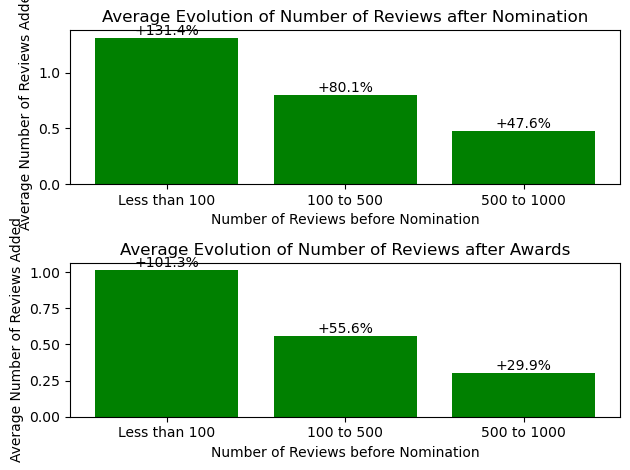

In [444]:
# Calculate the average number of reviews added after nomination and after awards for movies in each category
avg_reviews_added_af_nom_less_than_100 = round(reviews_added_af_nom[reviews_bf_nom < 100].mean()/reviews_bf_nom[reviews_bf_nom < 100].mean(),3)
avg_reviews_added_af_nom_100_to_500 = round(reviews_added_af_nom[(reviews_bf_nom >= 100) & (reviews_bf_nom < 500)].mean()/reviews_bf_nom[(reviews_bf_nom >= 100) & (reviews_bf_nom < 500)].mean(),3)
avg_reviews_added_af_nom_500_to_1000 = round(reviews_added_af_nom[(reviews_bf_nom >= 500) & (reviews_bf_nom < 1000)].mean()/reviews_bf_nom[(reviews_bf_nom >= 500) & (reviews_bf_nom < 1000)].mean(),3)
#avg_reviews_added_af_nom_above_1000 = round(reviews_added_af_nom[reviews_bf_nom >= 1000].mean())

avg_reviews_added_af_awards_less_than_100 = round(reviews_added_af_awards[reviews_bf_nom < 100].mean()/reviews_bf_nom[reviews_bf_nom < 100].mean(),3)
avg_reviews_added_af_awards_100_to_500 = round(reviews_added_af_awards[(reviews_bf_nom >= 100) & (reviews_bf_nom < 500)].mean()/reviews_bf_nom[(reviews_bf_nom >= 100) & (reviews_bf_nom < 500)].mean(),3)
avg_reviews_added_af_awards_500_to_1000 = round(reviews_added_af_awards[(reviews_bf_nom >= 500) & (reviews_bf_nom < 1000)].mean()/reviews_bf_nom[(reviews_bf_nom >= 500) & (reviews_bf_nom < 1000)].mean(),3)
#avg_reviews_added_af_awards_above_1000 = round(reviews_added_af_awards[reviews_bf_nom >= 1000].mean())

# Print the average evolution of the number of reviews for each category
print("Average Evolution of Number of Reviews add:")
print("Movies with less than 100 reviews:")
print("After Nomination: +", round(avg_reviews_added_af_nom_less_than_100*100,2),'%')
print("After Awards: +", round(avg_reviews_added_af_awards_less_than_100*100,2),'%')
print()
print("Movies with 100 to 500 reviews:")
print("After Nomination: +", round(avg_reviews_added_af_nom_100_to_500*100,2),'%')
print("After Awards: +", round(avg_reviews_added_af_awards_100_to_500*100,2),'%')
print()
print("Movies with 500 to 1000 reviews:")
print("After Nomination: +", round(avg_reviews_added_af_nom_500_to_1000*100,2),'%')
print("After Awards: +", round(avg_reviews_added_af_awards_500_to_1000*100,2),'%')
print()
#print("Movies with more than 1000 reviews:")
#print("After Nomination:", avg_reviews_added_af_nom_above_1000)
#print("After Awards:", avg_reviews_added_af_awards_above_1000)
print()


# Create a bar plot
categories = ['Less than 100', '100 to 500', '500 to 1000']
averages_af_nom = [avg_reviews_added_af_nom_less_than_100, avg_reviews_added_af_nom_100_to_500, avg_reviews_added_af_nom_500_to_1000]
averages_af_awards = [avg_reviews_added_af_awards_less_than_100, avg_reviews_added_af_awards_100_to_500, avg_reviews_added_af_awards_500_to_1000]

# Bar plot for average reviews added after nomination
plt.subplot(2, 1, 1)
plt.bar(categories, averages_af_nom, color='green')
plt.xlabel('Number of Reviews before Nomination')
plt.ylabel('Average Number of Reviews Added')
plt.title('Average Evolution of Number of Reviews after Nomination')
# Add values on top of the bars
for i, v in enumerate(averages_af_nom):
    plt.text(i, v, '+' + str(round(v*100,2))+'%', ha='center', va='bottom')

# Bar plot for average reviews added after awards
plt.subplot(2, 1, 2)
plt.bar(categories, averages_af_awards, color='green')
plt.xlabel('Number of Reviews before Nomination')
plt.ylabel('Average Number of Reviews Added')
plt.title('Average Evolution of Number of Reviews after Awards')
# Add values on top of the bars
for i, v in enumerate(averages_af_awards):
    plt.text(i, v, '+' + str(round(v*100,2))+'%', ha='center', va='bottom')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [445]:
df_bf_nom

,movie_id,movie_name,reviews_title,review_link,review_date,rating,reviewer_name,reviewer_link,review_content,production_year,...,award_foreign,award_direct,award_doc,award_pict,award_screen,tot_award,reviewer_id,average_rating,number_movies_reviewed,num_reviews
1,tt0118799,La vie est belle,"Yes, but the movie is not",https://www.imdb.com/review/rw0409347/?ref_=tt...,1999-01-19,1,Boyo-2,https://www.imdb.com/user/ur0068788/?ref_=tt_urv,"I found this movie strangely unemotional, and ...",1998,...,1,0,0,0,0,2,ur0068788,7.43,70,153
3,tt0118799,La vie est belle,Cinema is beautiful!,https://www.imdb.com/review/rw0409355/?ref_=tt...,1999-01-25,9,PureCinema,https://www.imdb.com/user/ur0092583/?ref_=tt_urv,Roberto Benigni has done it. The man has resto...,1998,...,1,0,0,0,0,2,ur0092583,6.67,3,153
5,tt0118799,La vie est belle,There are two kinds of laughter: Honesty and I...,https://www.imdb.com/review/rw0409370/?ref_=tt...,1999-02-02,1,GoatPoda,https://www.imdb.com/user/ur0231755/?ref_=tt_urv,"Life is beautiful, but man is not. I felt stra...",1998,...,1,0,0,0,0,2,ur0231755,3.50,2,153
9,tt0118799,La vie est belle,A classic fable on history.,https://www.imdb.com/review/rw0409338/?ref_=tt...,1999-01-18,9,DukeEman,https://www.imdb.com/user/ur0179443/?ref_=tt_urv,A hilarious first half has us enjoying the com...,1998,...,1,0,0,0,0,2,ur0179443,8.26,23,153
13,tt0118799,La vie est belle,A triumph of Cinema,https://www.imdb.com/review/rw0409361/?ref_=tt...,1999-01-28,9,jmdata,https://www.imdb.com/user/ur0183845/?ref_=tt_urv,This is the most moving film that I have seen ...,1998,...,1,0,0,0,0,2,ur0183845,9.00,1,153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53451,tt6053438,Sur le chemin de la rédemption,The one not to watch.,https://www.imdb.com/review/rw4530133/?ref_=tt...,2018-12-23,1,juneguy57,https://www.imdb.com/user/ur35909635/?ref_=tt_urv,"I kept watching, waiting for the sinister plot...",2018,...,0,0,0,0,0,0,ur35909635,1.00,1,54
53452,tt6053438,Sur le chemin de la rédemption,Horrifying Hollywood self righteousness,https://www.imdb.com/review/rw4533042/?ref_=tt...,2018-12-25,1,simtav-33241,https://www.imdb.com/user/ur96820175/?ref_=tt_urv,"This movie follows Hollywood's guidelines, tea...",2018,...,0,0,0,0,0,0,ur96820175,1.00,1,54
53454,tt6053438,Sur le chemin de la rédemption,Most People Didn't Understand the Ending,https://www.imdb.com/review/rw4596671/?ref_=tt...,2019-01-20,7,bjkastle,https://www.imdb.com/user/ur91259266/?ref_=tt_urv,Mary was not there. She was still in the churc...,2018,...,0,0,0,0,0,0,ur91259266,7.00,1,54
53455,tt6053438,Sur le chemin de la rédemption,Think Twice,https://www.imdb.com/review/rw4543614/?ref_=tt...,2018-12-29,8,tom-996-495651,https://www.imdb.com/user/ur25254816/?ref_=tt_urv,First Reformed steht auf einigen Listen für di...,2018,...,0,0,0,0,0,0,ur25254816,8.00,1,54


## Sentiment Analysis

### Exploring the change in Rates

In [446]:
movie_ids_bfnom_u5 = df_bf_nom.groupby('movie_id').filter(lambda x: x['rating'].mean() < 5)['movie_id'].unique()
movie_ids_bfnom_5to7 = df_bf_nom.groupby('movie_id').filter(lambda x: 5 <= x['rating'].mean() < 7)['movie_id'].unique()
movie_ids_bfnom_7to10 = df_bf_nom.groupby('movie_id').filter(lambda x: x['rating'].mean() >= 7)['movie_id'].unique()

# Average rating before nomination
avg_rating_bfnom_u5 = df_bf_nom[df_bf_nom['movie_id'].isin(movie_ids_bfnom_u5)]['rating'].mean()
avg_rating_bfnom_5to7 = df_bf_nom[df_bf_nom['movie_id'].isin(movie_ids_bfnom_5to7)]['rating'].mean()
avg_rating_bfnom_7to10 = df_bf_nom[df_bf_nom['movie_id'].isin(movie_ids_bfnom_7to10)]['rating'].mean()

# Spotting the change after the nomination
avg_rating_afnom_u5 = df_af_nom[df_af_nom['movie_id'].isin(movie_ids_bfnom_u5)]['rating'].mean()
avg_rating_afnom_5to7 = df_af_nom[df_af_nom['movie_id'].isin(movie_ids_bfnom_5to7)]['rating'].mean()
avg_rating_afnom_7to10 = df_af_nom[df_af_nom['movie_id'].isin(movie_ids_bfnom_7to10)]['rating'].mean()

# Spotting the change after the award
avg_rating_afawards_u5 = df_af_awards[df_af_awards['movie_id'].isin(movie_ids_bfnom_u5)]['rating'].mean()
avg_rating_afawards_5to7 = df_af_awards[df_af_awards['movie_id'].isin(movie_ids_bfnom_5to7)]['rating'].mean()
avg_rating_afawards_7to10 = df_af_awards[df_af_awards['movie_id'].isin(movie_ids_bfnom_7to10)]['rating'].mean()


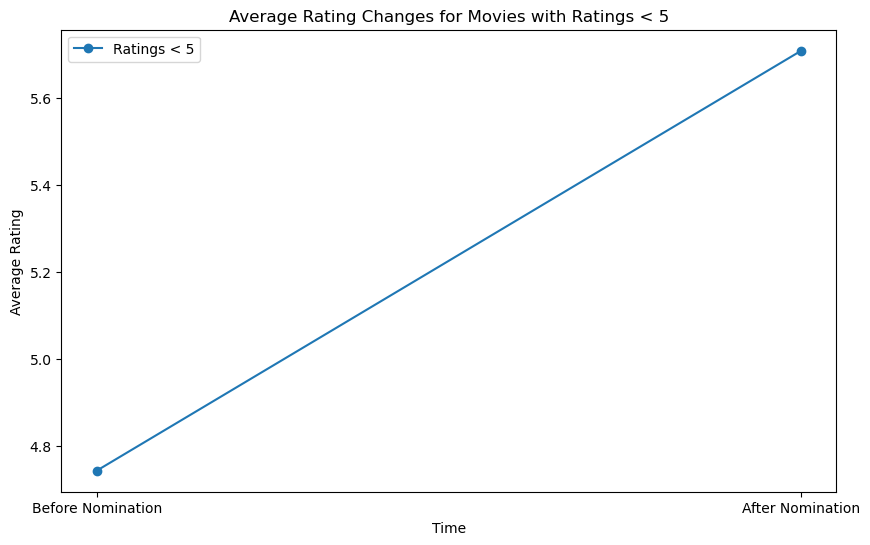

Average Rating Changes for Movies with Ratings < 5:
Before Nomination: 4.742105263157895
After Nomination: 5.7076271186440675
After Award: nan
Movies under 5 ratings, didn't earn an award


In [447]:

# Create lists for x-axis labels and average ratings
labels = ['Before Nomination', 'After Nomination', 'After Award']
avg_ratings_u5 = [avg_rating_bfnom_u5, avg_rating_afnom_u5, avg_rating_afawards_u5]
avg_ratings_5to7 = [avg_rating_bfnom_5to7, avg_rating_afnom_5to7, avg_rating_afawards_5to7]
avg_ratings_7to10 = [avg_rating_bfnom_7to10, avg_rating_afnom_7to10, avg_rating_afawards_7to10]

# Plotting the changes for movies with ratings < 5
plt.figure(figsize=(10, 6))
plt.plot(labels, avg_ratings_u5, marker='o', label='Ratings < 5')
plt.xlabel('Time')
plt.ylabel('Average Rating')
plt.title('Average Rating Changes for Movies with Ratings < 5')
plt.legend()
plt.show()

# Printing the results
print("Average Rating Changes for Movies with Ratings < 5:")
print("Before Nomination:", avg_rating_bfnom_u5)
print("After Nomination:", avg_rating_afnom_u5)
print("After Award:", avg_rating_afawards_u5)


print("Movies under 5 ratings, didn't earn an award")

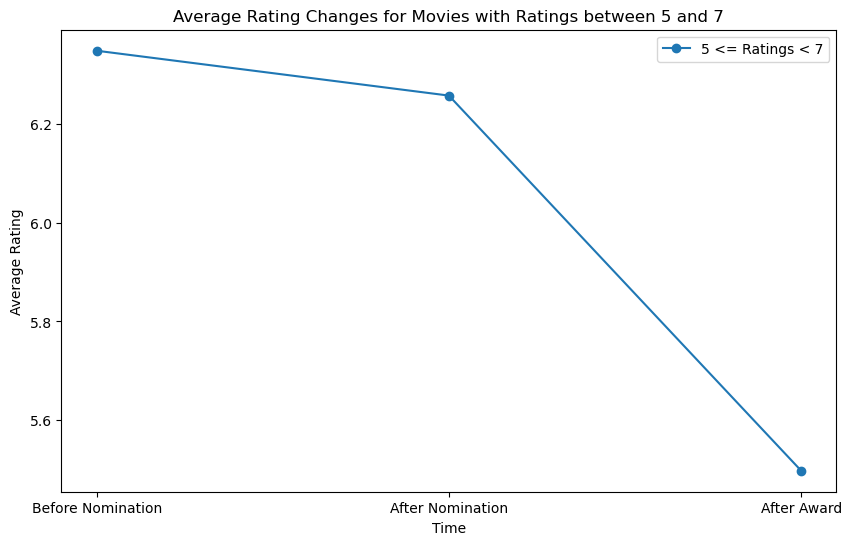


Average Rating Changes for Movies with Ratings between 5 and 7:
Before Nomination: 6.34899923992906
After Nomination: 6.2580043072505385
After Award: 5.497234173325138


In [448]:
# Plotting the changes for movies with ratings between 5 and 7
plt.figure(figsize=(10, 6))
plt.plot(labels, avg_ratings_5to7, marker='o', label='5 <= Ratings < 7')
plt.xlabel('Time')
plt.ylabel('Average Rating')
plt.title('Average Rating Changes for Movies with Ratings between 5 and 7')
plt.legend()
plt.show()
print("\nAverage Rating Changes for Movies with Ratings between 5 and 7:")
print("Before Nomination:", avg_rating_bfnom_5to7)
print("After Nomination:", avg_rating_afnom_5to7)
print("After Award:", avg_rating_afawards_5to7)

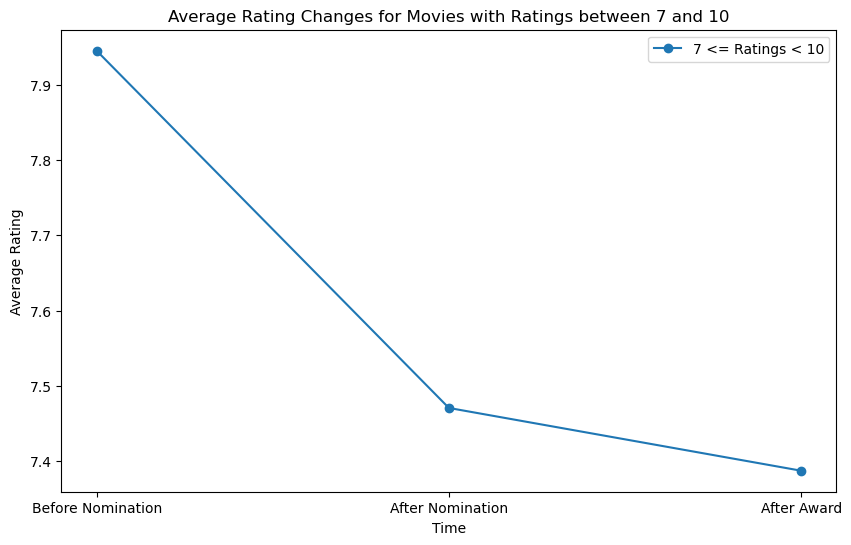


Average Rating Changes for Movies with Ratings between 7 and 10:
Before Nomination: 7.945574855252275
After Nomination: 7.470358565737052
After Award: 7.386862870548091


In [449]:
# Plotting the changes for movies with ratings between 7 and 10
plt.figure(figsize=(10, 6))
plt.plot(labels, avg_ratings_7to10, marker='o', label='7 <= Ratings < 10')
plt.xlabel('Time')
plt.ylabel('Average Rating')
plt.title('Average Rating Changes for Movies with Ratings between 7 and 10')
plt.legend()
plt.show()
print("\nAverage Rating Changes for Movies with Ratings between 7 and 10:")
print("Before Nomination:", avg_rating_bfnom_7to10)
print("After Nomination:", avg_rating_afnom_7to10)
print("After Award:", avg_rating_afawards_7to10)

#### Storing changes for each category of ratings

In [450]:
# Define the rating categories
rating_categories = {
    'u5': {'min': 0, 'max': 5},
    '5to7': {'min': 5, 'max': 7},
    '7to10': {'min': 7, 'max': 10}
}

# Initialize dictionaries to store the changes in ratings
change_afnom = {}
change_afawards = {}

# Calculate the change in ratings after nomination and after the award for each movie in each rating category
for category, limits in rating_categories.items():
    movies_in_category = df_bf_nom.groupby('movie_id')['rating'].mean().between(limits['min'], limits['max'])
    movie_ids = movies_in_category[movies_in_category].index
    change_afnom[category] = df_af_nom[df_af_nom['movie_id'].isin(movie_ids)].groupby('movie_id')['rating'].mean() - df_bf_nom[df_bf_nom['movie_id'].isin(movie_ids)].groupby('movie_id')['rating'].mean()
    change_afawards[category] = df_af_awards[df_af_awards['movie_id'].isin(movie_ids)].groupby('movie_id')['rating'].mean() - df_bf_nom[df_bf_nom['movie_id'].isin(movie_ids)].groupby('movie_id')['rating'].mean()


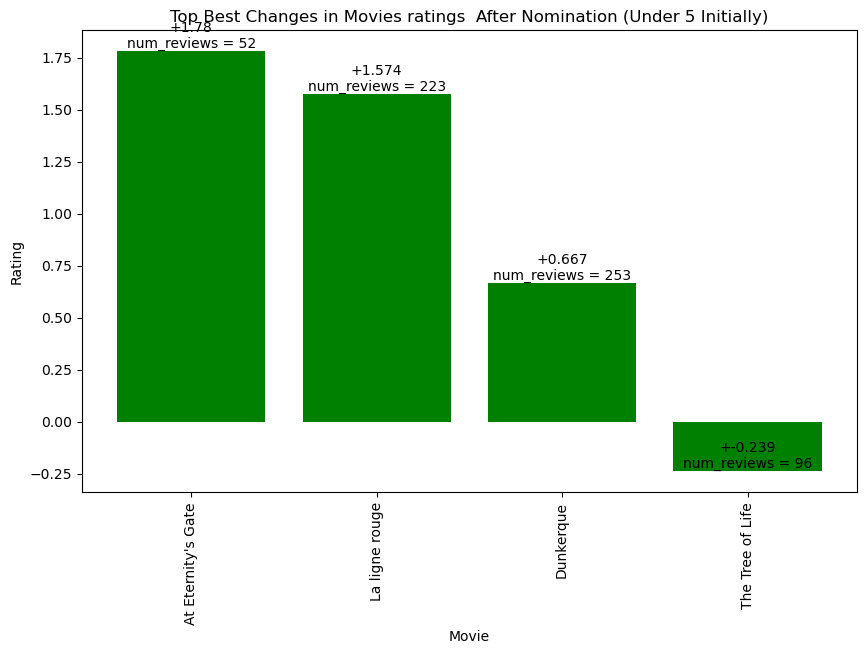

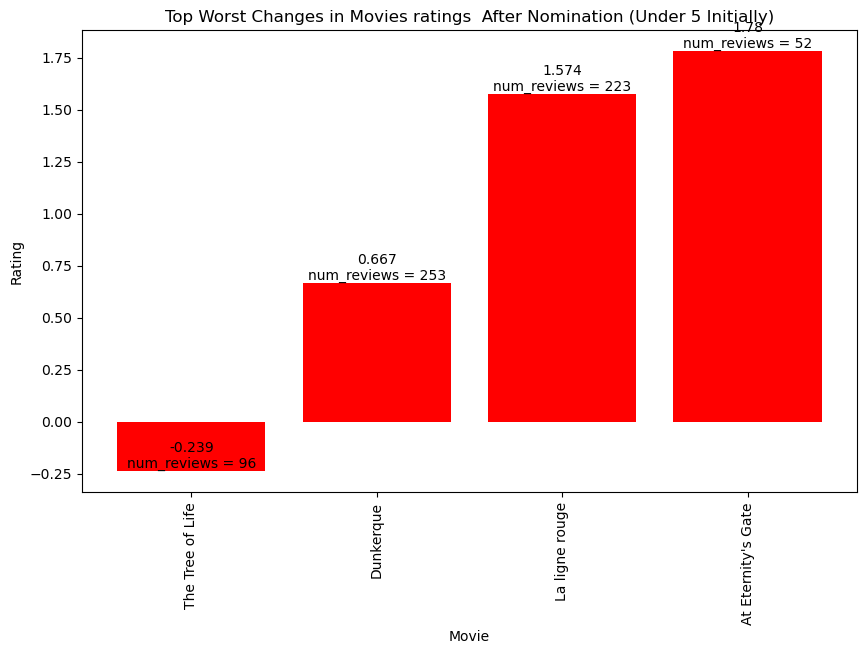

In [451]:
df_movies=df.copy()
#Top 5 movies with highest positive change after nomination in the 'u5' category
top_pos_change_afnom_u5 = change_afnom['u5'].nlargest(5)

# Top 5 movies with highest negative change after nomination in the 'u5' category
top_neg_change_afnom_u5 = change_afnom['u5'].nsmallest(5)
# Top 5 movies with highest positive change after awards in the 'u5' category
top_pos_change_afawards_u5 = change_afawards['u5'].nlargest(5)
# Top 5 movies with highest negative change after awards in the 'u5' category
top_neg_change_afawards_u5 = change_afawards['u5'].nsmallest(5)

# Get the movie names and last ratings for the top positive and negative changes after nomination in the 'u5' category
top_pos_movies_afnom_u5 = pd.merge(df_movies[df_movies['movie_id'].isin(top_pos_change_afnom_u5.index)][['movie_id', 'movie_name','num_reviews']].drop_duplicates(), top_pos_change_afnom_u5, left_on="movie_id", right_index=True).sort_values('rating', ascending=False)
top_neg_movies_afnom_u5 = pd.merge(df_movies[df_movies['movie_id'].isin(top_neg_change_afnom_u5.index)][['movie_id', 'movie_name','num_reviews']].drop_duplicates(), top_neg_change_afnom_u5, left_on="movie_id", right_index=True).sort_values('rating')

# Get the movie names and last ratings for the top positive and negative changes after awards in the 'u5' category
top_pos_movies_afawards_u5 = pd.merge(df_movies[df_movies['movie_id'].isin(top_pos_change_afawards_u5.index)][['movie_id', 'movie_name','num_reviews']].drop_duplicates(), top_pos_change_afawards_u5, left_on="movie_id", right_index=True).sort_values('rating', ascending=False)
top_neg_movies_afawards_u5 = pd.merge(df_movies[df_movies['movie_id'].isin(top_neg_change_afawards_u5.index)][['movie_id', 'movie_name','num_reviews']].drop_duplicates(), top_neg_change_afawards_u5, left_on="movie_id", right_index=True).sort_values('rating')


# Bar graph for top positive change movies after nomination under 5 initially
plt.figure(figsize=(10, 6))
plt.bar(top_pos_movies_afnom_u5['movie_name'], top_pos_movies_afnom_u5['rating'], color='green')
plt.xlabel('Movie')
plt.ylabel('Rating')
plt.title('Top Best Changes in Movies ratings  After Nomination (Under 5 Initially)')
plt.xticks(rotation=90)
for i, v in enumerate(top_pos_movies_afnom_u5['rating']):
    plt.text(i, v, '+' + str(round(v,3)) + '\n' + 'num_reviews = ' + str(top_pos_movies_afnom_u5['num_reviews'].reset_index(drop=True)[i]), ha='center', va='bottom')


plt.show()

# Bar graph for top negative change movies after nomination under 5 initially
plt.figure(figsize=(10, 6))
plt.bar(top_neg_movies_afnom_u5['movie_name'], top_neg_movies_afnom_u5['rating'], color='red')
plt.xlabel('Movie')
plt.ylabel('Rating')
plt.title('Top Worst Changes in Movies ratings  After Nomination (Under 5 Initially)')
plt.xticks(rotation=90)
for i, v in enumerate(top_neg_movies_afnom_u5['rating']):
    plt.text(i, v, '' + str(round(v,3)) + '\n' + 'num_reviews = ' + str(top_neg_movies_afnom_u5['num_reviews'].reset_index(drop=True)[i]), ha='center', va='bottom')
plt.show()





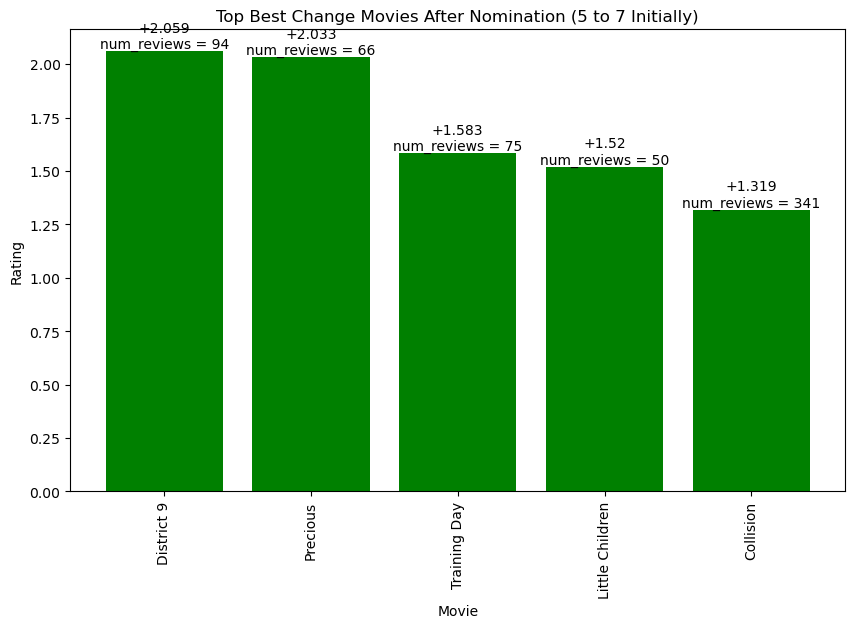

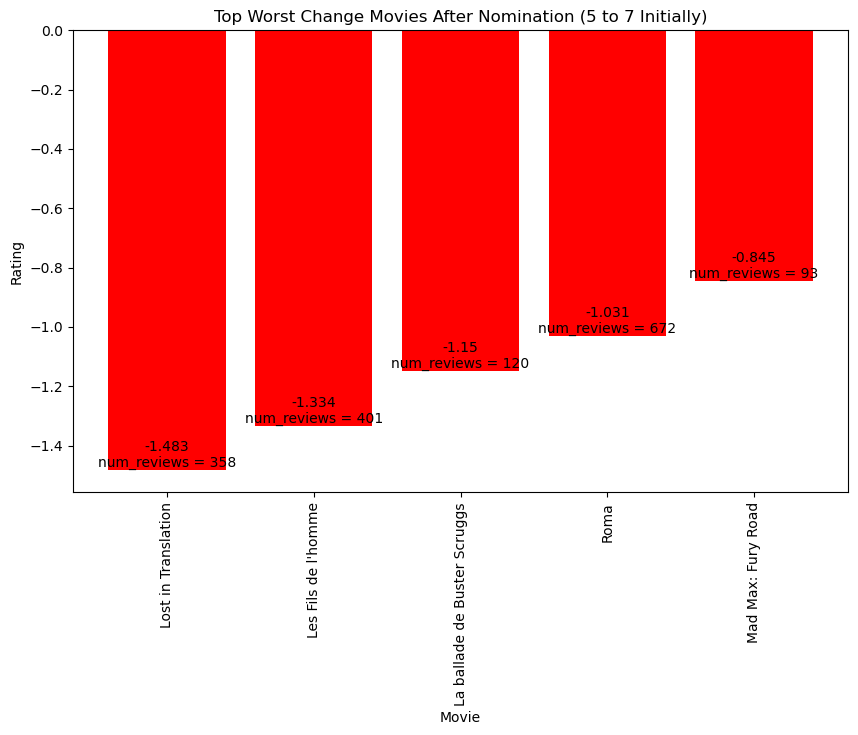

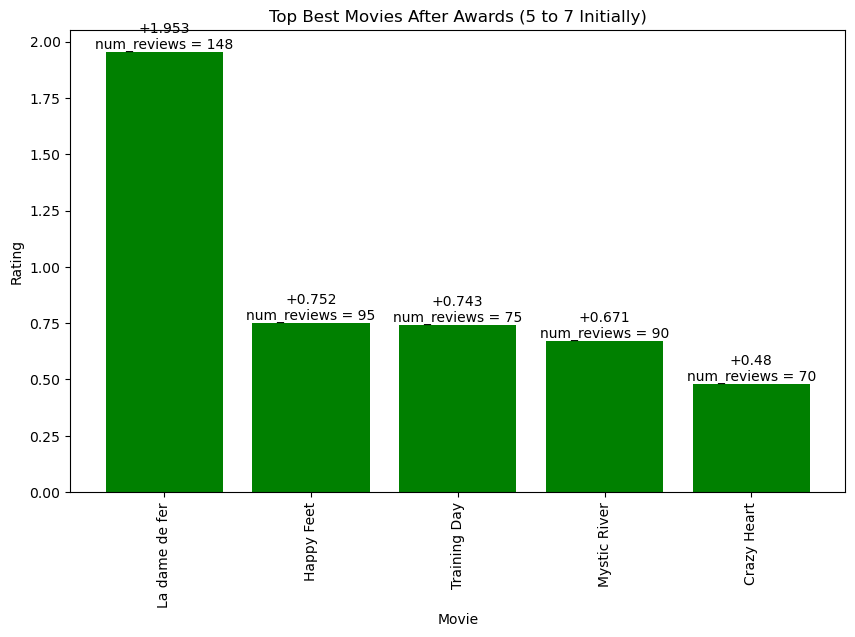

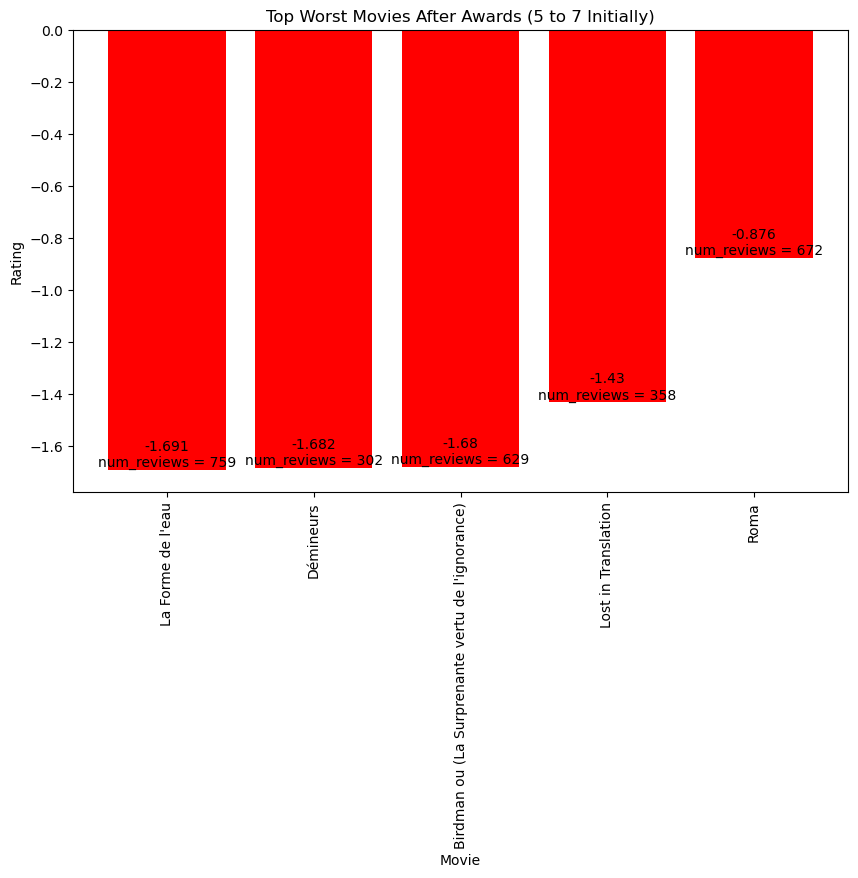

In [452]:
# Top 5 movies with highest positive change after nomination in the '5to7' category
top_pos_change_afnom_5to7 = change_afnom['5to7'].nlargest(5)

# Top 5 movies with highest negative change after nomination in the '5to7' category
top_neg_change_afnom_5to7 = change_afnom['5to7'].nsmallest(5)

# Top 5 movies with highest positive change after awards in the '5to7' category
top_pos_change_afawards_5to7 = change_afawards['5to7'].nlargest(5)
# Top 5 movies with highest negative change after awards in the '5to7' category
top_neg_change_afawards_5to7 = change_afawards['5to7'].nsmallest(5)

# Get the movie names and last ratings for the top positive and negative changes after nomination in the '5to7' category
top_pos_movies_afnom_5to7 = pd.merge(df_movies[df_movies['movie_id'].isin(top_pos_change_afnom_5to7.index)][['movie_id', 'movie_name','num_reviews']].drop_duplicates(), top_pos_change_afnom_5to7, left_on="movie_id", right_index=True).sort_values('rating', ascending=False)
top_neg_movies_afnom_5to7 = pd.merge(df_movies[df_movies['movie_id'].isin(top_neg_change_afnom_5to7.index)][['movie_id', 'movie_name','num_reviews']].drop_duplicates(), top_neg_change_afnom_5to7, left_on="movie_id", right_index=True).sort_values('rating')

# Get the movie names and last ratings for the top positive and negative changes after awards in the '5to7' category
top_pos_movies_afawards_5to7 = pd.merge(df_movies[df_movies['movie_id'].isin(top_pos_change_afawards_5to7.index)][['movie_id', 'movie_name','num_reviews']].drop_duplicates(), top_pos_change_afawards_5to7, left_on="movie_id", right_index=True).sort_values('rating', ascending=False)
top_neg_movies_afawards_5to7 = pd.merge(df_movies[df_movies['movie_id'].isin(top_neg_change_afawards_5to7.index)][['movie_id', 'movie_name','num_reviews']].drop_duplicates(), top_neg_change_afawards_5to7, left_on="movie_id", right_index=True).sort_values('rating')

# Bar graph for top positive change movies after nomination in the '5to7' category
plt.figure(figsize=(10, 6))
plt.bar(top_pos_movies_afnom_5to7['movie_name'], top_pos_movies_afnom_5to7['rating'], color='green')
plt.xlabel('Movie')
plt.ylabel('Rating')
plt.title('Top Best Change Movies After Nomination (5 to 7 Initially)')
plt.xticks(rotation=90)
for i, v in enumerate(top_pos_movies_afnom_5to7['rating']):
    plt.text(i, v, '+' + str(round(v,3)) + '\n' + 'num_reviews = ' + str(top_pos_movies_afnom_5to7['num_reviews'].reset_index(drop=True)[i]), ha='center', va='bottom')
plt.show()

# Bar graph for top negative change movies after nomination in the '5to7' category
plt.figure(figsize=(10, 6))
plt.bar(top_neg_movies_afnom_5to7['movie_name'], top_neg_movies_afnom_5to7['rating'], color='red')
plt.xlabel('Movie')
plt.ylabel('Rating')
plt.title('Top Worst Change Movies After Nomination (5 to 7 Initially)')
plt.xticks(rotation=90)
for i, v in enumerate(top_neg_movies_afnom_5to7['rating']):
    plt.text(i, v, '' + str(round(v,3)) + '\n' + 'num_reviews = ' + str(top_neg_movies_afnom_5to7['num_reviews'].reset_index(drop=True)[i]), ha='center', va='bottom')
plt.show()

# Bar graph for top positive movies after awards in the '5to7' category
plt.figure(figsize=(10, 6))
plt.bar(top_pos_movies_afawards_5to7['movie_name'], top_pos_movies_afawards_5to7['rating'], color='green')
plt.xlabel('Movie')
plt.ylabel('Rating')
plt.title('Top Best Movies After Awards (5 to 7 Initially)')
plt.xticks(rotation=90)
for i, v in enumerate(top_pos_movies_afawards_5to7['rating']):
    plt.text(i, v, '+' + str(round(v,3)) + '\n' + 'num_reviews = ' + str(top_pos_movies_afawards_5to7['num_reviews'].reset_index(drop=True)[i]), ha='center', va='bottom')
plt.show()

# Bar graph for top negative movies after awards in the '5to7' category
plt.figure(figsize=(10, 6))
plt.bar(top_neg_movies_afawards_5to7['movie_name'], top_neg_movies_afawards_5to7['rating'], color='red')
plt.xlabel('Movie')
plt.ylabel('Rating')
plt.title('Top Worst Movies After Awards (5 to 7 Initially)')
plt.xticks(rotation=90)
for i, v in enumerate(top_neg_movies_afawards_5to7['rating']):
    plt.text(i, v, '' + str(round(v,3)) + '\n' + 'num_reviews = ' + str(top_neg_movies_afawards_5to7['num_reviews'].reset_index(drop=True)[i]), ha='center', va='bottom')
plt.show()

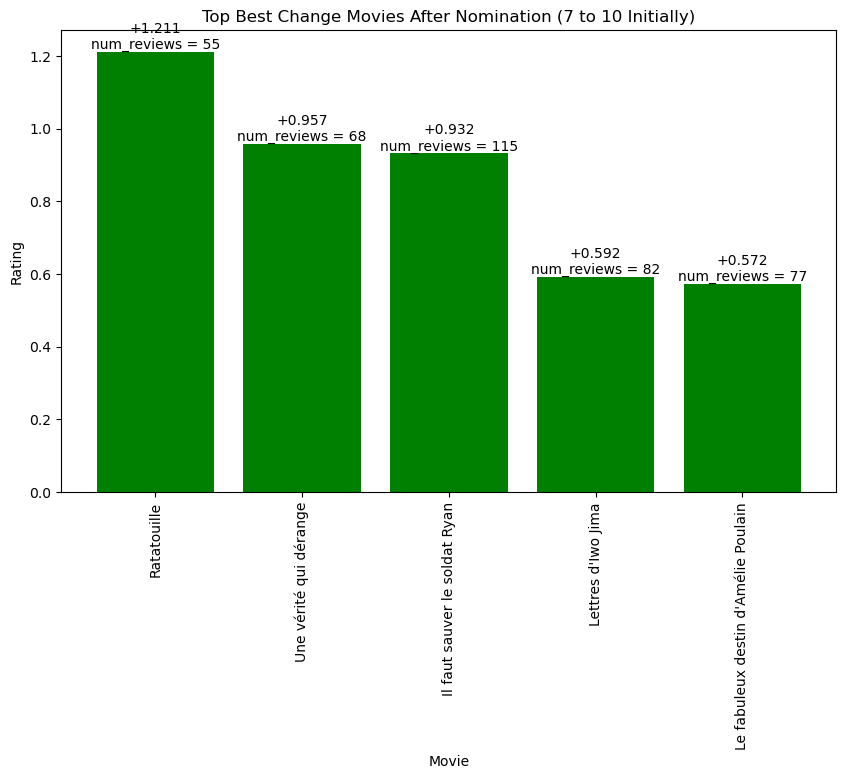

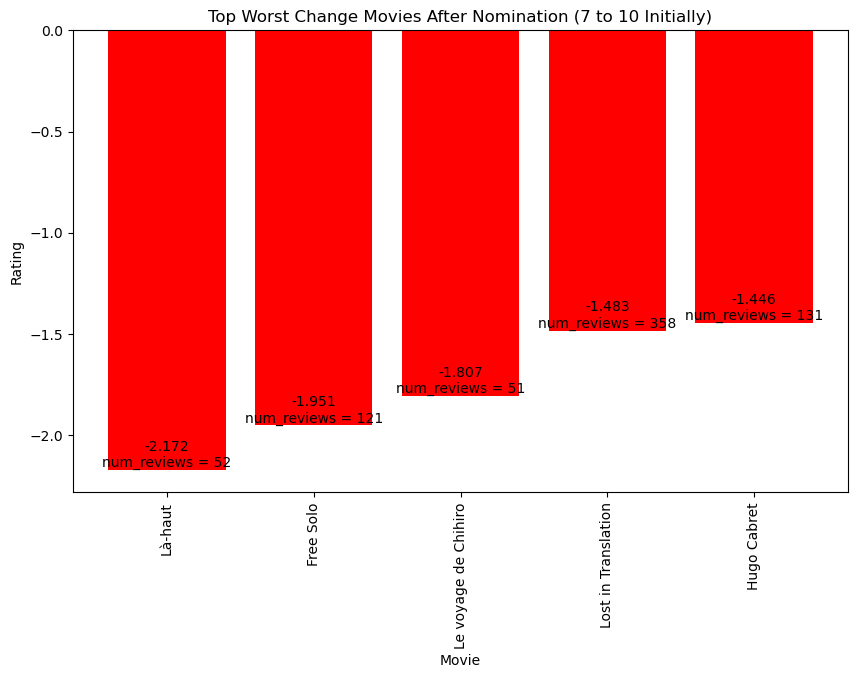

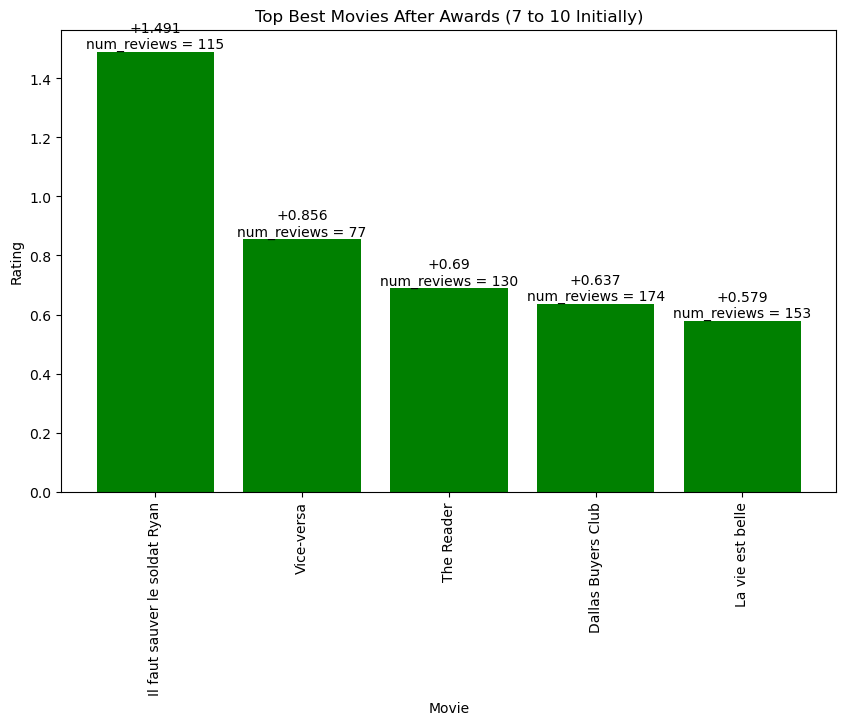

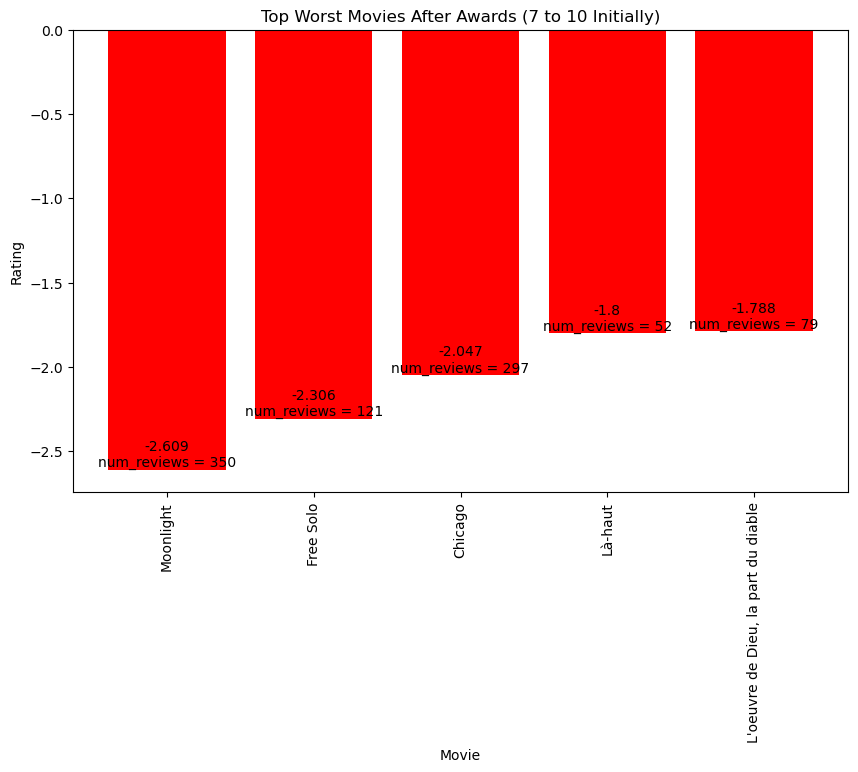

In [453]:
# Top 5 movies with highest positive change after nomination in the '7to10' category
top_pos_change_afnom_7to10 = change_afnom['7to10'].nlargest(5)

# Top 5 movies with highest negative change after nomination in the '7to10' category
top_neg_change_afnom_7to10 = change_afnom['7to10'].nsmallest(5)

# Top 5 movies with highest positive change after awards in the '7to10' category
top_pos_change_afawards_7to10 = change_afawards['7to10'].nlargest(5)
# Top 5 movies with highest negative change after awards in the '7to10' category
top_neg_change_afawards_7to10 = change_afawards['7to10'].nsmallest(5)

# Get the movie names and last ratings for the top positive and negative changes after nomination in the '7to10' category
top_pos_movies_afnom_7to10 = pd.merge(df_movies[df_movies['movie_id'].isin(top_pos_change_afnom_7to10.index)][['movie_id', 'movie_name','num_reviews']].drop_duplicates(), top_pos_change_afnom_7to10, left_on="movie_id", right_index=True).sort_values('rating', ascending=False)
top_neg_movies_afnom_7to10 = pd.merge(df_movies[df_movies['movie_id'].isin(top_neg_change_afnom_7to10.index)][['movie_id', 'movie_name','num_reviews']].drop_duplicates(), top_neg_change_afnom_7to10, left_on="movie_id", right_index=True).sort_values('rating')

# Get the movie names and last ratings for the top positive and negative changes after awards in the '7to10' category
top_pos_movies_afawards_7to10 = pd.merge(df_movies[df_movies['movie_id'].isin(top_pos_change_afawards_7to10.index)][['movie_id', 'movie_name','num_reviews']].drop_duplicates(), top_pos_change_afawards_7to10, left_on="movie_id", right_index=True).sort_values('rating', ascending=False)
top_neg_movies_afawards_7to10 = pd.merge(df_movies[df_movies['movie_id'].isin(top_neg_change_afawards_7to10.index)][['movie_id', 'movie_name','num_reviews']].drop_duplicates(), top_neg_change_afawards_7to10, left_on="movie_id", right_index=True).sort_values('rating')

# Bar graph for top positive change movies after nomination in the '7to10' category
plt.figure(figsize=(10, 6))
plt.bar(top_pos_movies_afnom_7to10['movie_name'], top_pos_movies_afnom_7to10['rating'], color='green')
plt.xlabel('Movie')
plt.ylabel('Rating')
plt.title('Top Best Change Movies After Nomination (7 to 10 Initially)')
plt.xticks(rotation=90)
for i, v in enumerate(top_pos_movies_afnom_7to10['rating']):
    plt.text(i, v, '+' + str(round(v,3)) +'\n' + 'num_reviews = ' + str(top_pos_movies_afnom_7to10['num_reviews'].reset_index(drop=True)[i]), ha='center', va='bottom')
plt.show()

# Bar graph for top negative change movies after nomination in the '7to10' category
plt.figure(figsize=(10, 6))
plt.bar(top_neg_movies_afnom_7to10['movie_name'], top_neg_movies_afnom_7to10['rating'], color='red')
plt.xlabel('Movie')
plt.ylabel('Rating')
plt.title('Top Worst Change Movies After Nomination (7 to 10 Initially)')
plt.xticks(rotation=90)
for i, v in enumerate(top_neg_movies_afnom_7to10['rating']):
    plt.text(i, v, '' + str(round(v,3))+ '\n' + 'num_reviews = ' + str(top_neg_movies_afnom_7to10['num_reviews'].reset_index(drop=True)[i]), ha='center', va='bottom')
plt.show()

# Bar graph for top positive movies after awards in the '7to10' category
plt.figure(figsize=(10, 6))
plt.bar(top_pos_movies_afawards_7to10['movie_name'], top_pos_movies_afawards_7to10['rating'], color='green')
plt.xlabel('Movie')
plt.ylabel('Rating')
plt.title('Top Best Movies After Awards (7 to 10 Initially)')
plt.xticks(rotation=90)
for i, v in enumerate(top_pos_movies_afawards_7to10['rating']):
    plt.text(i, v, '+' + str(round(v,3)) + '\n' + 'num_reviews = ' + str(top_pos_movies_afawards_7to10['num_reviews'].reset_index(drop=True)[i]), ha='center', va='bottom')
plt.show()

# Bar graph for top negative movies after awards in the '7to10' category
plt.figure(figsize=(10, 6))
plt.bar(top_neg_movies_afawards_7to10['movie_name'], top_neg_movies_afawards_7to10['rating'], color='red')
plt.xlabel('Movie')
plt.ylabel('Rating')
plt.title('Top Worst Movies After Awards (7 to 10 Initially)')
plt.xticks(rotation=90)
for i, v in enumerate(top_neg_movies_afawards_7to10['rating']):
    plt.text(i, v, '' + str(round(v,3)) + '\n' + 'num_reviews = ' + str(top_neg_movies_afawards_7to10['num_reviews'].reset_index(drop=True)[i]), ha='center', va='bottom')
plt.show()


### Analyzing texts (NLP)

Keeping only necessary data

In [454]:
df_bf_nom_nlp=df_bf_nom[['movie_id','review_link','review_content','tot_award', 'tot_nom', 'rating']]
df_bf_nom_nlp

,movie_id,review_link,review_content,tot_award,tot_nom,rating
1,tt0118799,https://www.imdb.com/review/rw0409347/?ref_=tt...,"I found this movie strangely unemotional, and ...",2,5,1
3,tt0118799,https://www.imdb.com/review/rw0409355/?ref_=tt...,Roberto Benigni has done it. The man has resto...,2,5,9
5,tt0118799,https://www.imdb.com/review/rw0409370/?ref_=tt...,"Life is beautiful, but man is not. I felt stra...",2,5,1
9,tt0118799,https://www.imdb.com/review/rw0409338/?ref_=tt...,A hilarious first half has us enjoying the com...,2,5,9
13,tt0118799,https://www.imdb.com/review/rw0409361/?ref_=tt...,This is the most moving film that I have seen ...,2,5,9
...,...,...,...,...,...,...
53451,tt6053438,https://www.imdb.com/review/rw4530133/?ref_=tt...,"I kept watching, waiting for the sinister plot...",0,1,1
53452,tt6053438,https://www.imdb.com/review/rw4533042/?ref_=tt...,"This movie follows Hollywood's guidelines, tea...",0,1,1
53454,tt6053438,https://www.imdb.com/review/rw4596671/?ref_=tt...,Mary was not there. She was still in the churc...,0,1,7
53455,tt6053438,https://www.imdb.com/review/rw4543614/?ref_=tt...,First Reformed steht auf einigen Listen für di...,0,1,8


In [455]:
df_af_nom_nlp=df_af_nom[['movie_id','review_link','review_content','tot_award', 'tot_nom', 'rating']]
df_af_nom_nlp

,movie_id,review_link,review_content,tot_award,tot_nom,rating
0,tt0118799,https://www.imdb.com/review/rw0408868/?ref_=tt...,"Roberto Benigni's Vita e bella, is in many way...",2,5,9
2,tt0118799,https://www.imdb.com/review/rw0408912/?ref_=tt...,"I put off seeing this ""romance"" because of a b...",2,5,9
4,tt0118799,https://www.imdb.com/review/rw0408869/?ref_=tt...,In my view this is an awful film. Cliché ridde...,2,5,2
6,tt0118799,https://www.imdb.com/review/rw0408887/?ref_=tt...,You will read many comparison's in these revie...,2,5,9
7,tt0118799,https://www.imdb.com/review/rw0408846/?ref_=tt...,I've read all the previous comments. It's amaz...,2,5,8
...,...,...,...,...,...,...
53445,tt6053438,https://www.imdb.com/review/rw4634097/?ref_=tt...,Shrader is a master of slow building tension. ...,0,1,9
53446,tt6053438,https://www.imdb.com/review/rw4601705/?ref_=tt...,Coming late to this superb movie I just want t...,0,1,10
53447,tt6053438,https://www.imdb.com/review/rw4607889/?ref_=tt...,"Horrible, depressing, pointless movie. Too man...",0,1,1
53449,tt6053438,https://www.imdb.com/review/rw4623178/?ref_=tt...,Dont waste your time. Movie tries to cover so ...,0,1,1


In [456]:
df_af_awards_nlp=df_af_awards[['movie_id','review_link','review_content', 'tot_award', 'tot_nom','rating']]
df_af_awards_nlp

,movie_id,review_link,review_content,tot_award,tot_nom,rating
10,tt0118799,https://www.imdb.com/review/rw0408953/?ref_=tt...,"I am, by passion, a novelist. As such I'm alw...",2,5,10
11,tt0118799,https://www.imdb.com/review/rw0408973/?ref_=tt...,Life really is beautiful and so is this magnif...,2,5,9
12,tt0118799,https://www.imdb.com/review/rw0408946/?ref_=tt...,This movie is not only about the Holocaust.It ...,2,5,10
15,tt0118799,https://www.imdb.com/review/rw0408957/?ref_=tt...,Life is Beautiful made no noticeable impressio...,2,5,2
17,tt0118799,https://www.imdb.com/review/rw0408931/?ref_=tt...,I find it awfully strange that everyone is emb...,2,5,1
...,...,...,...,...,...,...
52956,tt7775622,https://www.imdb.com/review/rw4717527/?ref_=tt...,"Wow! Speachless, stunning. What an achivement....",1,1,10
52959,tt7775622,https://www.imdb.com/review/rw4684921/?ref_=tt...,Why did the film crew continue with the docume...,1,1,7
52960,tt7775622,https://www.imdb.com/review/rw4703081/?ref_=tt...,I do not climb. I do not admire climbers. None...,1,1,9
52961,tt7775622,https://www.imdb.com/review/rw4729156/?ref_=tt...,"Brilliant film what an amazing climb ,a very b...",1,1,10


In [457]:
from nltk import word_tokenize, pos_tag
import nltk
from nltk.corpus import stopwords
from string import punctuation
from collections import Counter
import matplotlib.pyplot as plt

def clean(s):
    tokens = word_tokenize(s)
    #stop_words = set(stopwords.words('english'))
    basic_words = ['film', 'movie', 'movies', 'also', 'anymore', 'certainly', 'again', 'none', 'one', 'back', "'ll"]
    punctuation = [ ',', '.', ':', ';', '(', ')', '[', ']', "'ve", "n't", "'s", "'s", '{', '}', "'", '"', '``', "''", "-", "...", "--"]

    # Get POS tags for each token
    tagged_tokens = pos_tag(tokens)

    # Filter out verbs and apply other cleaning filters
    filtered_tokens = [token.lower() for token, tag in tagged_tokens if (token not in punctuation) and (token not in basic_words) and (len(token) >= 3)]

    # Join the filtered tokens back into a string
    filtered_text = ' '.join(filtered_tokens)

    return filtered_text


In [458]:
#import nltk
#nltk.download('averaged_perceptron_tagger')

In [459]:
df_bf_nom_nlp['review_content'] = df_bf_nom_nlp['review_content'].apply(clean)
df_af_nom_nlp['review_content'] = df_af_nom_nlp['review_content'].apply(clean)
df_af_awards_nlp['review_content'] = df_af_awards_nlp['review_content'].apply(clean)

In [490]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Normalize the rating to a range of -1 to 1
df_bf_nom_nlp['normalized_rating'] = (df_bf_nom_nlp['rating'] - 5) / 5
df_af_nom_nlp['normalized_rating'] = (df_af_nom_nlp['rating'] - 5) / 5
df_af_awards_nlp['normalized_rating'] = (df_af_awards_nlp['rating'] - 5) / 5

# Perform sentiment analysis on the reviews before nomination
df_bf_nom_nlp['nltk_sentiment_score'] = df_bf_nom_nlp['review_content'].apply(lambda x: sid.polarity_scores(x)['compound'])
df_af_nom_nlp['nltk_sentiment_score'] = df_af_nom_nlp['review_content'].apply(lambda x: sid.polarity_scores(x)['compound'])
df_af_awards_nlp['nltk_sentiment_score'] = df_af_awards_nlp['review_content'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Additional sentiment analysis using TextBlob for comparison
df_bf_nom_nlp['textblob_sentiment_score'] = df_bf_nom_nlp['review_content'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_af_nom_nlp['textblob_sentiment_score'] = df_af_nom_nlp['review_content'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_af_awards_nlp['textblob_sentiment_score'] = df_af_awards_nlp['review_content'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Ensemble sentiment score by averaging NLTK and TextBlob scores
df_bf_nom_nlp['ensemble_sentiment_score'] = (df_bf_nom_nlp['nltk_sentiment_score'] + df_bf_nom_nlp['textblob_sentiment_score']) / 2
df_af_nom_nlp['ensemble_sentiment_score'] = (df_af_nom_nlp['nltk_sentiment_score'] + df_af_nom_nlp['textblob_sentiment_score']) / 2
df_af_awards_nlp['ensemble_sentiment_score'] = (df_af_awards_nlp['nltk_sentiment_score'] + df_af_awards_nlp['textblob_sentiment_score']) / 2

# Incorporate normalized rating in sentiment prediction
df_bf_nom_nlp['sentiment_with_rating'] = df_bf_nom_nlp['ensemble_sentiment_score'] * df_bf_nom_nlp['normalized_rating']
df_af_nom_nlp['sentiment_with_rating'] = df_af_nom_nlp['ensemble_sentiment_score'] * df_af_nom_nlp['normalized_rating']
df_af_awards_nlp['sentiment_with_rating'] = df_af_awards_nlp['ensemble_sentiment_score'] * df_af_awards_nlp['normalized_rating']

In [491]:
# Print the updated dataframes with sentiment scores
print("Dataframe before nomination sentiment analysis:")
df_bf_nom_nlp.head()

Dataframe before nomination sentiment analysis:


,Unnamed: 0,movie_id,review_link,review_content,tot_award,tot_nom,rating,normalized_rating,nltk_sentiment_score,textblob_sentiment_score,sentiment_with_rating,ensemble_sentiment_score
0,1,tt0118799,https://www.imdb.com/review/rw0409347/?ref_=tt...,found this strangely unemotional and honest wa...,2,5,1,-0.8,0.0772,0.191667,-0.107547,0.134433
1,3,tt0118799,https://www.imdb.com/review/rw0409355/?ref_=tt...,roberto benigni has done the man has restored ...,2,5,9,0.8,0.9545,0.244444,0.479578,0.599472
2,5,tt0118799,https://www.imdb.com/review/rw0409370/?ref_=tt...,life beautiful but man not felt strange left t...,2,5,1,-0.8,0.9654,0.059896,-0.410118,0.512648
3,9,tt0118799,https://www.imdb.com/review/rw0409338/?ref_=tt...,hilarious first half has enjoying the comical ...,2,5,9,0.8,0.6369,0.106389,0.297316,0.371644
4,13,tt0118799,https://www.imdb.com/review/rw0409361/?ref_=tt...,this the most moving that have seen since the ...,2,5,9,0.8,0.5859,0.333333,0.367693,0.459617


In [492]:
print("Dataframe after nomination sentiment analysis:")
df_af_nom_nlp.head()

Dataframe after nomination sentiment analysis:


,Unnamed: 0,movie_id,review_link,review_content,tot_award,tot_nom,rating,normalized_rating,nltk_sentiment_score,textblob_sentiment_score,sentiment_with_rating,ensemble_sentiment_score
0,0,tt0118799,https://www.imdb.com/review/rw0408868/?ref_=tt...,roberto benigni vita bella many ways similar c...,2,5,9,0.8,0.9995,0.206494,0.482397,0.602997
1,2,tt0118799,https://www.imdb.com/review/rw0408912/?ref_=tt...,put off seeing this romance because basically ...,2,5,9,0.8,0.9982,0.205756,0.481582,0.601978
2,4,tt0118799,https://www.imdb.com/review/rw0408869/?ref_=tt...,view this awful cliché ridden woeful acting id...,2,5,2,-0.6,0.8773,-0.131522,-0.223733,0.372889
3,6,tt0118799,https://www.imdb.com/review/rw0408887/?ref_=tt...,you will read many comparison these reviews ch...,2,5,9,0.8,0.9919,0.245833,0.495093,0.618867
4,7,tt0118799,https://www.imdb.com/review/rw0408846/?ref_=tt...,read all the previous comments amazing see som...,2,5,8,0.6,0.9842,0.124264,0.332539,0.554232


In [493]:
print("Dataframe after awards sentiment analysis:")
df_af_awards_nlp.head()

Dataframe after awards sentiment analysis:


,Unnamed: 0,movie_id,review_link,review_content,tot_award,tot_nom,rating,normalized_rating,nltk_sentiment_score,textblob_sentiment_score,sentiment_with_rating,ensemble_sentiment_score
0,10,tt0118799,https://www.imdb.com/review/rw0408953/?ref_=tt...,passion novelist such always afraid read aston...,2,5,10,1.0,0.9844,0.368056,0.676228,0.676228
1,11,tt0118799,https://www.imdb.com/review/rw0408973/?ref_=tt...,life really beautiful and this magnificent fro...,2,5,9,0.8,0.9953,0.232729,0.491212,0.614015
2,12,tt0118799,https://www.imdb.com/review/rw0408946/?ref_=tt...,this not only about the holocaust.it about sur...,2,5,10,1.0,0.1513,0.111004,0.131152,0.131152
3,15,tt0118799,https://www.imdb.com/review/rw0408957/?ref_=tt...,life beautiful made noticeable impression ther...,2,5,2,-0.6,0.9575,0.091803,-0.314791,0.524652
4,17,tt0118799,https://www.imdb.com/review/rw0408931/?ref_=tt...,find awfully strange that everyone embracing t...,2,5,1,-0.8,0.9453,0.203939,-0.459696,0.574620


In [496]:
#pip install textblob

In [497]:
df_af_awards_nlp.to_csv('df_af_awards_nlpSENT.CSV')
df_af_awards_nlp=pd.read_csv('df_af_awards_nlpSENT.CSV')

In [498]:
df_af_nom_nlp.to_csv('df_af_nom_nlpSENT.CSV')
df_af_nom_nlp=pd.read_csv('df_af_nom_nlpSENT.CSV')

In [499]:
df_bf_nom_nlp.to_csv('df_bf_nom_nlpSENT.CSV')
df_bf_nom_nlp=pd.read_csv('df_bf_nom_nlpSENT.CSV')

In [500]:
#import nltk
#nltk.download('vader_lexicon')

In [501]:
#pip install wordcloud

In [502]:
from wordcloud import WordCloud
bf=' '.join(df_bf_nom_nlp['review_content'].astype('str'))
afnom=' '.join(df_af_nom_nlp['review_content'].astype("str"))
afawards=' '.join(df_af_awards_nlp['review_content'].astype('str'))

def wordCloud(data, max_words):
    # Filter out stopwords
    stop_words = set(stopwords.words("english"))
    words = [word for word in data.lower().split() if word not in stop_words]
    
    # Filter out verbs
    tagged_words = pos_tag(words)
    filtered_words = [word for word, pos in tagged_words if pos != 'VB' and pos != 'VBD' and pos != 'VBG' and pos != 'VBN' and pos != 'VBP' and pos != 'VBZ']
    
    # Generate word cloud
    filtered_data = ' '.join(filtered_words)
    cloud = WordCloud(max_words=max_words, background_color="white", width=1600, height=800, collocations=False).generate(filtered_data)
    
    # Display the word cloud
    plt.figure(figsize=(20, 20))
    plt.imshow(cloud)
    plt.axis("off")
    plt.show()

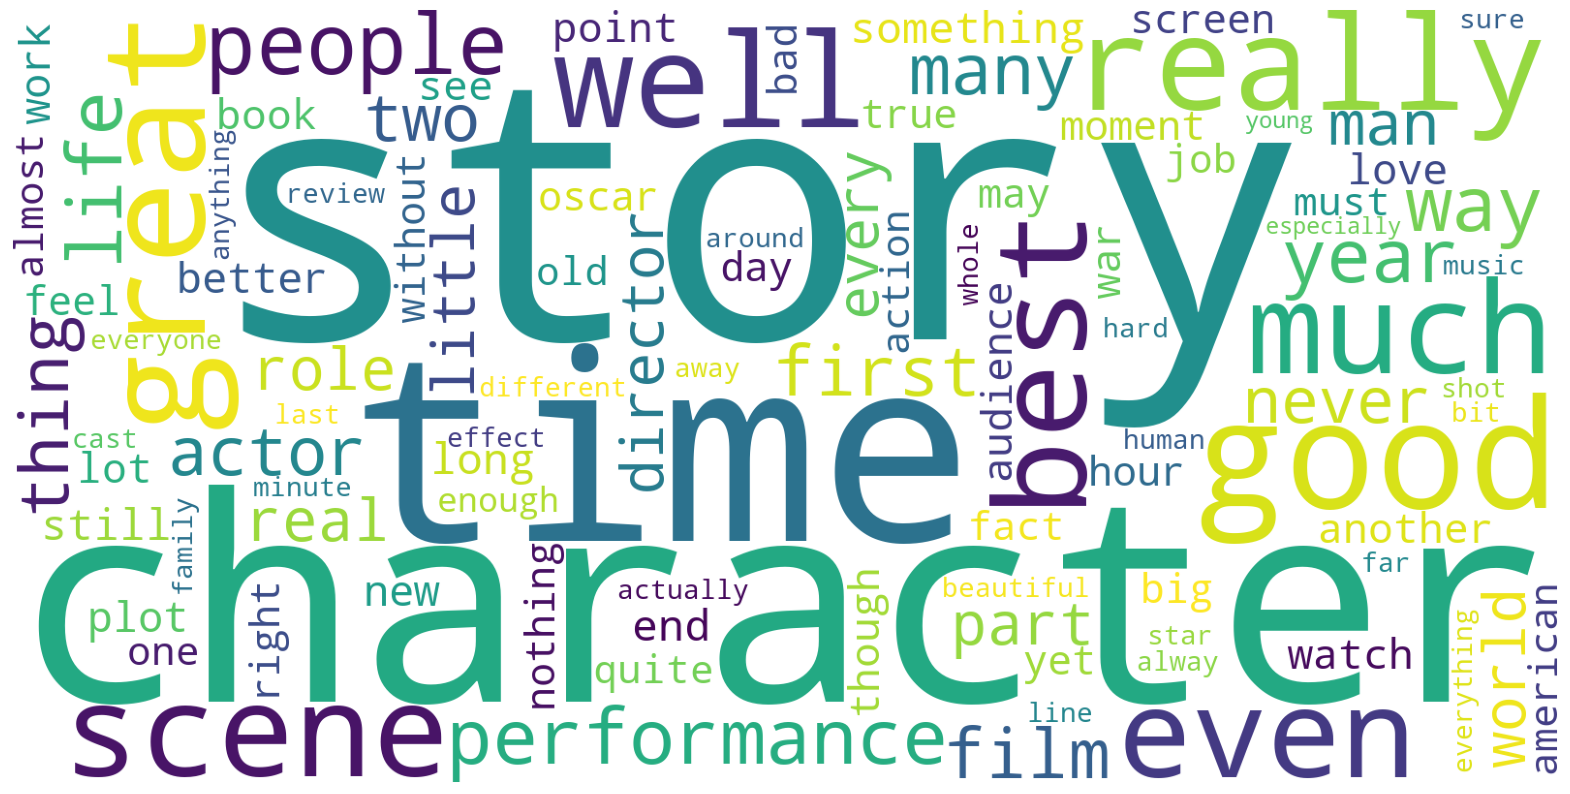

In [503]:
wordCloud(bf,100)

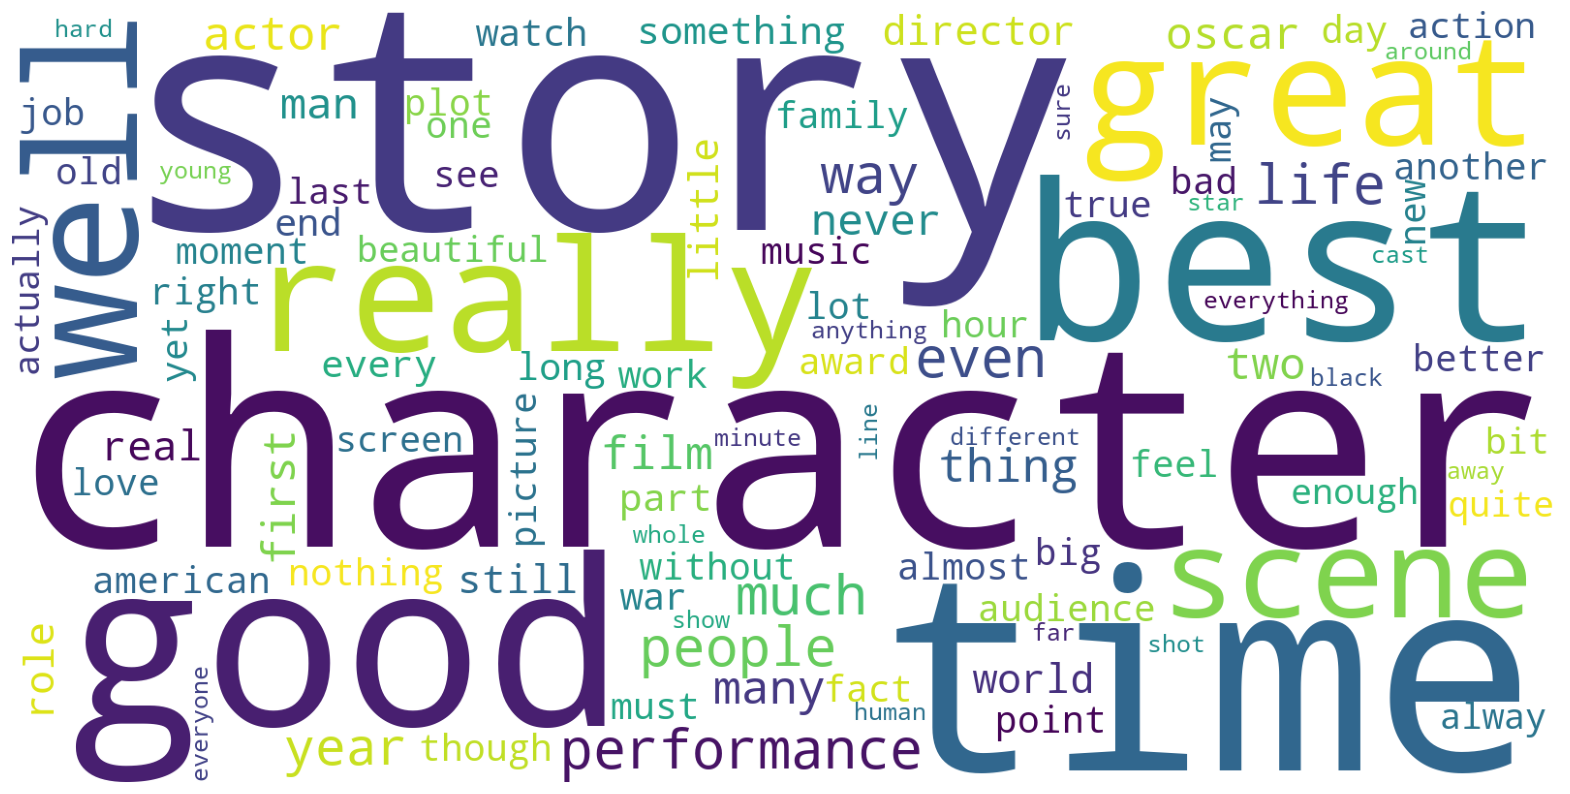

In [504]:
wordCloud(afnom,100)

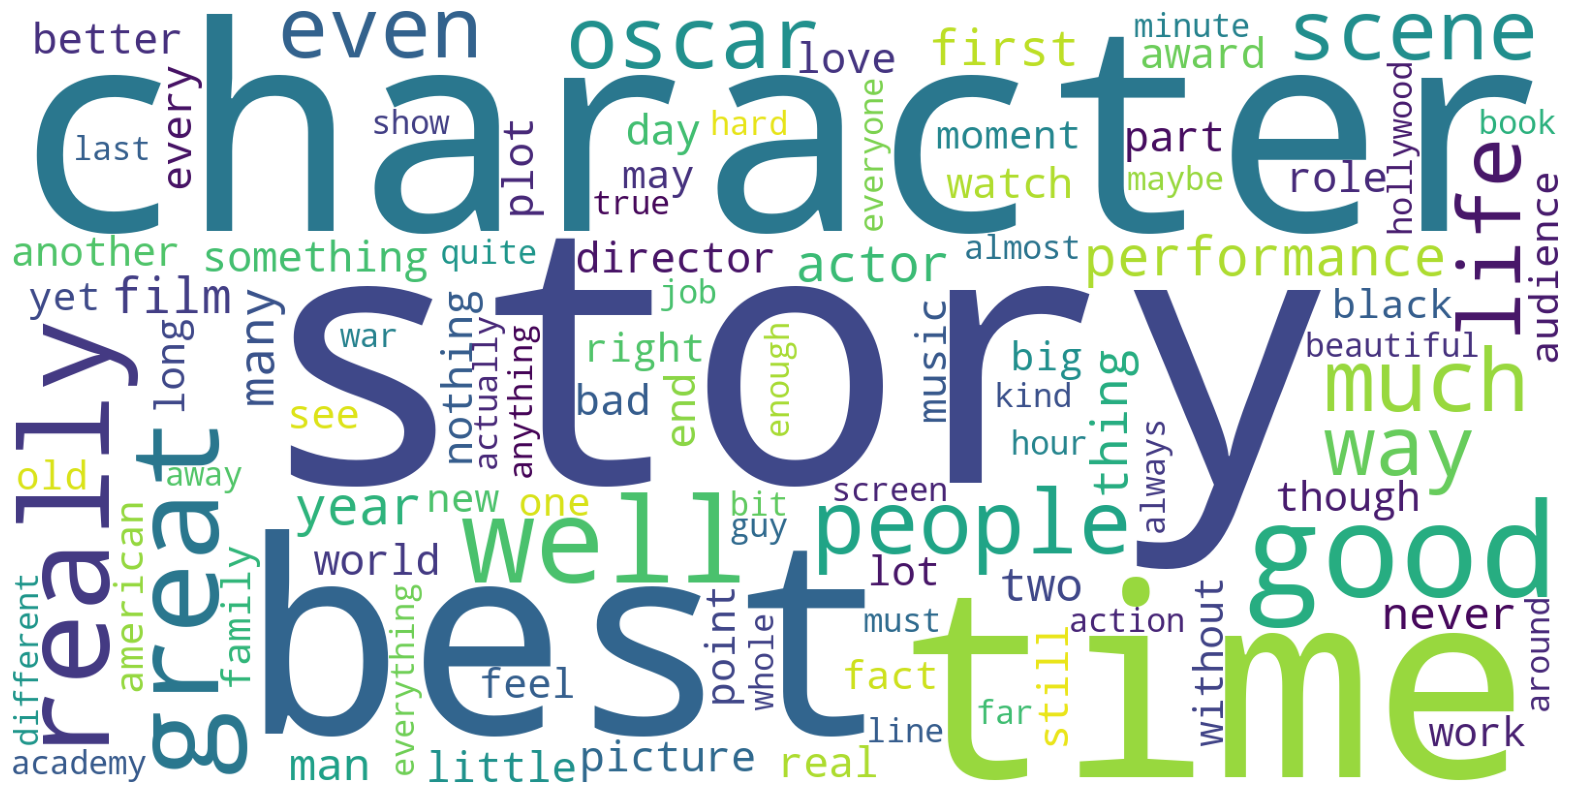

In [505]:
wordCloud(afawards,100)

In [506]:

def extract_main_occurrences(df, step, threshold1=None, threshold2=None):
    if threshold1 is not None and threshold2 is not None:
        # Filter the dataframe based on the given threshold
        filtered_df = df[(df['sentiment_with_rating'] >= threshold1) & (df['sentiment_with_rating'] < threshold2)][::step]
    else:
        filtered_df = df[::step]

    # Concatenate all the review contents into a single string
    reviews = ' '.join(filtered_df['review_content'].astype('str'))

    # Tokenize the string into words
    tokens = word_tokenize(reviews)
    stop_words = set(stopwords.words('english'))
    basic_words = ['film', 'movie', 'movies','people','time']
    punctuation = set(string.punctuation)
    
    # Filter out verbs
    tagged_words = pos_tag(tokens)
    tokens = [word for word, pos in tagged_words if pos != 'VB' and pos != 'VBD' and pos != 'VBG' and pos != 'VBN' and pos != 'VBP' and pos != 'VBZ']

    # Filter out stopwords, basic words, and punctuation
    tokens = [token.lower() for token in tokens if token.lower() not in stop_words and token.lower() not in basic_words and token.lower() not in punctuation]

    # Count the occurrences of each word
    word_counts = Counter(tokens)

    # Get the most common words
    main_occurrences = word_counts.most_common(15)  # Change the number to adjust the desired number of occurrences
    main_occurrences = [(word.upper(), count + 1) for word, count in main_occurrences]

    # Plot the word occurrences
    words, counts = zip(*main_occurrences)
    plt.figure(figsize=(20, 10))
    plt.bar(words, counts)
    plt.xlabel('Words')
    plt.ylabel('Occurrences')
    plt.title('Main Word Occurrences')
    plt.show()

    return main_occurrences

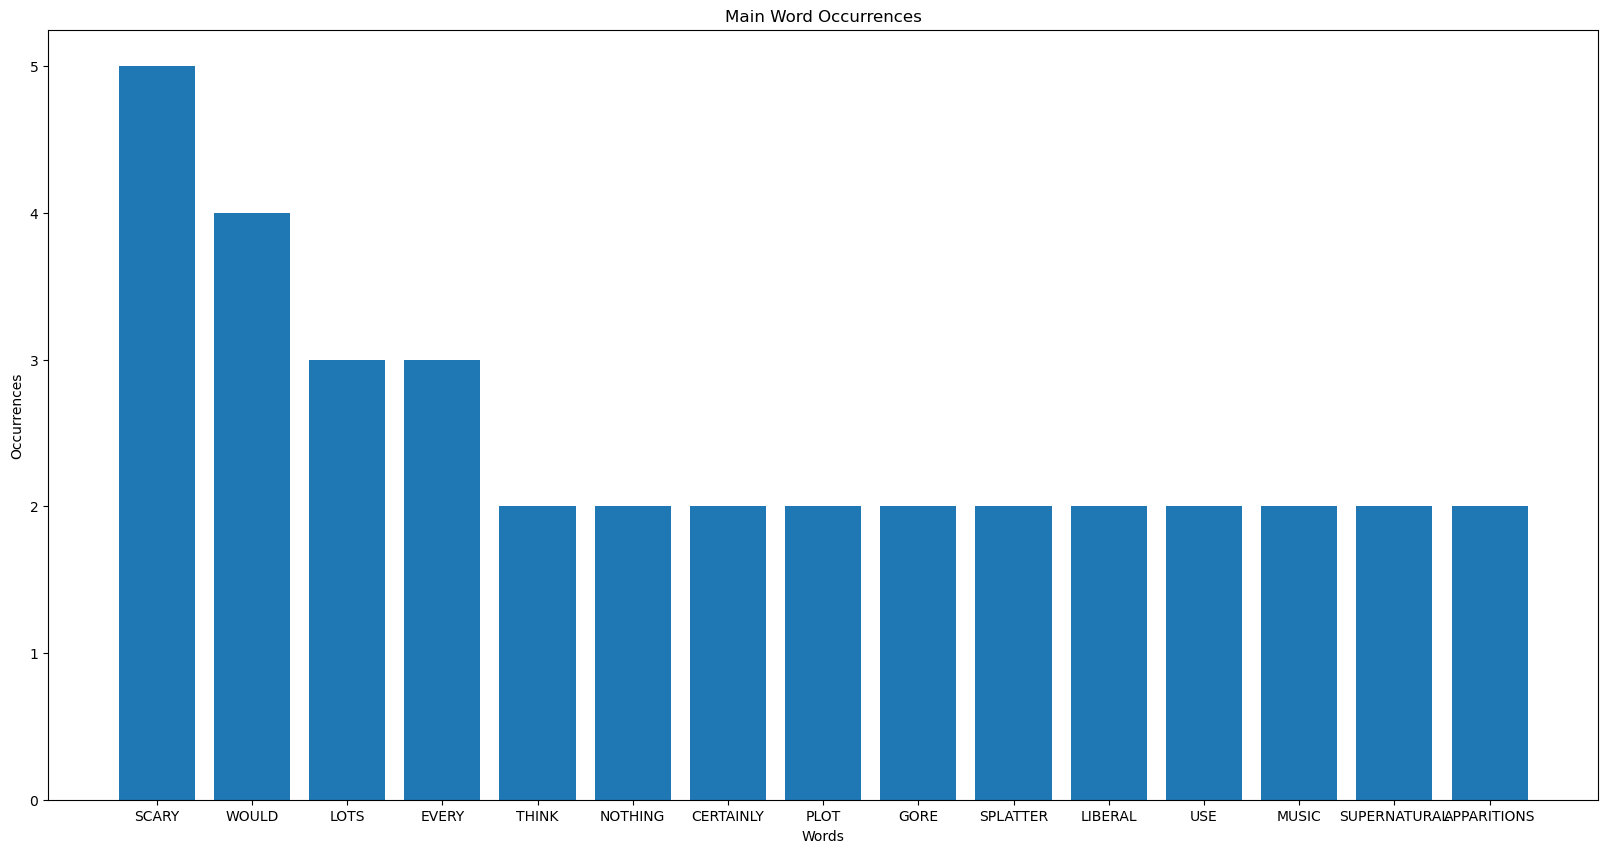

Main occurrences of words before nomination with sentiment score >= -0.9  and < -0.6 :
[('SCARY', 5), ('WOULD', 4), ('LOTS', 3), ('EVERY', 3), ('THINK', 2), ('NOTHING', 2), ('CERTAINLY', 2), ('PLOT', 2), ('GORE', 2), ('SPLATTER', 2), ('LIBERAL', 2), ('USE', 2), ('MUSIC', 2), ('SUPERNATURAL', 2), ('APPARITIONS', 2)]


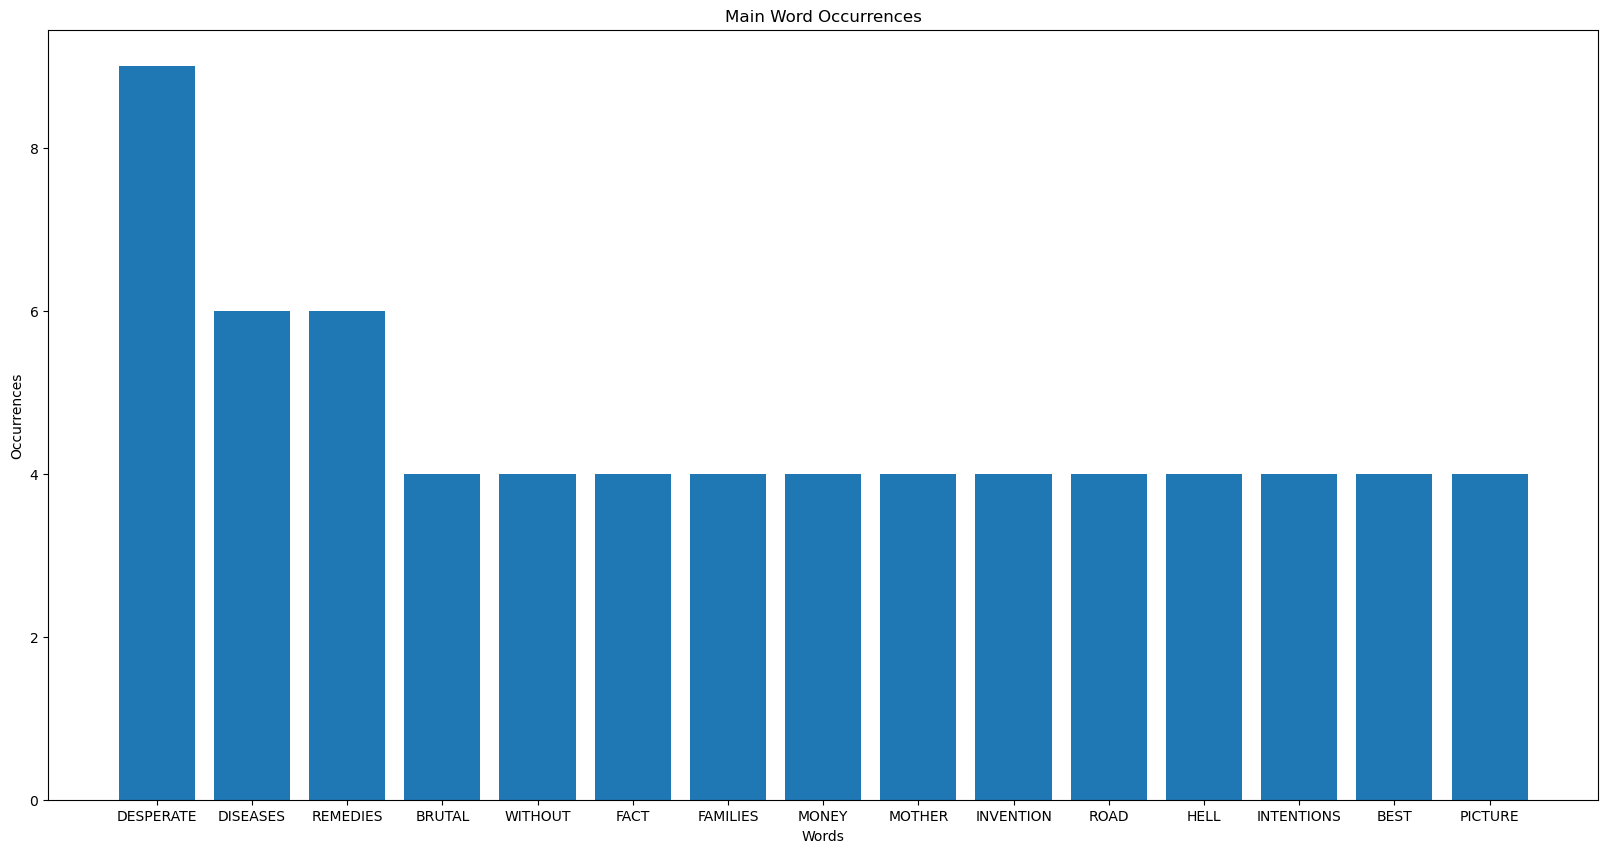

Main occurrences of words after nomination with sentiment score >= -0.9  and < -0.6 :
[('DESPERATE', 9), ('DISEASES', 6), ('REMEDIES', 6), ('BRUTAL', 4), ('WITHOUT', 4), ('FACT', 4), ('FAMILIES', 4), ('MONEY', 4), ('MOTHER', 4), ('INVENTION', 4), ('ROAD', 4), ('HELL', 4), ('INTENTIONS', 4), ('BEST', 4), ('PICTURE', 4)]


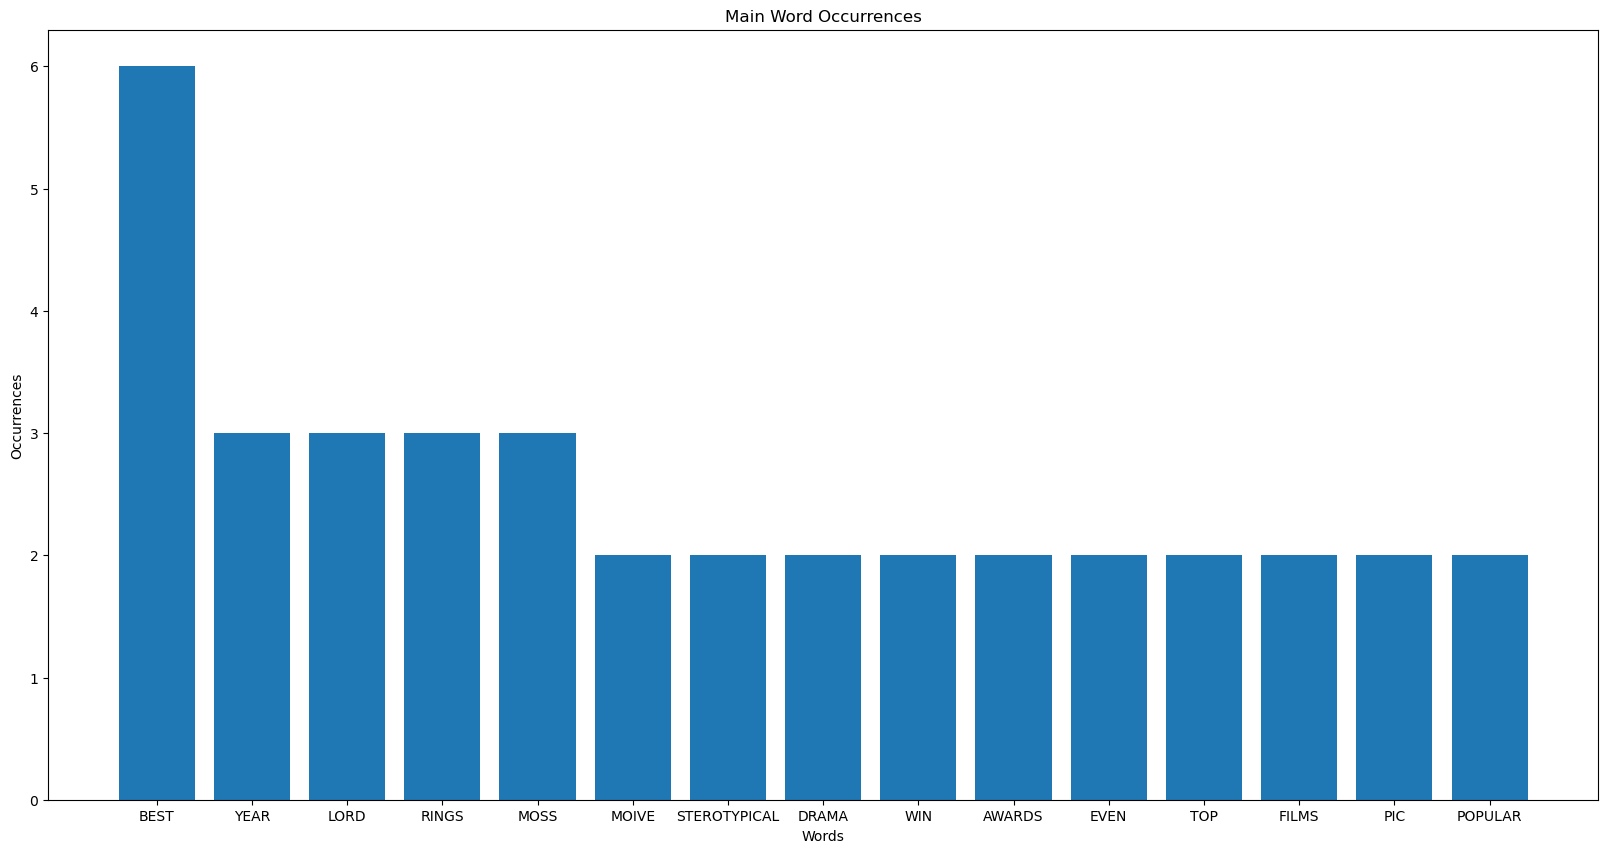

Main occurrences of words after awards with sentiment score  >= -0.9  and < -0.6 :
[('BEST', 6), ('YEAR', 3), ('LORD', 3), ('RINGS', 3), ('MOSS', 3), ('MOIVE', 2), ('STEROTYPICAL', 2), ('DRAMA', 2), ('WIN', 2), ('AWARDS', 2), ('EVEN', 2), ('TOP', 2), ('FILMS', 2), ('PIC', 2), ('POPULAR', 2)]


In [507]:
threshold1 = -0.9 #
threshold2 = -0.6 #
step=1

# Extract main occurrences before nomination
main_occurrences_bf_nom = extract_main_occurrences(df_bf_nom_nlp, step, threshold1, threshold2)
print("Main occurrences of words before nomination with sentiment score >=", threshold1, " and <",threshold2, ":")
print(main_occurrences_bf_nom)

# Extract main occurrences after nomination
main_occurrences_af_nom = extract_main_occurrences(df_af_nom_nlp, step, threshold1, threshold2)
print("Main occurrences of words after nomination with sentiment score >=", threshold1, " and <",threshold2, ":")
print(main_occurrences_af_nom)

# Extract main occurrences after awards
main_occurrences_af_awards = extract_main_occurrences(df_af_awards_nlp, step, threshold1, threshold2)
print("Main occurrences of words after awards with sentiment score  >=", threshold1, " and <",threshold2, ":")
print(main_occurrences_af_awards)

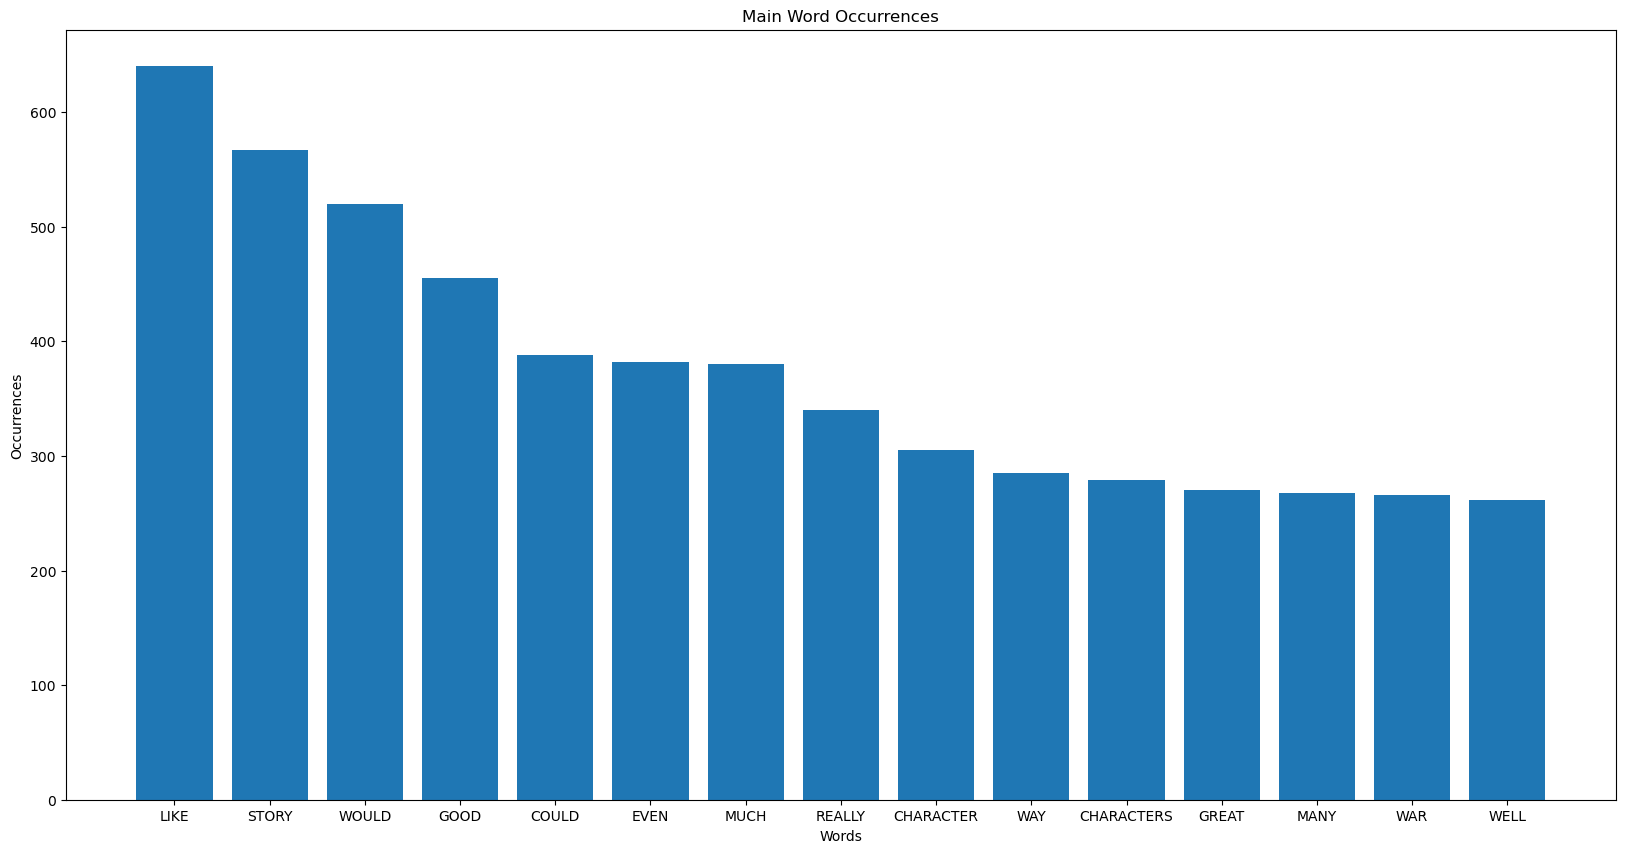

Main occurrences of words before nomination with sentiment score >= -0.6  and < 0.0 :
[('LIKE', 640), ('STORY', 567), ('WOULD', 520), ('GOOD', 455), ('COULD', 388), ('EVEN', 382), ('MUCH', 380), ('REALLY', 340), ('CHARACTER', 305), ('WAY', 285), ('CHARACTERS', 279), ('GREAT', 270), ('MANY', 268), ('WAR', 266), ('WELL', 262)]


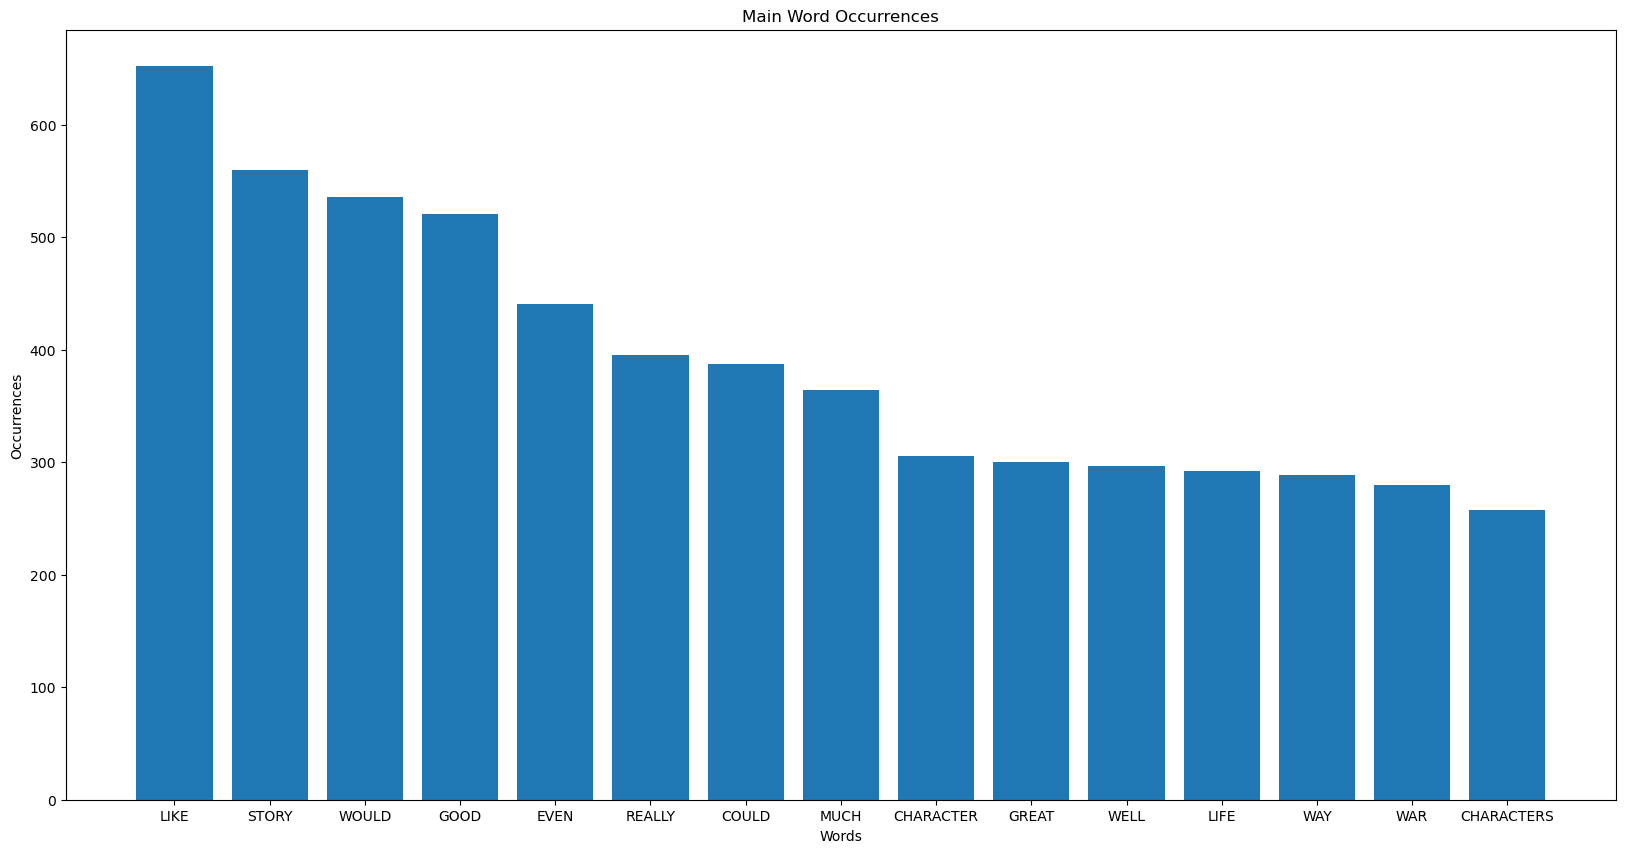

Main occurrences of words after nomination with sentiment score >= -0.6  and < 0.0 :
[('LIKE', 652), ('STORY', 560), ('WOULD', 536), ('GOOD', 521), ('EVEN', 441), ('REALLY', 395), ('COULD', 387), ('MUCH', 364), ('CHARACTER', 306), ('GREAT', 300), ('WELL', 297), ('LIFE', 292), ('WAY', 289), ('WAR', 280), ('CHARACTERS', 258)]


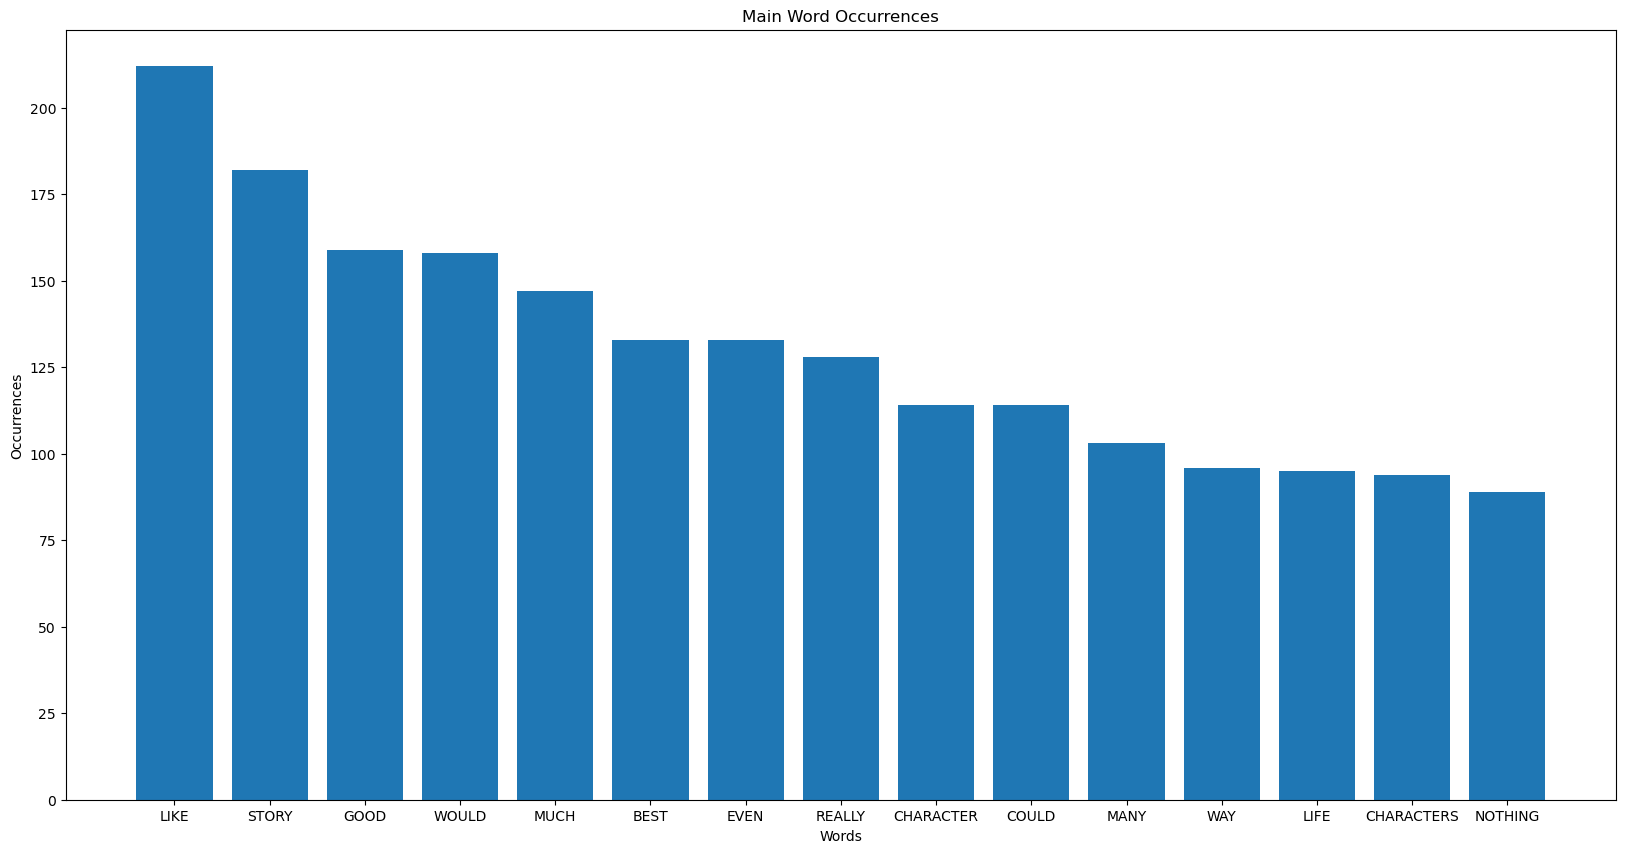

Main occurrences of words after awards with sentiment score  >= -0.6  and < 0.0 :
[('LIKE', 212), ('STORY', 182), ('GOOD', 159), ('WOULD', 158), ('MUCH', 147), ('BEST', 133), ('EVEN', 133), ('REALLY', 128), ('CHARACTER', 114), ('COULD', 114), ('MANY', 103), ('WAY', 96), ('LIFE', 95), ('CHARACTERS', 94), ('NOTHING', 89)]


In [508]:
threshold1 = -0.6 #
threshold2 = 0.0 #
step=5

# Extract main occurrences before nomination
main_occurrences_bf_nom = extract_main_occurrences(df_bf_nom_nlp, step, threshold1, threshold2)
print("Main occurrences of words before nomination with sentiment score >=", threshold1, " and <",threshold2, ":")
print(main_occurrences_bf_nom)

# Extract main occurrences after nomination
main_occurrences_af_nom = extract_main_occurrences(df_af_nom_nlp, step, threshold1, threshold2)
print("Main occurrences of words after nomination with sentiment score >=", threshold1, " and <",threshold2, ":")
print(main_occurrences_af_nom)

# Extract main occurrences after awards
main_occurrences_af_awards = extract_main_occurrences(df_af_awards_nlp, step, threshold1, threshold2)
print("Main occurrences of words after awards with sentiment score  >=", threshold1, " and <",threshold2, ":")
print(main_occurrences_af_awards)

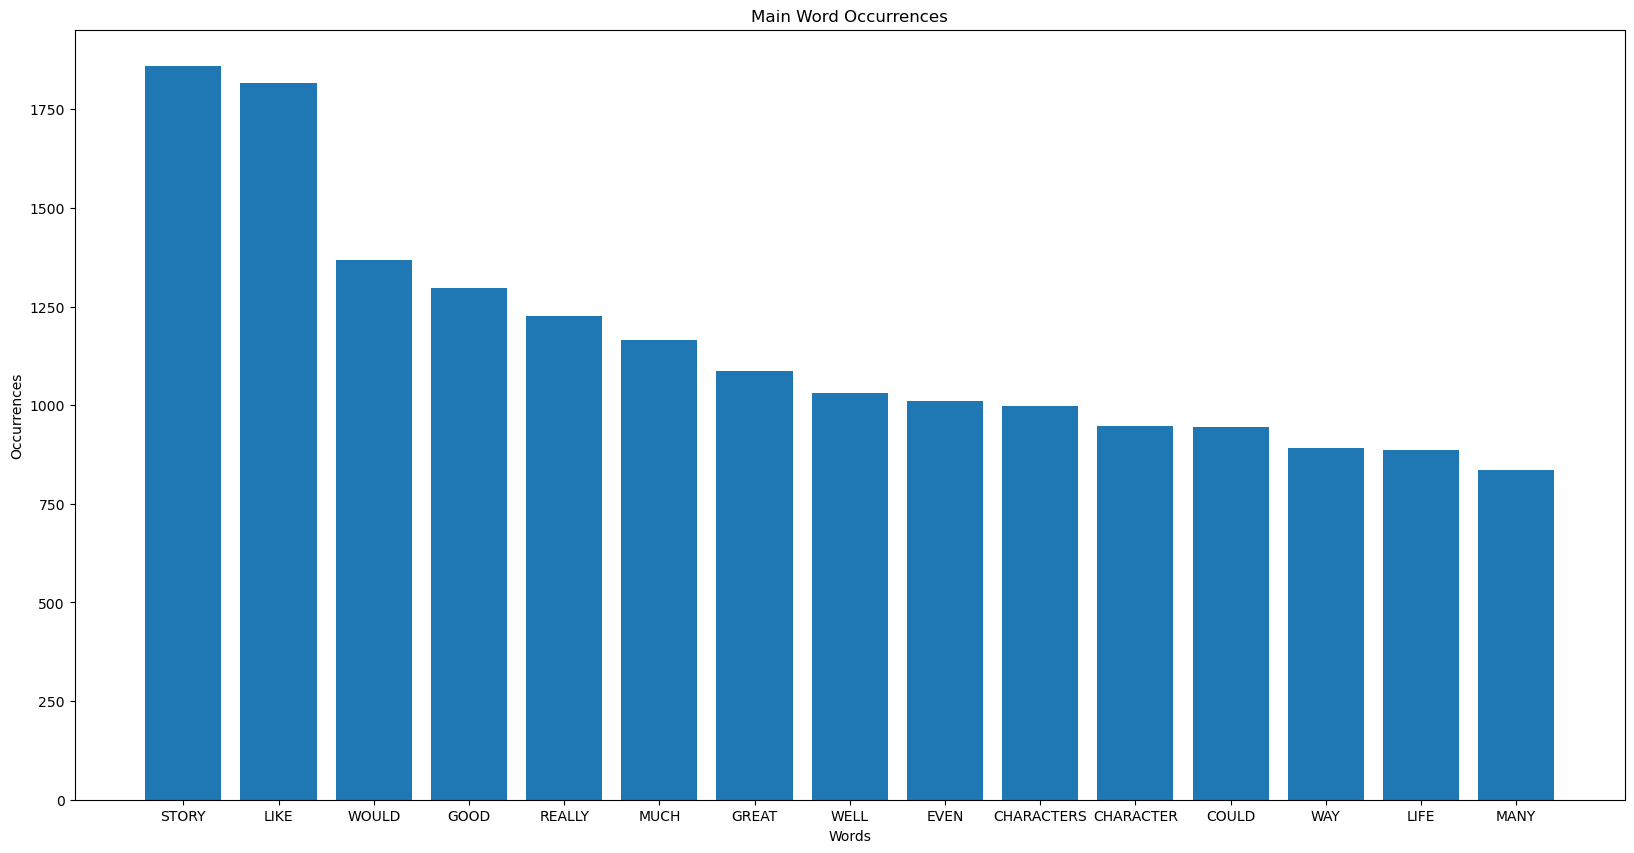

Main occurrences of words before nomination with sentiment score >= 0.0  and < 0.5 :
[('STORY', 1859), ('LIKE', 1818), ('WOULD', 1369), ('GOOD', 1296), ('REALLY', 1226), ('MUCH', 1166), ('GREAT', 1086), ('WELL', 1030), ('EVEN', 1010), ('CHARACTERS', 997), ('CHARACTER', 948), ('COULD', 946), ('WAY', 892), ('LIFE', 887), ('MANY', 835)]


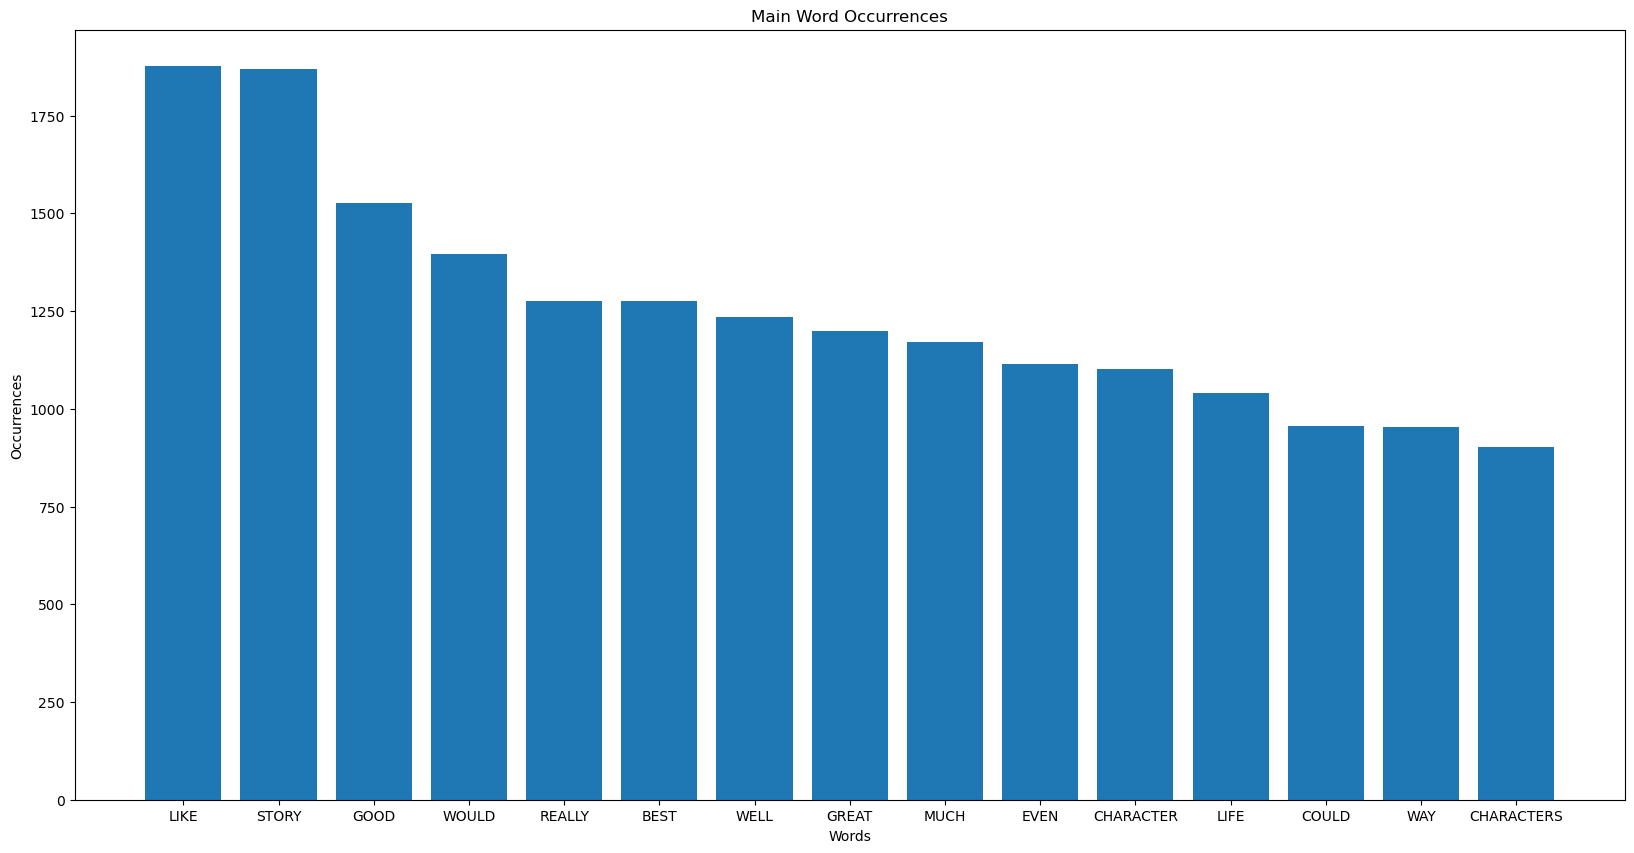

Main occurrences of words after nomination with sentiment score >= 0.0  and < 0.5 :
[('LIKE', 1876), ('STORY', 1869), ('GOOD', 1527), ('WOULD', 1395), ('REALLY', 1277), ('BEST', 1276), ('WELL', 1236), ('GREAT', 1198), ('MUCH', 1170), ('EVEN', 1115), ('CHARACTER', 1103), ('LIFE', 1040), ('COULD', 957), ('WAY', 954), ('CHARACTERS', 902)]


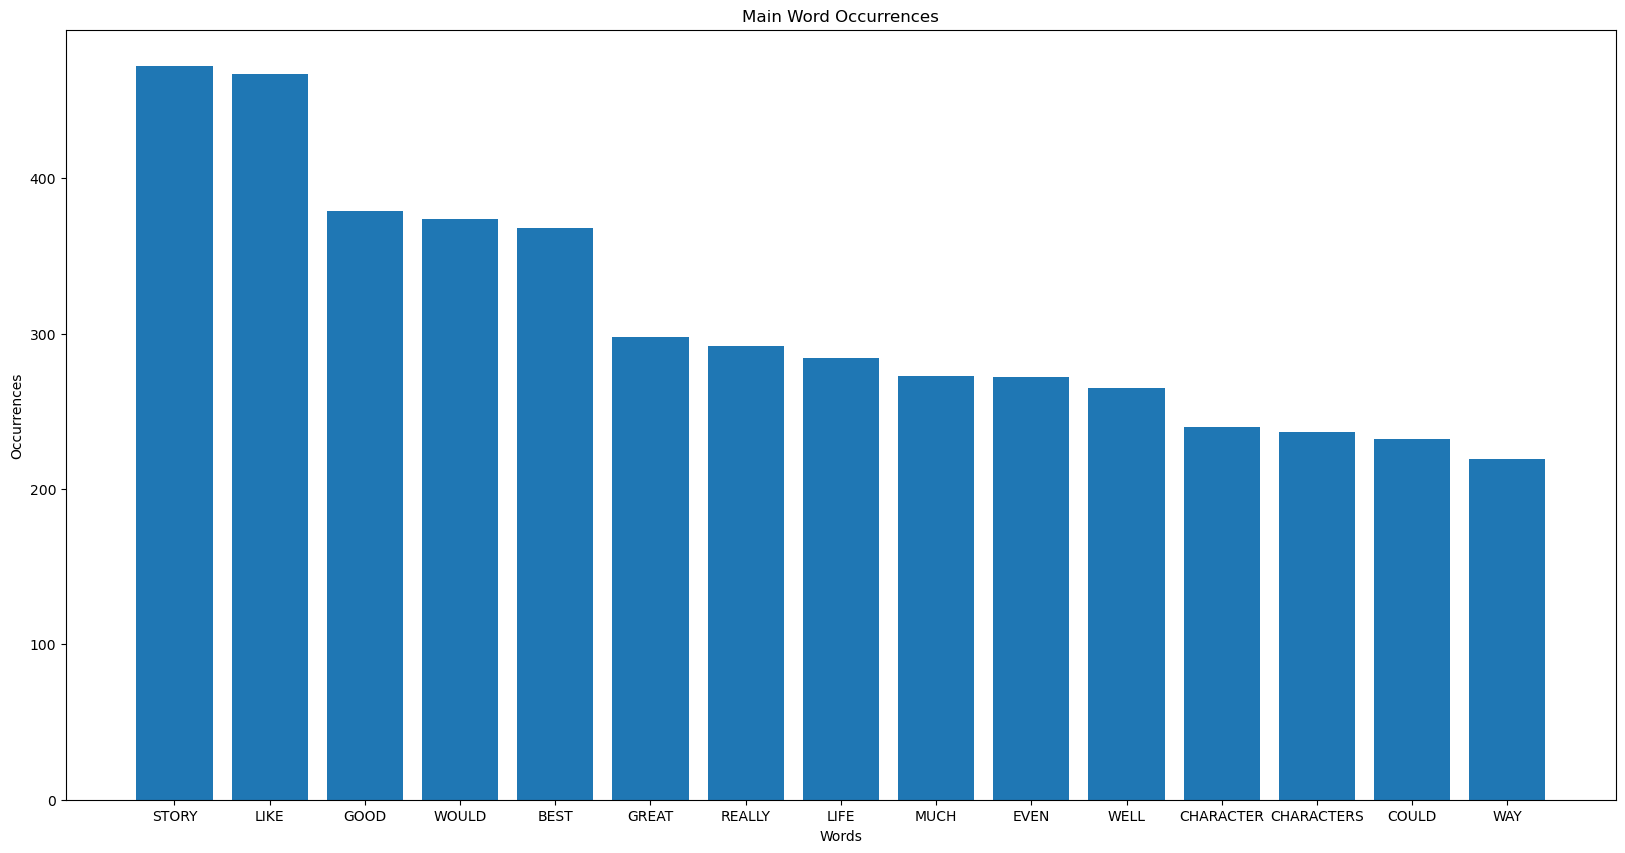

Main occurrences of words after awards with sentiment score  >= 0.0  and < 0.5 :
[('STORY', 472), ('LIKE', 467), ('GOOD', 379), ('WOULD', 374), ('BEST', 368), ('GREAT', 298), ('REALLY', 292), ('LIFE', 284), ('MUCH', 273), ('EVEN', 272), ('WELL', 265), ('CHARACTER', 240), ('CHARACTERS', 237), ('COULD', 232), ('WAY', 219)]


In [509]:
threshold1 = 0.0 #
threshold2 = 0.5 #
step=5

# Extract main occurrences before nomination
main_occurrences_bf_nom = extract_main_occurrences(df_bf_nom_nlp, step, threshold1, threshold2)
print("Main occurrences of words before nomination with sentiment score >=", threshold1, " and <",threshold2, ":")
print(main_occurrences_bf_nom)

# Extract main occurrences after nomination
main_occurrences_af_nom = extract_main_occurrences(df_af_nom_nlp, step, threshold1, threshold2)
print("Main occurrences of words after nomination with sentiment score >=", threshold1, " and <",threshold2, ":")
print(main_occurrences_af_nom)

# Extract main occurrences after awards
main_occurrences_af_awards = extract_main_occurrences(df_af_awards_nlp, step, threshold1, threshold2)
print("Main occurrences of words after awards with sentiment score  >=", threshold1, " and <",threshold2, ":")
print(main_occurrences_af_awards)


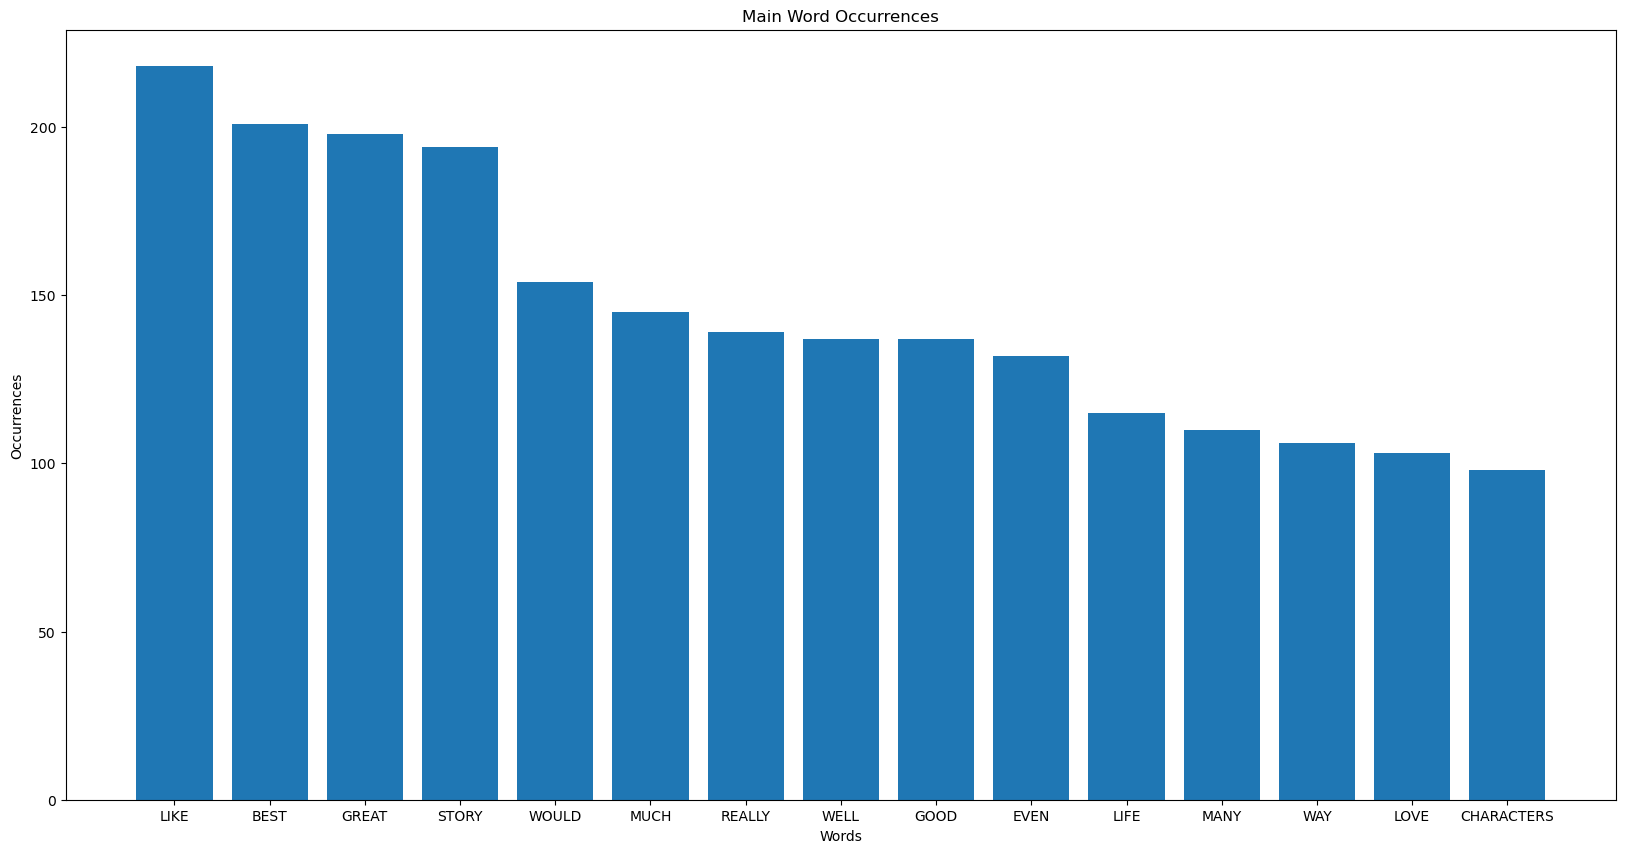

Main occurrences of words before nomination with sentiment score >= 0.5  and < 1.0 :
[('LIKE', 218), ('BEST', 201), ('GREAT', 198), ('STORY', 194), ('WOULD', 154), ('MUCH', 145), ('REALLY', 139), ('WELL', 137), ('GOOD', 137), ('EVEN', 132), ('LIFE', 115), ('MANY', 110), ('WAY', 106), ('LOVE', 103), ('CHARACTERS', 98)]


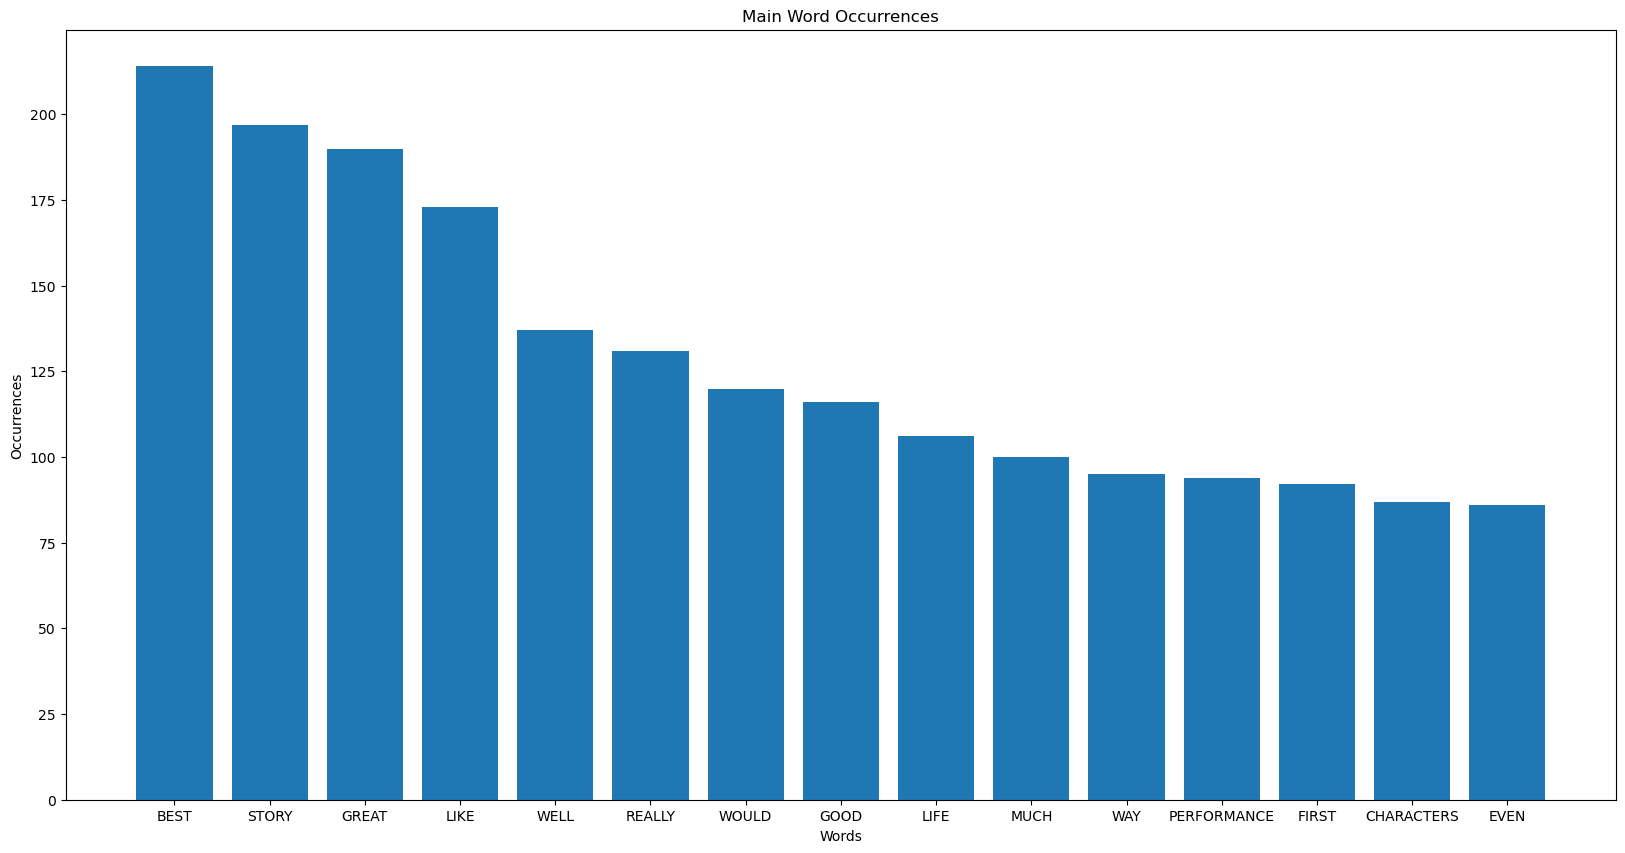

Main occurrences of words after nomination with sentiment score >= 0.5  and < 1.0 :
[('BEST', 214), ('STORY', 197), ('GREAT', 190), ('LIKE', 173), ('WELL', 137), ('REALLY', 131), ('WOULD', 120), ('GOOD', 116), ('LIFE', 106), ('MUCH', 100), ('WAY', 95), ('PERFORMANCE', 94), ('FIRST', 92), ('CHARACTERS', 87), ('EVEN', 86)]


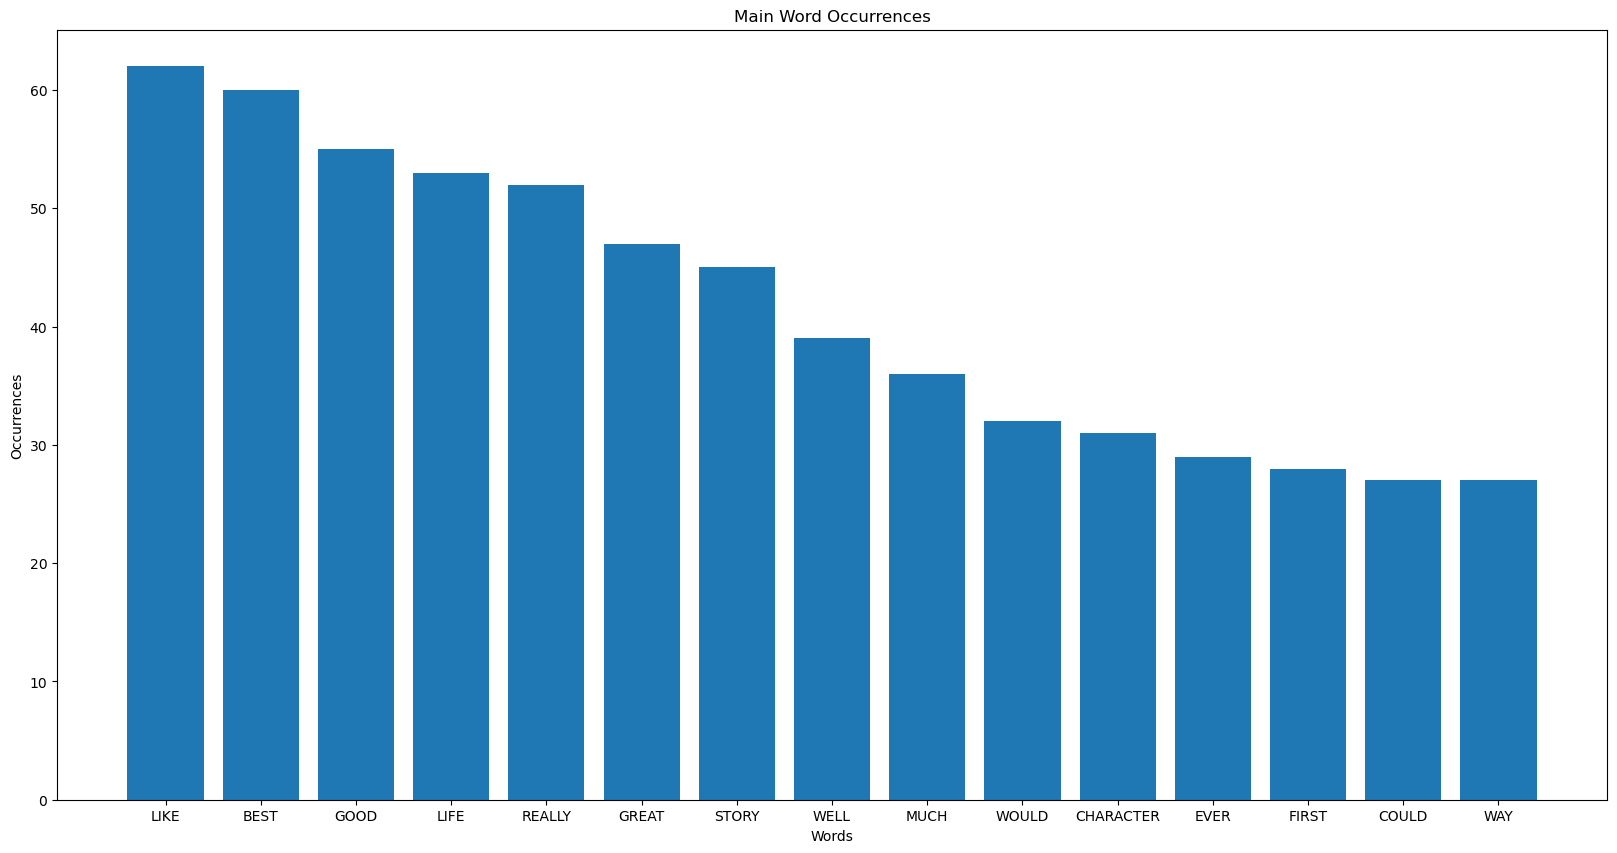

Main occurrences of words after awards with sentiment score  >= 0.5  and < 1.0 :
[('LIKE', 62), ('BEST', 60), ('GOOD', 55), ('LIFE', 53), ('REALLY', 52), ('GREAT', 47), ('STORY', 45), ('WELL', 39), ('MUCH', 36), ('WOULD', 32), ('CHARACTER', 31), ('EVER', 29), ('FIRST', 28), ('COULD', 27), ('WAY', 27)]


In [510]:
threshold1 = 0.5 #
threshold2 = 1.0 #
step = 20
# Extract main occurrences before nomination
main_occurrences_bf_nom = extract_main_occurrences(df_bf_nom_nlp, step, threshold1, threshold2)
print("Main occurrences of words before nomination with sentiment score >=", threshold1, " and <",threshold2, ":")
print(main_occurrences_bf_nom)

# Extract main occurrences after nomination
main_occurrences_af_nom = extract_main_occurrences(df_af_nom_nlp, step, threshold1, threshold2)
print("Main occurrences of words after nomination with sentiment score >=", threshold1, " and <",threshold2, ":")
print(main_occurrences_af_nom)

# Extract main occurrences after awards
main_occurrences_af_awards = extract_main_occurrences(df_af_awards_nlp, step, threshold1, threshold2)
print("Main occurrences of words after awards with sentiment score  >=", threshold1, " and <",threshold2, ":")
print(main_occurrences_af_awards)


## Analyzing the impact of nominations and awards on word occurences of previously disliked movies 

In [517]:
movie_ids_bfnom_neg = df_bf_nom_nlp.groupby('movie_id').filter(lambda x: (x['sentiment_with_rating'].mean() < 0.1))['movie_id'].unique()
movie_ids_bfnom_1to5 = df_bf_nom_nlp.groupby('movie_id').filter(lambda x: 0.1 <= x['sentiment_with_rating'].mean() < 0.5)['movie_id'].unique()
movie_ids_bfnom_5to10 = df_bf_nom_nlp.groupby('movie_id').filter(lambda x: x['sentiment_with_rating'].mean() >= 0.5)['movie_id'].unique()

# Average rating before nomination
avg_score_bfnom_neg = df_bf_nom_nlp[df_bf_nom_nlp['movie_id'].isin(movie_ids_bfnom_neg)]['sentiment_with_rating'].mean()
avg_score_bfnom_0to5 = df_bf_nom_nlp[df_bf_nom_nlp['movie_id'].isin(movie_ids_bfnom_0to5)]['sentiment_with_rating'].mean()
avg_score_bfnom_5to10 = df_bf_nom_nlp[df_bf_nom_nlp['movie_id'].isin(movie_ids_bfnom_5to10)]['sentiment_with_rating'].mean()

# Spotting the change after the nomination
avg_score_afnom_neg = df_af_nom_nlp[df_af_nom_nlp['movie_id'].isin(movie_ids_bfnom_neg)]['sentiment_with_rating'].mean()
avg_score_afnom_0to5 = df_af_nom_nlp[df_af_nom_nlp['movie_id'].isin(movie_ids_bfnom_0to5)]['sentiment_with_rating'].mean()
avg_score_afnom_5to10 = df_af_nom_nlp[df_af_nom_nlp['movie_id'].isin(movie_ids_bfnom_5to10)]['sentiment_with_rating'].mean()

# Spotting the change after the award
avg_score_afawards_neg = df_af_awards_nlp[df_af_awards_nlp['movie_id'].isin(movie_ids_bfnom_neg)]['sentiment_with_rating'].mean()
avg_score_afawards_0to5 = df_af_awards_nlp[df_af_awards_nlp['movie_id'].isin(movie_ids_bfnom_0to5)]['sentiment_with_rating'].mean()
avg_score_afawards_5to10 = df_af_awards_nlp[df_af_awards_nlp['movie_id'].isin(movie_ids_bfnom_5to10)]['sentiment_with_rating'].mean()


In [518]:
movie_ids_bfnom_neg

array(['tt0120815', 'tt0120863', 'tt0265086', 'tt0408306', 'tt0449467',
       'tt0498380', 'tt0497116', 'tt0887912', 'tt0478304', 'tt1322269',
       'tt1392190'], dtype=object)

In [529]:
print('Average change in sentiment score after nomination for negative sentiment score:', avg_score_afnom_neg - avg_score_bfnom_neg)

print('Average change in sentiment score after awards for negative sentiment score:', avg_score_afawards_neg - avg_score_afnom_neg)

Average change in sentiment score after nomination for negative sentiment score: 0.03221525886782539
Average change in sentiment score after awards for negative sentiment score: -0.022259349175231147


In [530]:
print('Average change in sentiment score after nomination for 0.1 to 0.5 sentiment score:', avg_score_afnom_0to5 - avg_score_bfnom_0to5)

print('Average change in sentiment score after awards for 0.1 to 0.5 sentiment score:', avg_score_afawards_0to5 - avg_score_afnom_0to5)

Average change in sentiment score after nomination for 0.1 to 0.5 sentiment score: -0.025587340913997586
Average change in sentiment score after awards for 0.1 to 0.5 sentiment score: 0.0017387617279847334


In [531]:
print('Average change in sentiment score after nomination for 0.5 to 1 sentiment score:', avg_score_afnom_5to10 - avg_score_bfnom_5to10)

print('Average change in sentiment score after awards for 0.5 to 1 sentiment score:', avg_score_afawards_5to10 - avg_score_afnom_5to10)

Average change in sentiment score after nomination for 0.5 to 1 sentiment score: -0.014450447111116038
Average change in sentiment score after awards for 0.5 to 1 sentiment score: -0.01577630873511332


## Let's take into account movies with average negative sentiment score and see the difference in main words after nomination and awards

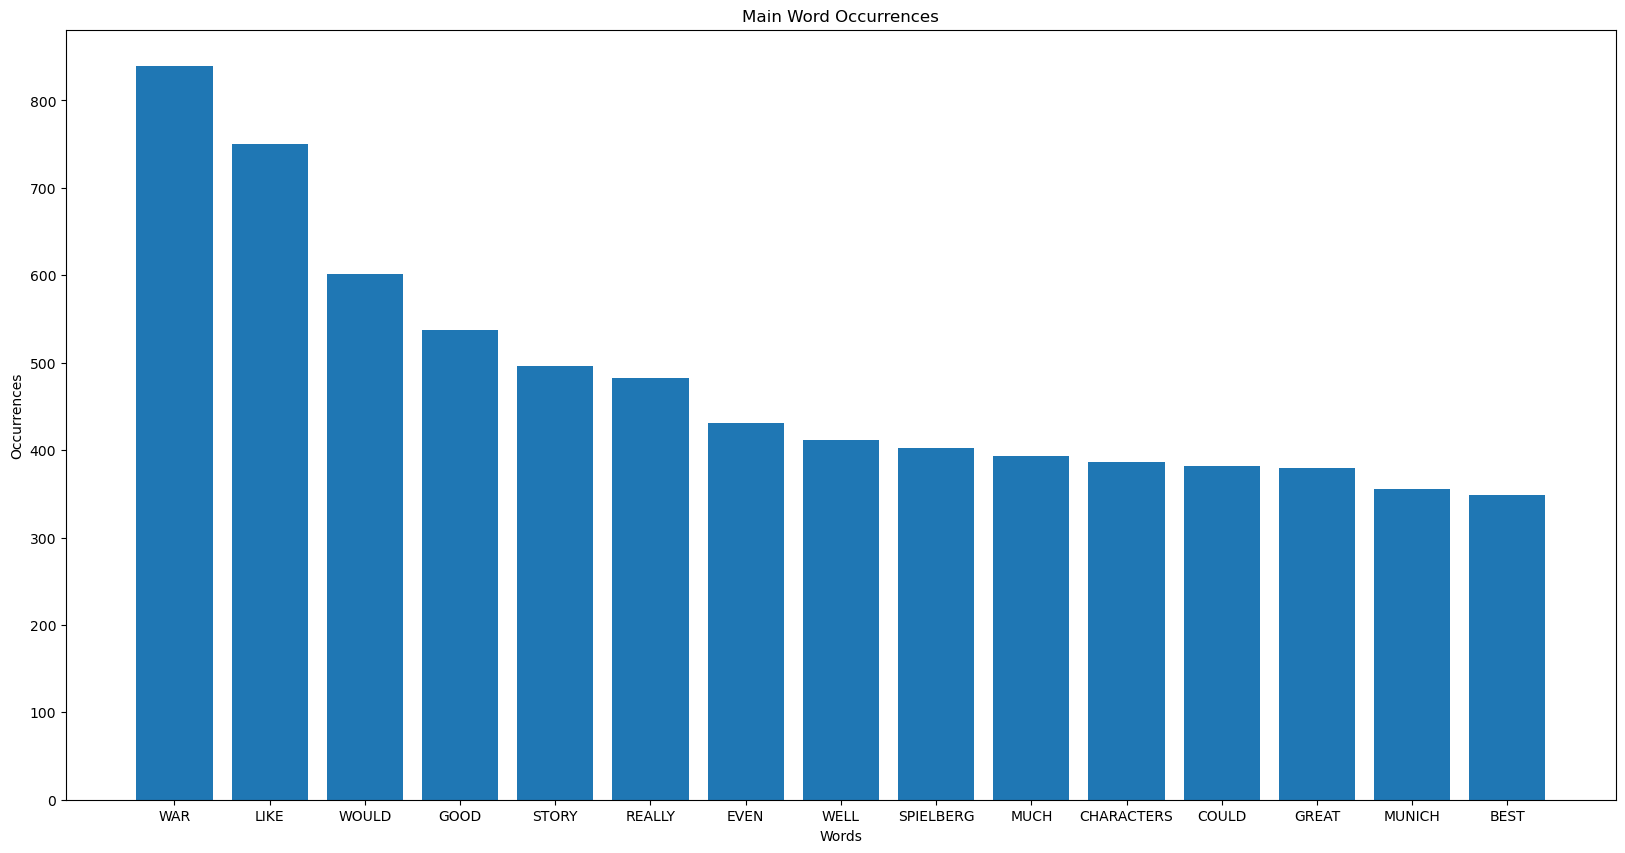

[('WAR', 839), ('LIKE', 750), ('WOULD', 601), ('GOOD', 537), ('STORY', 496), ('REALLY', 482), ('EVEN', 431), ('WELL', 412), ('SPIELBERG', 402), ('MUCH', 393), ('CHARACTERS', 386), ('COULD', 382), ('GREAT', 380), ('MUNICH', 355), ('BEST', 349)]


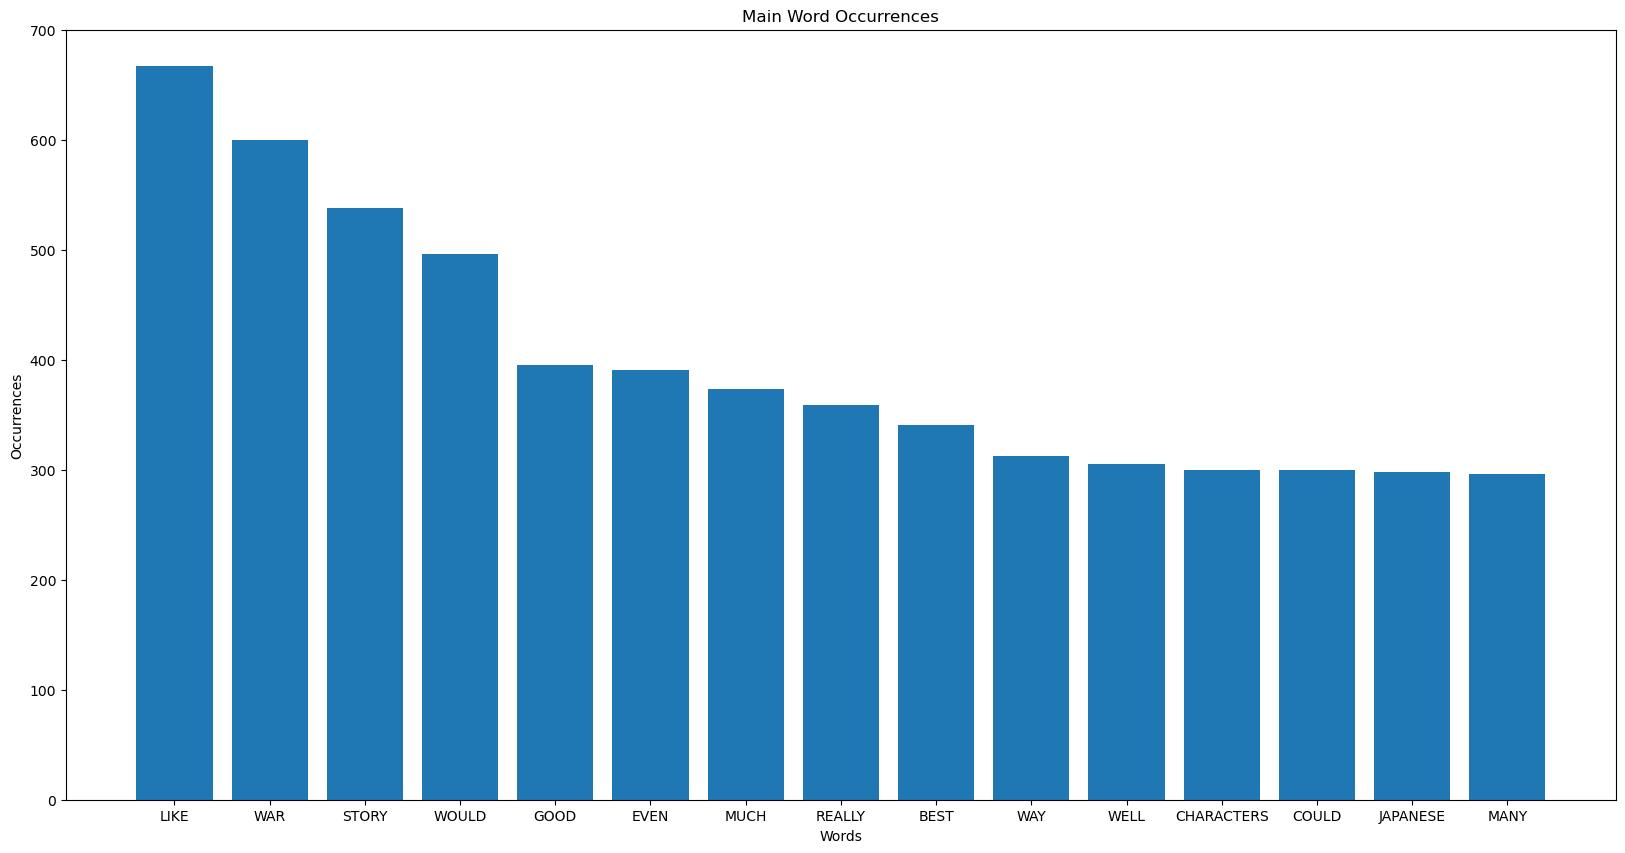

[('LIKE', 667), ('WAR', 600), ('STORY', 538), ('WOULD', 496), ('GOOD', 395), ('EVEN', 391), ('MUCH', 374), ('REALLY', 359), ('BEST', 341), ('WAY', 313), ('WELL', 305), ('CHARACTERS', 300), ('COULD', 300), ('JAPANESE', 298), ('MANY', 296)]


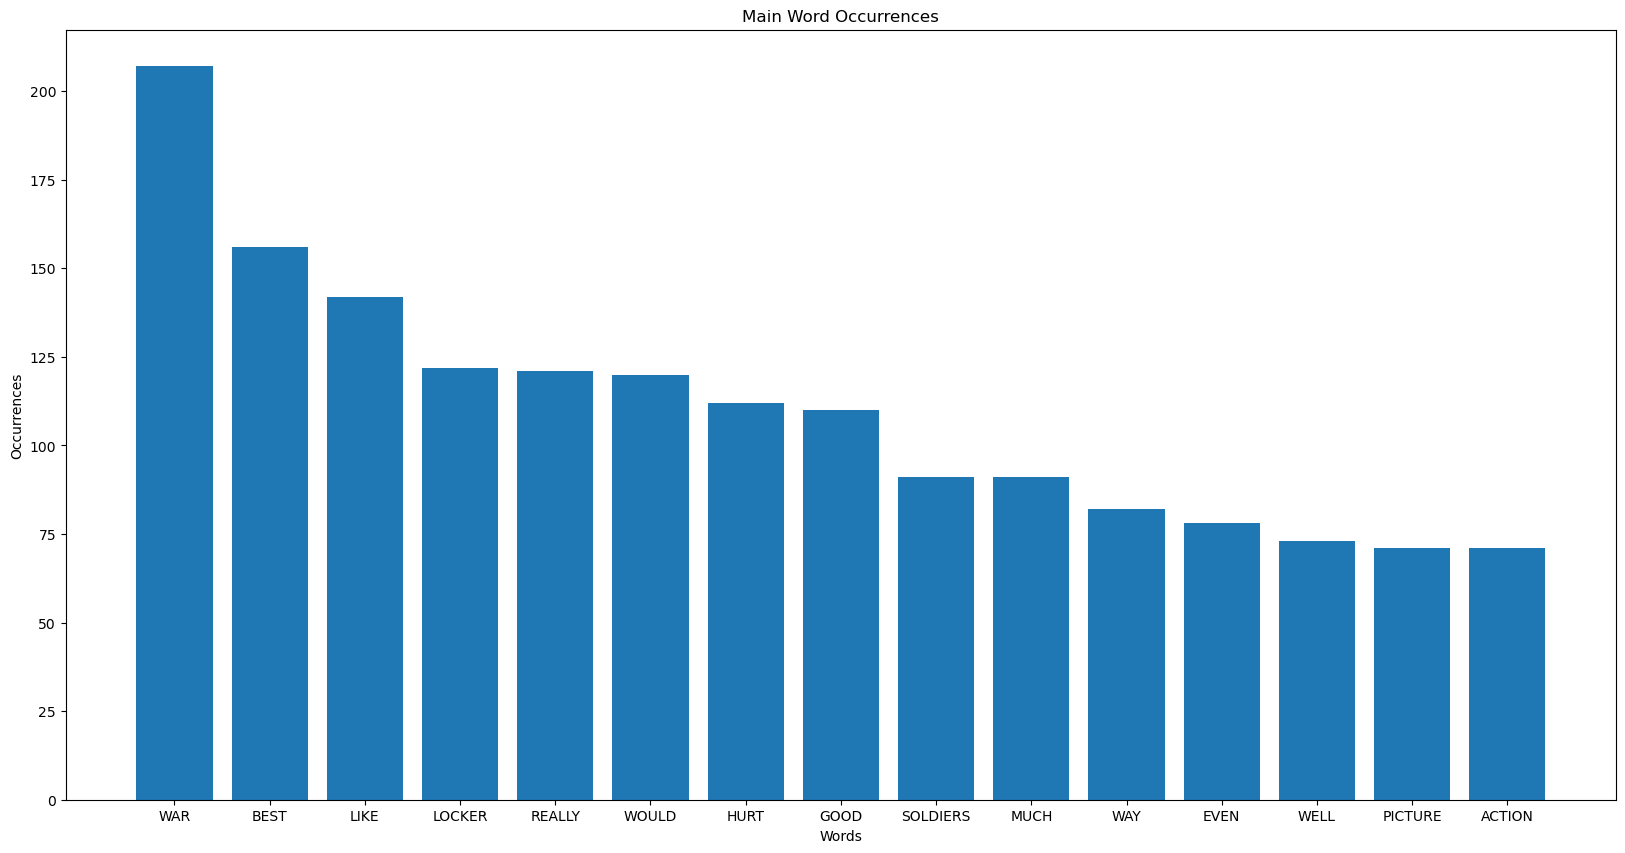

[('WAR', 207), ('BEST', 156), ('LIKE', 142), ('LOCKER', 122), ('REALLY', 121), ('WOULD', 120), ('HURT', 112), ('GOOD', 110), ('SOLDIERS', 91), ('MUCH', 91), ('WAY', 82), ('EVEN', 78), ('WELL', 73), ('PICTURE', 71), ('ACTION', 71)]


In [522]:
step=1
# Extract main occurrences before nomination
main_occurrences_bf_nom = extract_main_occurrences(df_bf_nom_nlp[df_bf_nom_nlp['movie_id'].isin(movie_ids_bfnom_neg)], step)
print(main_occurrences_bf_nom)

# Extract main occurrences after nomination
main_occurrences_af_nom = extract_main_occurrences(df_af_nom_nlp[df_af_nom_nlp['movie_id'].isin(movie_ids_bfnom_neg)], step)
print(main_occurrences_af_nom)

# Extract main occurrences after awards
main_occurrences_af_awards = extract_main_occurrences(df_af_awards_nlp[df_af_awards_nlp['movie_id'].isin(movie_ids_bfnom_neg)], step)
print(main_occurrences_af_awards)

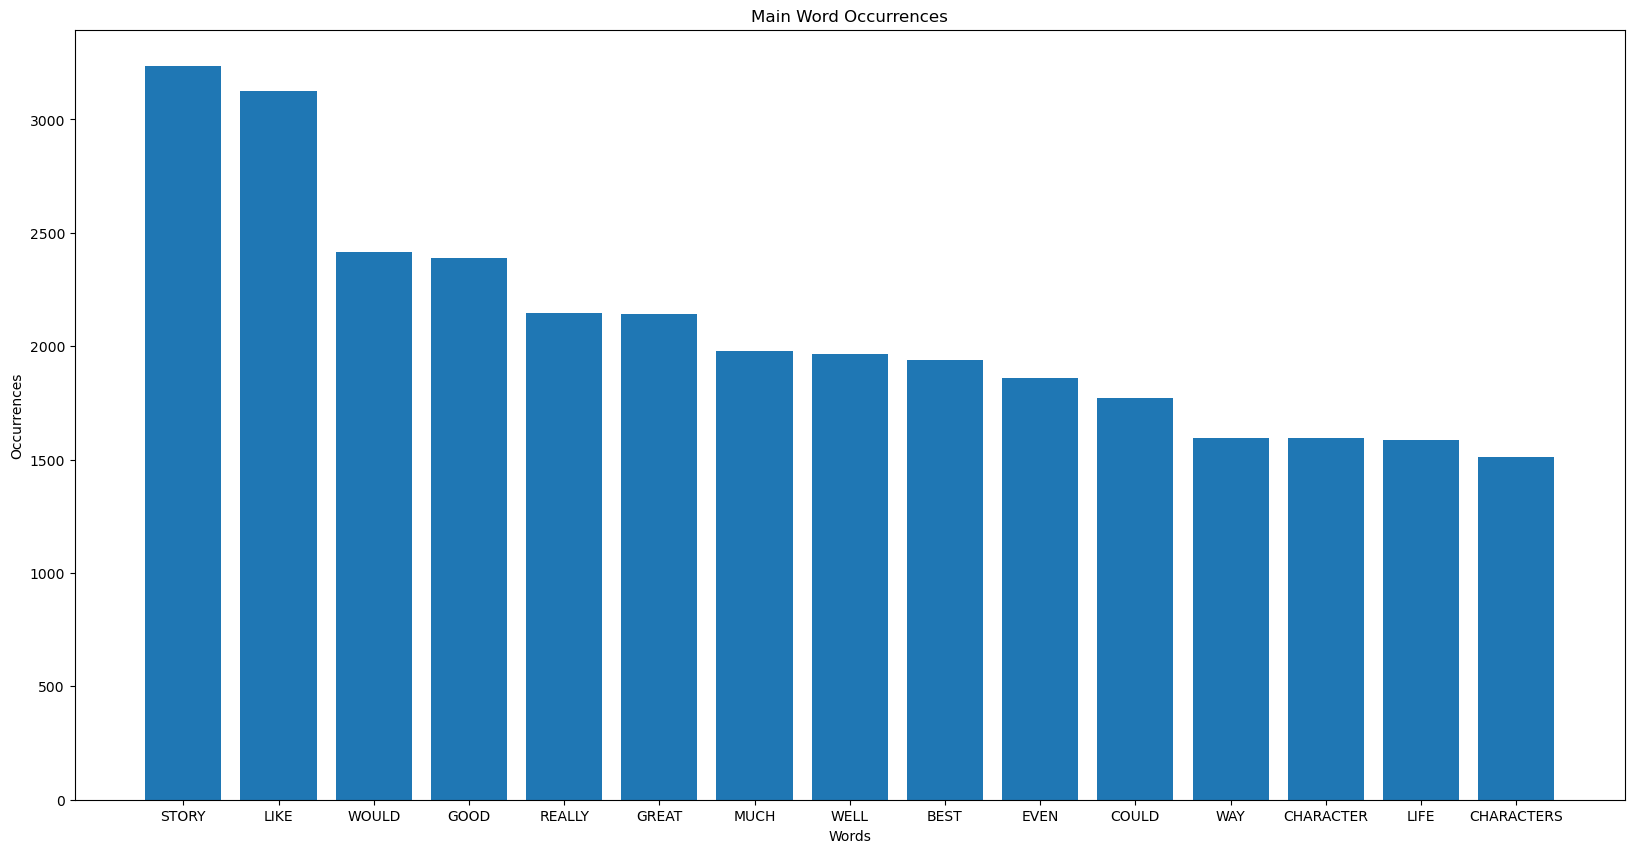

[('STORY', 3234), ('LIKE', 3124), ('WOULD', 2417), ('GOOD', 2391), ('REALLY', 2146), ('GREAT', 2143), ('MUCH', 1979), ('WELL', 1965), ('BEST', 1939), ('EVEN', 1861), ('COULD', 1770), ('WAY', 1596), ('CHARACTER', 1594), ('LIFE', 1585), ('CHARACTERS', 1513)]


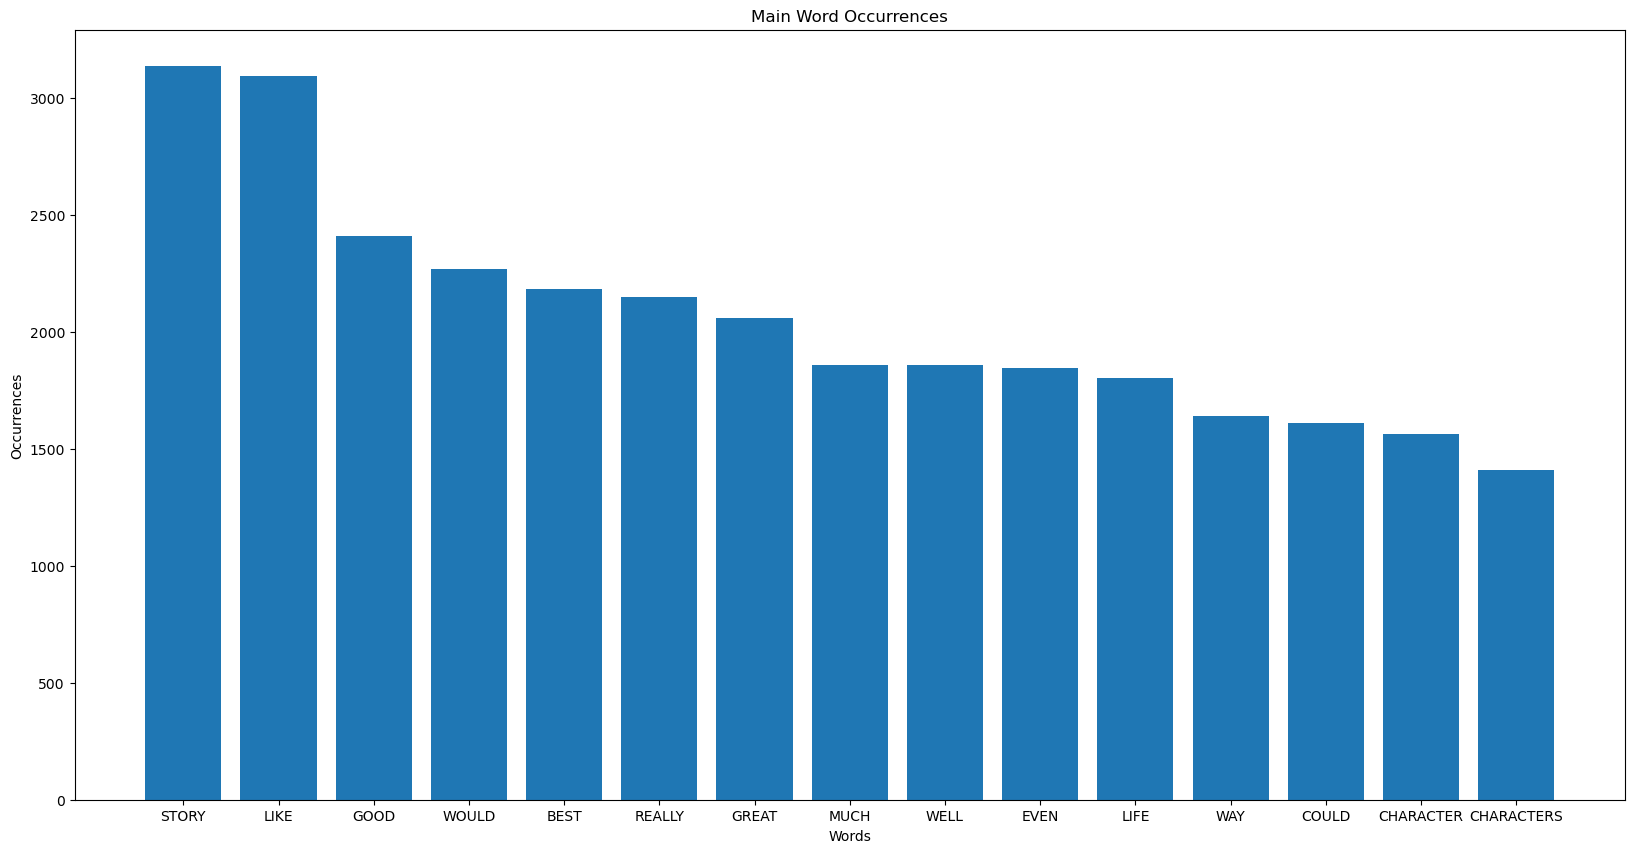

[('STORY', 3134), ('LIKE', 3095), ('GOOD', 2411), ('WOULD', 2266), ('BEST', 2181), ('REALLY', 2150), ('GREAT', 2059), ('MUCH', 1859), ('WELL', 1856), ('EVEN', 1843), ('LIFE', 1804), ('WAY', 1641), ('COULD', 1610), ('CHARACTER', 1563), ('CHARACTERS', 1407)]


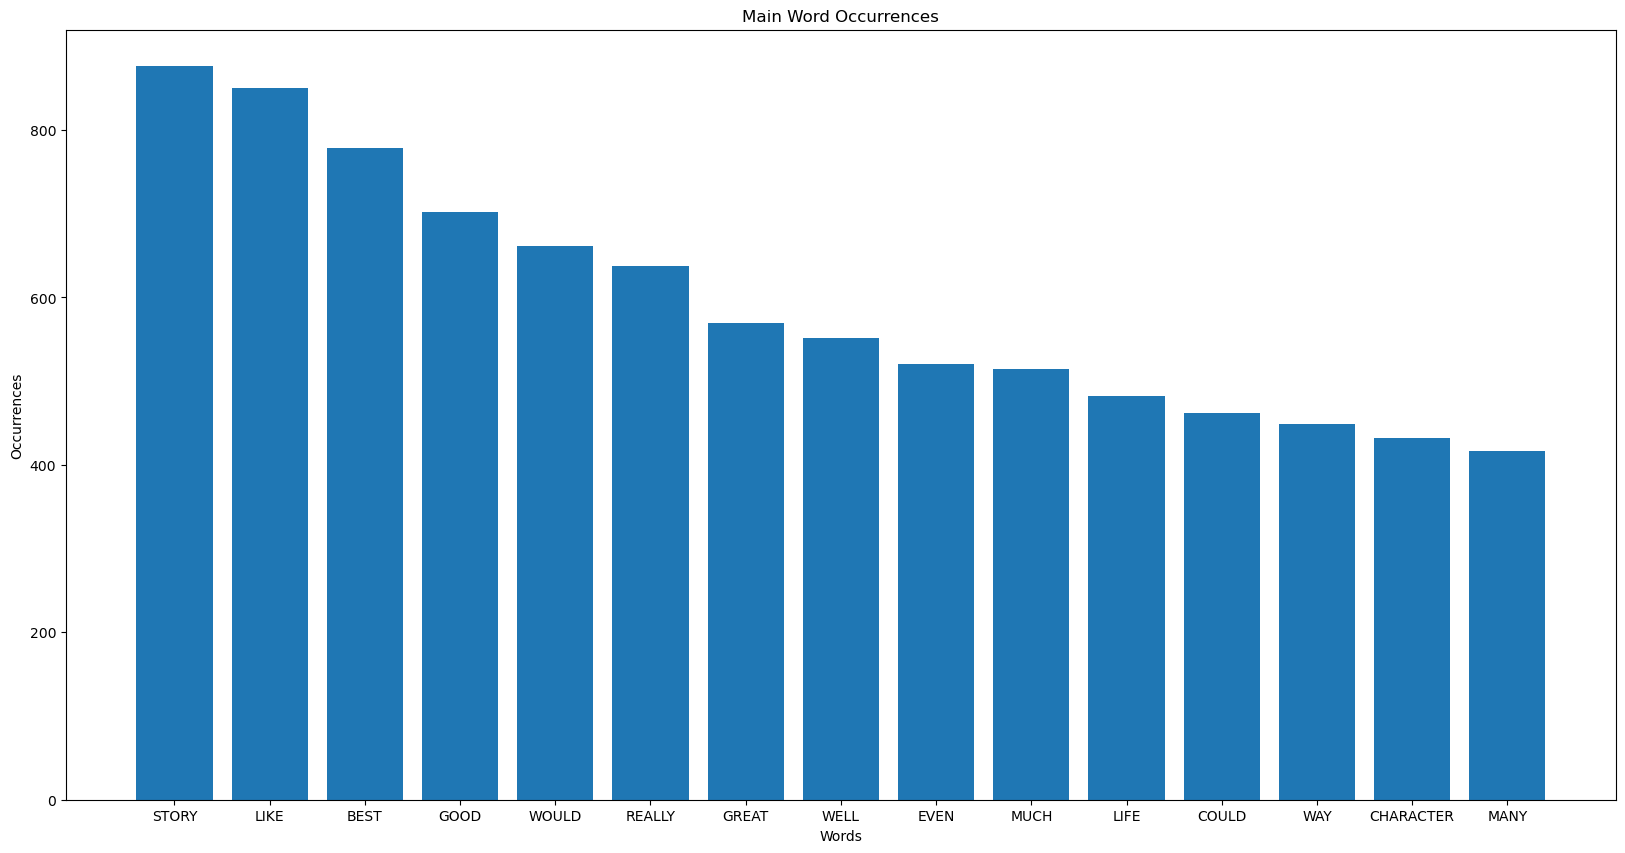

[('STORY', 876), ('LIKE', 850), ('BEST', 779), ('GOOD', 702), ('WOULD', 661), ('REALLY', 637), ('GREAT', 569), ('WELL', 552), ('EVEN', 521), ('MUCH', 514), ('LIFE', 482), ('COULD', 462), ('WAY', 449), ('CHARACTER', 432), ('MANY', 416)]


In [523]:
step=5
# sentiment score between 0.1 and 0.5
# Extract main occurrences before nomination
main_occurrences_bf_nom = extract_main_occurrences(df_bf_nom_nlp[df_bf_nom_nlp['movie_id'].isin(movie_ids_bfnom_0to5)], step)
print(main_occurrences_bf_nom)

# Extract main occurrences after nomination
main_occurrences_af_nom = extract_main_occurrences(df_af_nom_nlp[df_af_nom_nlp['movie_id'].isin(movie_ids_bfnom_0to5)], step)
print(main_occurrences_af_nom)

# Extract main occurrences after awards
main_occurrences_af_awards = extract_main_occurrences(df_af_awards_nlp[df_af_awards_nlp['movie_id'].isin(movie_ids_bfnom_0to5)], step)
print(main_occurrences_af_awards)

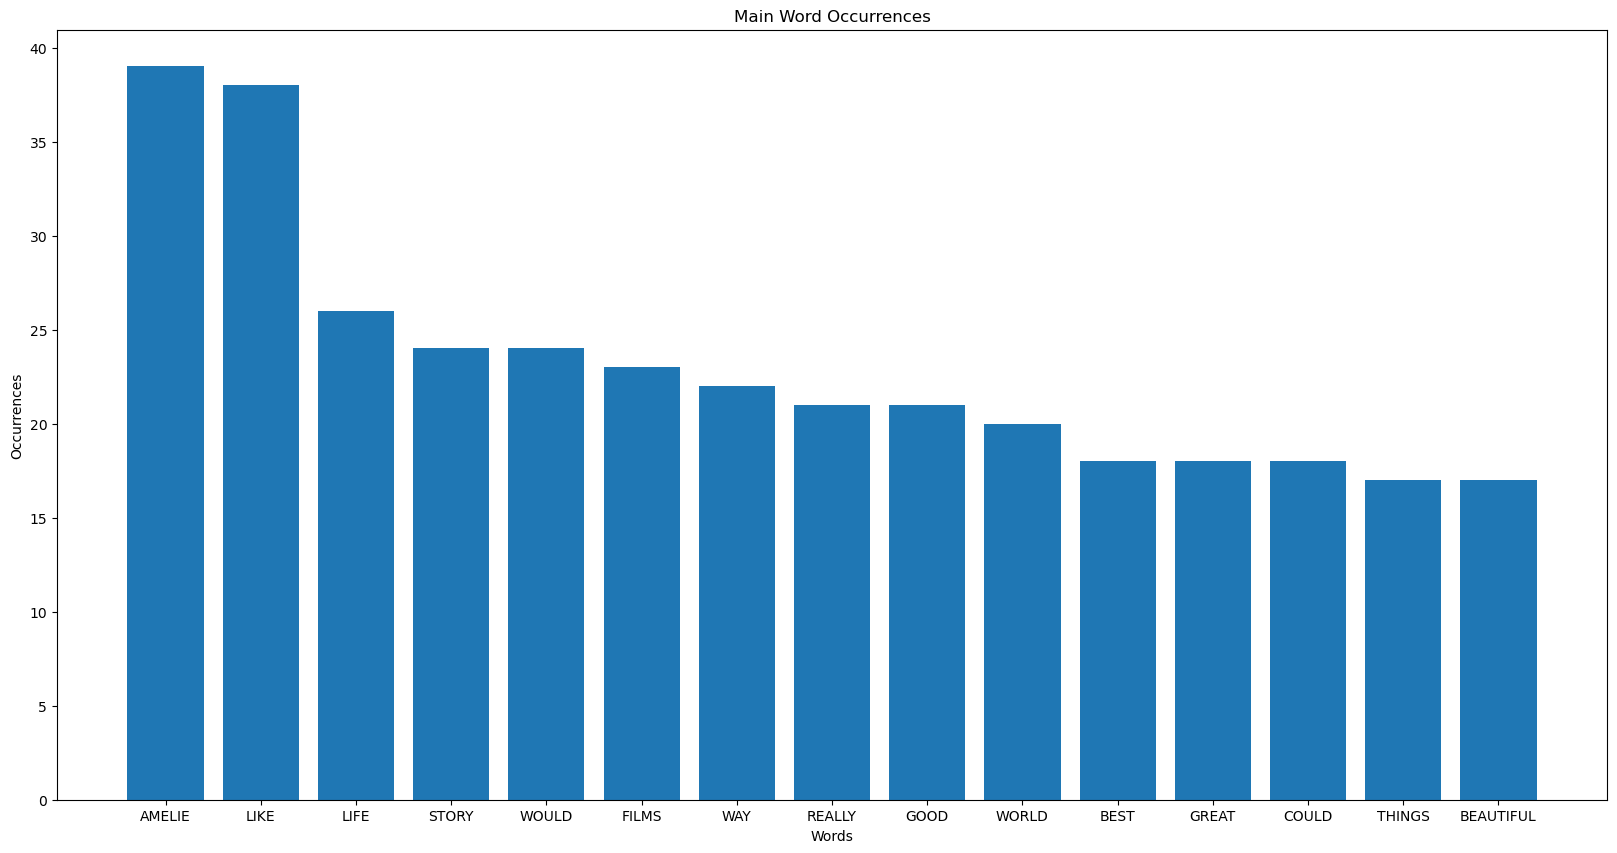

[('AMELIE', 39), ('LIKE', 38), ('LIFE', 26), ('STORY', 24), ('WOULD', 24), ('FILMS', 23), ('WAY', 22), ('REALLY', 21), ('GOOD', 21), ('WORLD', 20), ('BEST', 18), ('GREAT', 18), ('COULD', 18), ('THINGS', 17), ('BEAUTIFUL', 17)]


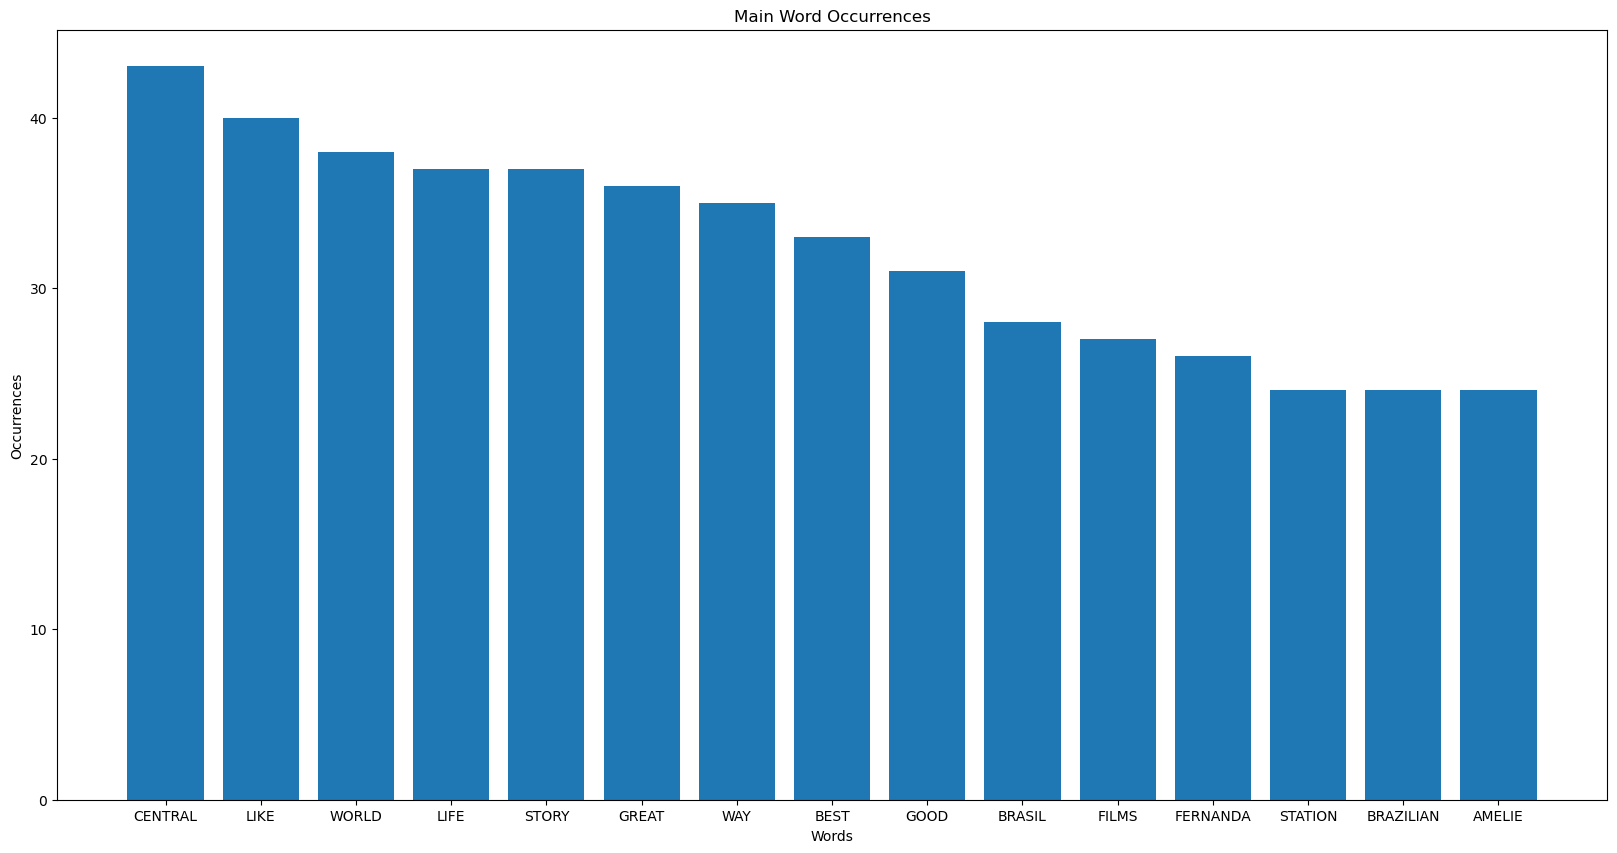

[('CENTRAL', 43), ('LIKE', 40), ('WORLD', 38), ('LIFE', 37), ('STORY', 37), ('GREAT', 36), ('WAY', 35), ('BEST', 33), ('GOOD', 31), ('BRASIL', 28), ('FILMS', 27), ('FERNANDA', 26), ('STATION', 24), ('BRAZILIAN', 24), ('AMELIE', 24)]


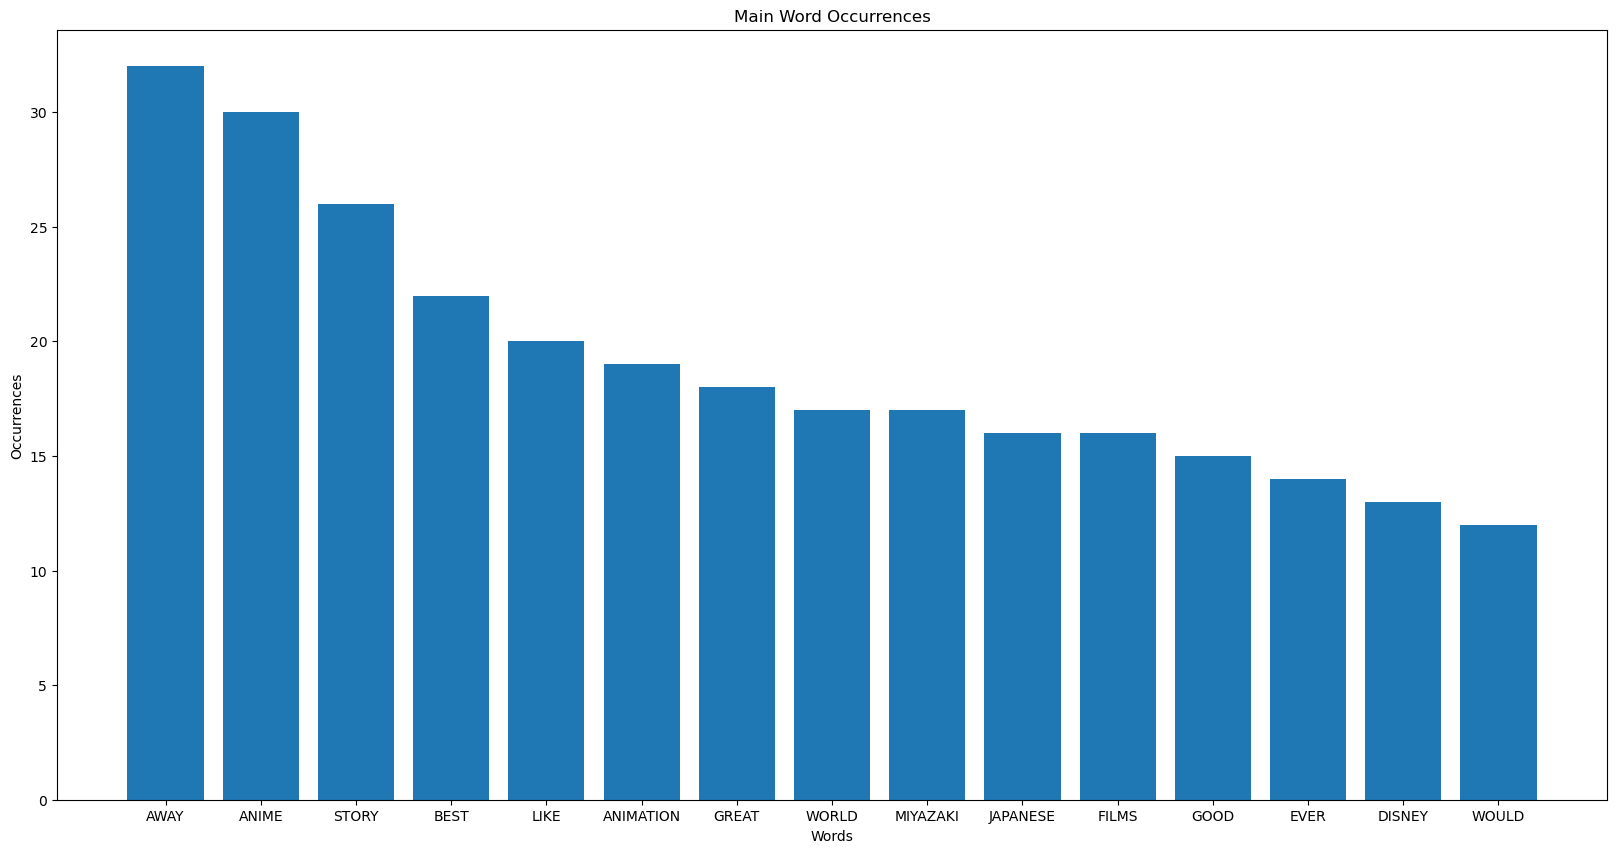

[('AWAY', 32), ('ANIME', 30), ('STORY', 26), ('BEST', 22), ('LIKE', 20), ('ANIMATION', 19), ('GREAT', 18), ('WORLD', 17), ('MIYAZAKI', 17), ('JAPANESE', 16), ('FILMS', 16), ('GOOD', 15), ('EVER', 14), ('DISNEY', 13), ('WOULD', 12)]


In [524]:
step=1
# sentiment score between 0.5 and 1

# Extract main occurrences before nomination
main_occurrences_bf_nom = extract_main_occurrences(df_bf_nom_nlp[df_bf_nom_nlp['movie_id'].isin(movie_ids_bfnom_5to10)], step)
print(main_occurrences_bf_nom)

# Extract main occurrences after nomination
main_occurrences_af_nom = extract_main_occurrences(df_af_nom_nlp[df_af_nom_nlp['movie_id'].isin(movie_ids_bfnom_5to10)], step)
print(main_occurrences_af_nom)

# Extract main occurrences after awards
main_occurrences_af_awards = extract_main_occurrences(df_af_awards_nlp[df_af_awards_nlp['movie_id'].isin(movie_ids_bfnom_5to10)], step)
print(main_occurrences_af_awards)

## How to check if our sentiment analysis ensemble model is fair enough ?

In [525]:
df_reg=pd.concat([df_bf_nom_nlp,df_af_nom_nlp,df_af_awards_nlp], axis=0)[['normalized_rating','nltk_sentiment_score','textblob_sentiment_score','ensemble_sentiment_score','sentiment_with_rating']]
df_reg

,normalized_rating,nltk_sentiment_score,textblob_sentiment_score,ensemble_sentiment_score,sentiment_with_rating
0,-0.8,0.0772,0.191667,0.134433,-0.107547
1,0.8,0.9545,0.244444,0.599472,0.479578
2,-0.8,0.9654,0.059896,0.512648,-0.410118
3,0.8,0.6369,0.106389,0.371644,0.297316
4,0.8,0.5859,0.333333,0.459617,0.367693
...,...,...,...,...,...
6311,1.0,0.6908,0.300000,0.495400,0.495400
6312,0.4,-0.4168,0.283333,-0.066733,-0.026693
6313,0.8,0.9841,0.000000,0.492050,0.393640
6314,1.0,0.9379,0.833333,0.885617,0.885617


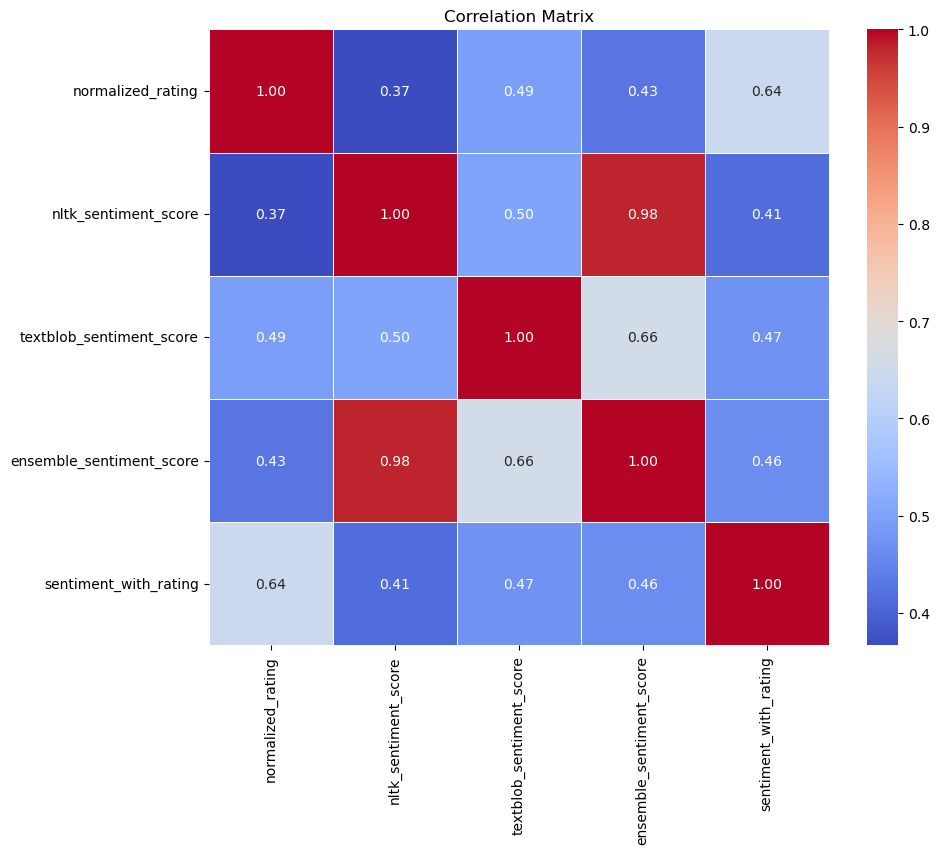

In [526]:
# Compute correlation matrix
correlation_matrix = df_reg.corr()
# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [527]:
# Perform OLS regression
X = df_reg[[ 'nltk_sentiment_score', 'textblob_sentiment_score', 'ensemble_sentiment_score','sentiment_with_rating']]
y = df_reg['normalized_rating']
X = sm.add_constant(X)  # Add constant term for the intercept
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      normalized_rating   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                 1.317e+04
Date:                Wed, 14 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:27:11   Log-Likelihood:                -26723.
No. Observations:               46431   AIC:                         5.345e+04
Df Residuals:                   46427   BIC:                         5.349e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Based on the OLS regression results, we can conclude that both the textblob_sentiment_score and sentiment_with_rating have significant impacts on the normalized_rating. The textblob_sentiment_score has the highest coefficient, indicating a strong positive influence on the normalized_rating. However, the sentiment_with_rating variable has the highest coefficient among all the variables, suggesting it may be the most influential determinant of sentiment given the rating. Additional analysis can help us understand the most important determinants of the sentiment. 

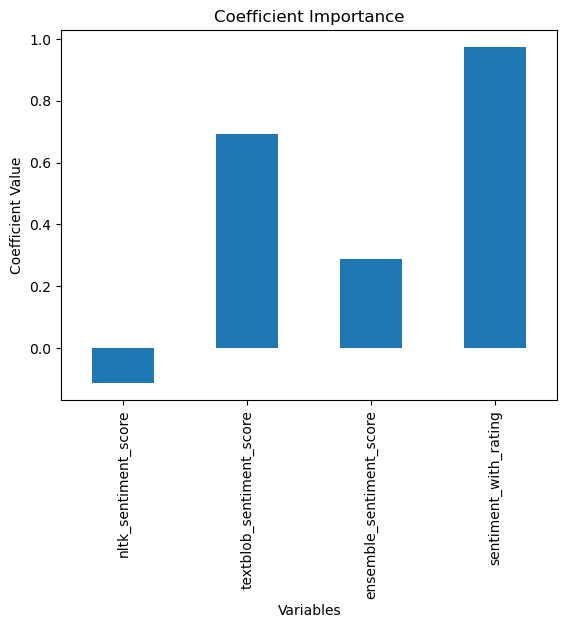

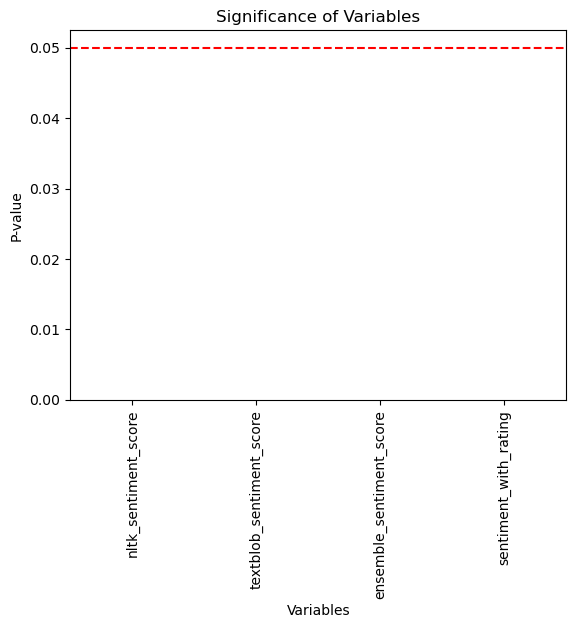

In [528]:
# Plot coefficient importance
coefficients = model.params.drop('const')
coefficients.plot(kind='bar')
plt.xlabel('Variables')
plt.ylabel('Coefficient Value')
plt.title('Coefficient Importance')
plt.show()

# Plot significance of variables
p_values = model.pvalues.drop('const')
p_values.plot(kind='bar')
plt.xlabel('Variables')
plt.ylabel('P-value')
plt.title('Significance of Variables')
plt.axhline(y=0.05, color='r', linestyle='--')
plt.show()